# Industrial safety. NLP based Chatbot

## Input: Context and Dataset



CONTEXT:
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

DATA DESCRIPTION: This The database is basically records of accidents from12 different plants in 03 different countrieswhich every line in the data is an occurrence of an accident.

Columns description:

‣Data: timestamp or time/date information

‣Countries: which country the accident occurred (anonymised)

‣Local: the city where the manufacturing plant is located (anonymised)

‣Industry sector: which sector the plant belongs to

‣Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)

‣Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)

‣Genre: if the person is male or female

‣Employee or Third Party: if the injured person is an employee or a third party

‣Critical Risk: some description of the risk involved in the accident

‣Description: Detailed description of how the accident happened

PROJECT OBJECTIVE:
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description

###### Import necessary libraries and mount google drive

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install nltk
import random, re
import time
import warnings
warnings.filterwarnings("ignore")

# nlp libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install wordcloud

from wordcloud import WordCloud

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
!pip install xgboost

from xgboost.sklearn import XGBClassifier

pd.options.display.max_columns = None
pd.options.display.max_rows = None


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\Sandeep\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sandeep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sandeep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\Sandeep\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\Sandeep\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/124.9 MB 6.9 MB/s eta 0:00:18
   ---------------------------------------- 0.7/124.9 MB 7.0 MB/s eta 0:00:18
   ---------------------------------------- 1.1/124.9 MB 9.1 MB/s eta 0:00:14
    --------------------------------------- 1.7/124.9 MB 8.9 MB/s eta 0:00:14
    --------------------------------------- 2.2/124.9 MB 9.3 MB/s eta 0:00:14
    --------------------------------------- 2.6/124.9 MB 9.9 MB/s eta 0:00:13
    --------------------------------------- 2.8/124.9 MB 8.4 MB/s eta 0:00:15
   - -------------------------------------- 3.2/124.9 MB 8.8 MB/s eta 0:00:14
   - -------------------------------------- 3.3/124.9 MB 7.9 MB/s eta 0:00:16
   - -------------------------------------- 3.9/124.9 MB 8.0 MB/s eta 0:00:16
   - -------------------------------------- 4.4/124.9 MB 8.5 MB/s eta 0:00:15
   - -------------------------------------- 4.8/124.9 MB 8.5 MB/s eta 0

###### Mount Google Drive

In [2]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Process:

#### Step 1: Import the data

In [6]:
#load the data from xlsl file
!pip install openpyxl
data = pd.read_excel('datasets/NLP_Project/industrial_safety_and_health_database_with_accidents_description.xlsx')

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------- ----------------- 143.4/250.9 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 3.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\Sandeep\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [7]:
print("Shape of Data Provided : \n")
print("Number of Columns : ",data.shape[1])
print("Number of Rows : ",data.shape[0])

Shape of Data Provided : 

Number of Columns :  11
Number of Rows :  425


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.7+ KB


In [9]:
data.head()

Unnamed: 0       Data   Countries     Local Industry Sector Accident Level  \
0           0 2016-01-01  Country_01  Local_01          Mining              I   
1           1 2016-01-02  Country_02  Local_02          Mining              I   
2           2 2016-01-06  Country_01  Local_03          Mining              I   
3           3 2016-01-08  Country_01  Local_04          Mining              I   
4           4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

#### Step 2: Data cleansing

##### Cleaning null values, duplicates, typos

In [10]:
# Remove 'Unnamed: 0' column from Data frame
data.drop("Unnamed: 0", axis=1, inplace=True)
data.head()

Data   Countries     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

The second column is a date column with typo in column name. Lets change that first along with the the type of column to date format. Similar for Genre , the values pertain to Gender


In [11]:
# Rename 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in Data frame
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'EmployeeType'}, inplace=True)
data.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender          EmployeeType        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

In [12]:
#check missing values in data
data.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
EmployeeType                0
Critical Risk               0
Description                 0
dtype: int64

There are no missing values

In [13]:
#checking for duplicate rows
data.duplicated().sum()

7

There are 7 duplicate entries, let us remove them from the dataset

In [14]:
data.drop_duplicates(inplace=True)
data=data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Country                   418 non-null    object        
 2   Local                     418 non-null    object        
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    object        
 5   Potential Accident Level  418 non-null    object        
 6   Gender                    418 non-null    object        
 7   EmployeeType              418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 32.8+ KB


In [15]:
#going through the unique values of each column. Description is more free text, so will have all unique almost. Omitting the description column alone
for col in data.columns:
    if col != 'Description':
        print("\nColumn : ",col)
        print("Unique Values : \n",data[col].value_counts())


Column :  Date
Unique Values : 
 Date
2017-02-08    6
2016-06-16    5
2016-05-04    4
2016-06-08    4
2016-10-03    4
2016-02-15    4
2017-06-11    4
2016-06-24    3
2016-12-12    3
2017-04-11    3
2016-03-22    3
2016-03-31    3
2017-05-06    3
2017-02-13    3
2017-02-17    3
2016-02-24    3
2017-05-16    3
2017-02-25    3
2016-09-20    3
2017-01-17    3
2017-04-25    3
2016-04-30    3
2016-03-18    3
2017-02-07    2
2016-06-18    2
2016-06-07    2
2017-01-31    2
2017-02-23    2
2016-06-05    2
2016-07-08    2
2016-05-26    2
2016-05-25    2
2016-05-22    2
2017-02-26    2
2017-02-27    2
2016-05-12    2
2016-05-11    2
2016-05-05    2
2016-06-03    2
2017-01-09    2
2016-07-07    2
2016-12-13    2
2016-11-08    2
2016-10-18    2
2016-10-13    2
2016-10-10    2
2016-11-23    2
2016-09-22    2
2016-09-21    2
2016-12-01    2
2016-12-08    2
2016-09-13    2
2016-09-06    2
2016-09-04    2
2016-12-15    2
2017-01-24    2
2016-08-30    2
2016-12-23    2
2016-08-24    2
2016-12-22    2
2

In [16]:
#let us split the date column into day, month, year and day of week
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data.Date.apply(lambda x : x.year)
data['Month'] = data.Date.apply(lambda x : x.month)
data['Day'] = data.Date.apply(lambda x : x.day)
data['WeekDay'] = data.Date.apply(lambda x : x.day_name())

In [17]:
# function to create month variable into seasons
def seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [18]:
data['Season'] = data['Month'].apply(seasons)
data.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender          EmployeeType        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     WeekDay  Season  
0     Friday  Summer  
1   Saturday  Summer  
2  Wednesday  Summer  
3     Friday  Summer  
4     Sunday  Summer

##### Inferences from above data cleaning

1. We can see that there are records of accidents from 1/1/2016 to 9/7/2017 in every month. So there are no outliers in the 'Date' column.

2. There are only three country types.

3. There are total of 12 Local cities where the manufacturing plant is located. They appear to be in sequence 1-12.

4. There are only three Industry Sector types - Mining, Metals or Others
There are five Accident Level types which are in sequence.

5. There are six Potential Accident Level types which are in sequence.

6. Gender column also has only 2 values Male/Female, so there is no wrong input in this column as well.

7. There are three Employee types in the provided data.

8. There are quite a lot of Critical risk descriptions and we don't see any outliers.

##### Exploratory Data Analysis (EDA)

 Variable Split:
Target variable: 'Accident Level', 'Potential Accident Level'
Predictors (Dependent varibles): 'Date', 'Country', 'Local', 'Industry Sector', 'Gender', 'Employee type', 'Critical Risk', 'Description'

###### Univariate analysis

In [19]:
def plot(x, df, type, y=""):
  plt.figure(figsize=(6, 6))
  title = "Distribution of " + x
  plt.title(x)
  if y != "" and type == "bar":
    sns.countplot(x =x, data = df, hue =y)
  elif y == "" and type == "bar":
    sns.countplot(x =x, data = df)
  elif type == "pie":
    category_counts = df[x].value_counts()
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
  plt.show()

Country


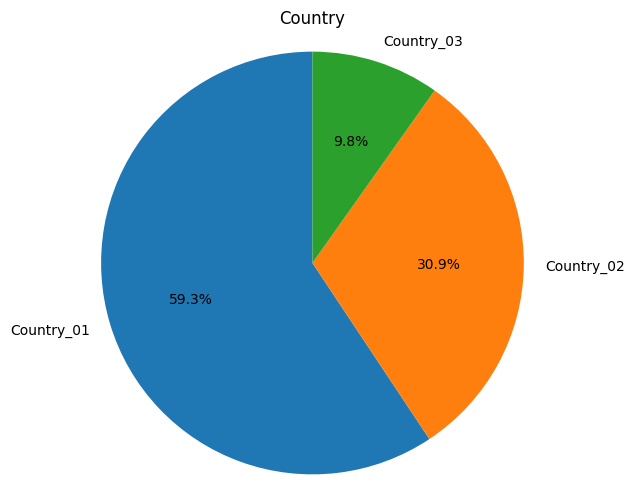

Industry Sector


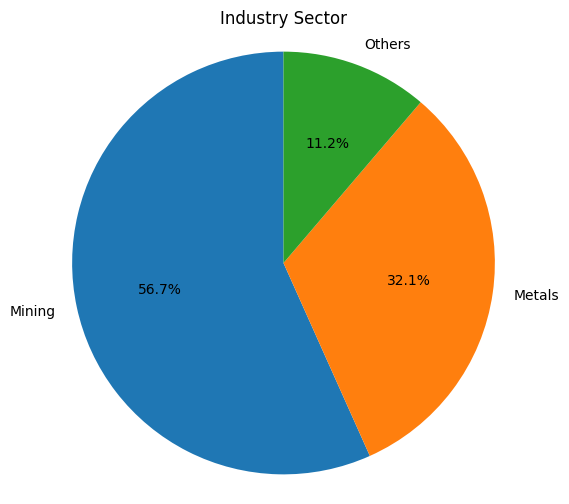

Gender


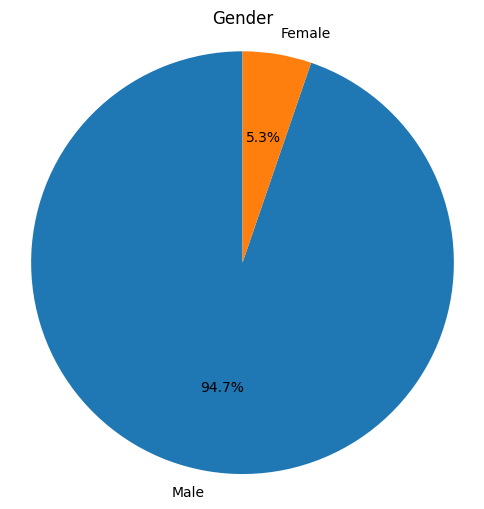

EmployeeType


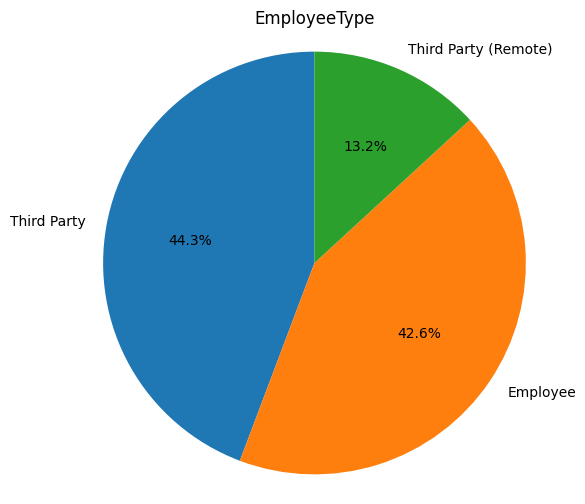

Year


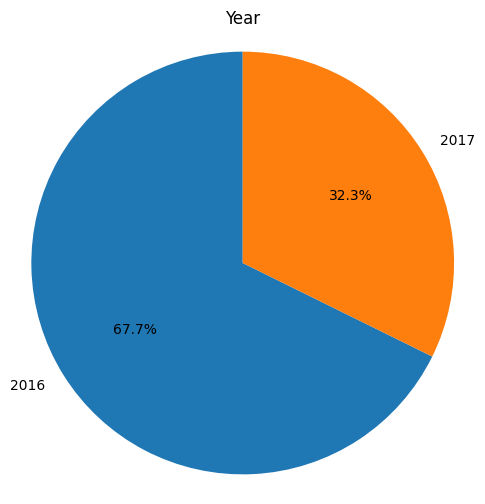

Month


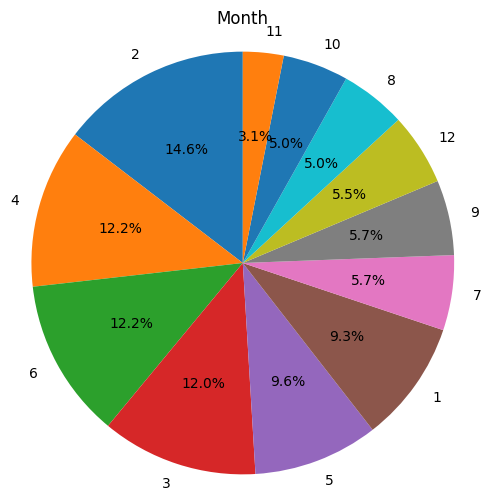

WeekDay


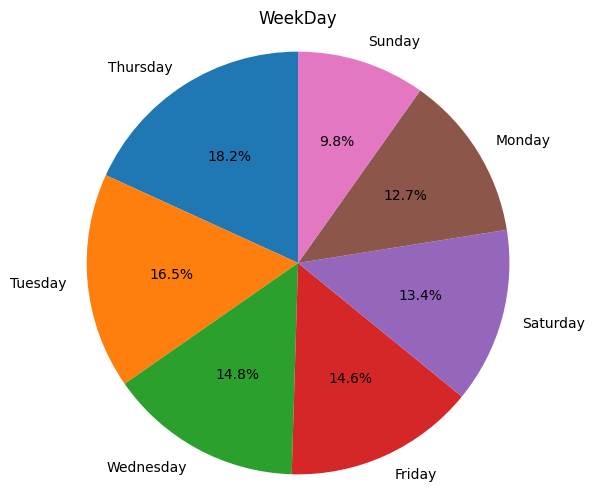

Season


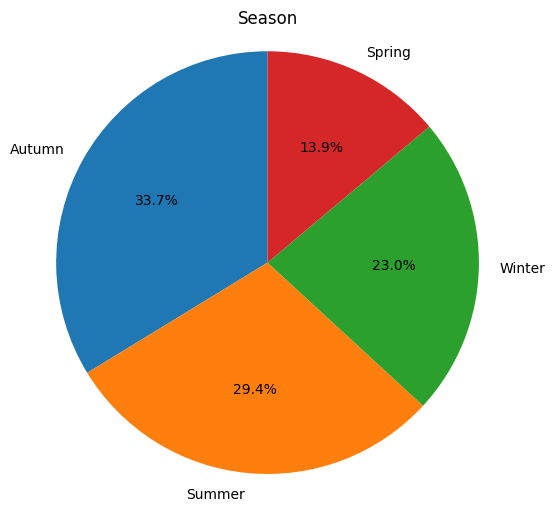

In [20]:
#Plotting dependent variables - Pie chart
for col in data.columns:
    if col not in ['Description', 'Date', 'Local', 'Day', 'Accident Level', 'Potential Accident Level', 'Critical Risk']:
        print(col)
        plot(col, data, "pie")

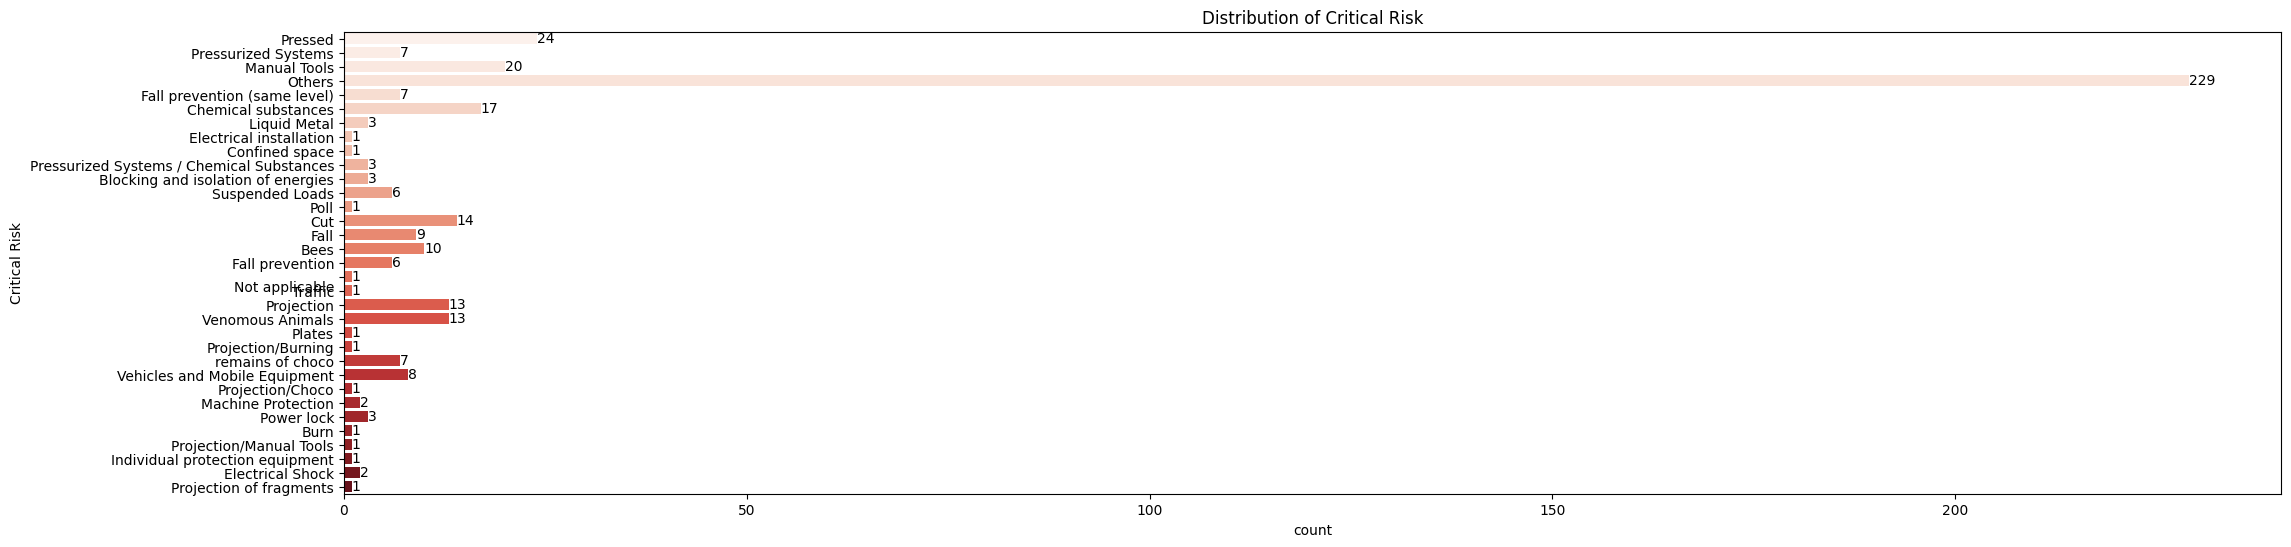

In [21]:
#Critical risk column
plt.figure(figsize=(25, 6))
ax = sns.countplot(y='Critical Risk', data=data, palette="Reds")
for container in ax.containers:
    ax.bar_label(container)
#plt.xticks(rotation=20)
plt.title("Distribution of Critical Risk")
plt.show()

For most of the cases, critical risk type is categorised as Others (229)
The next highest cases are categorised as Presses with 24 cases

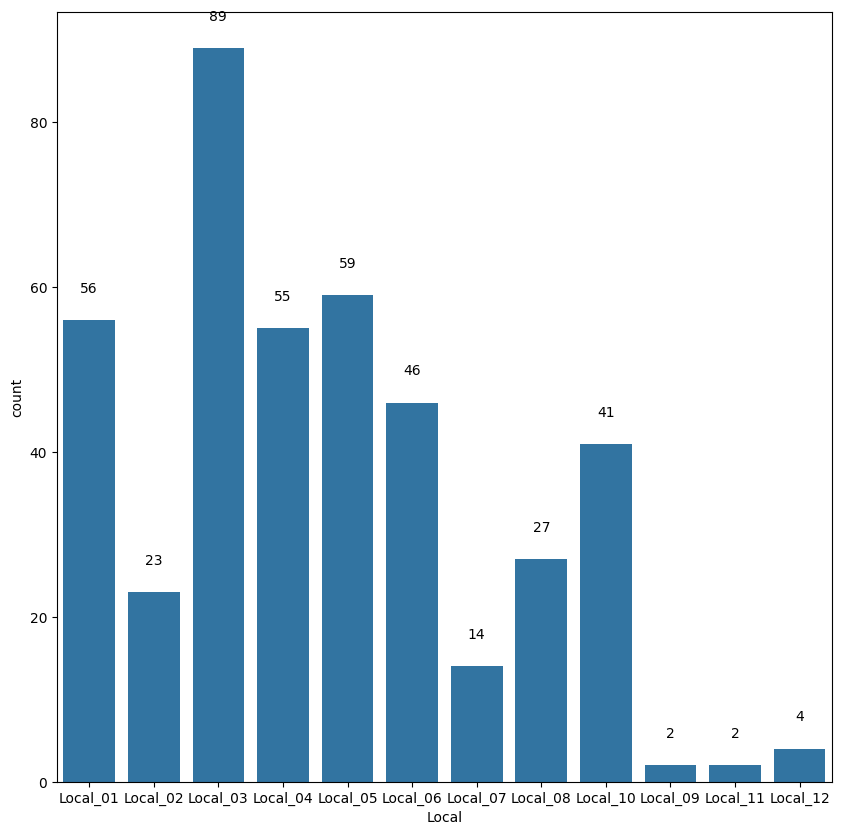

In [22]:
fig = plt.figure(figsize=(10,10))
ax = sns.countplot(data=data, x='Local')
for p in ax.patches:
   height = p.get_height()
   ax.text(p.get_x() + p.get_width() / 2.,
           height + 3,
           '{:1.0f}'.format(height),
           ha="center", va="bottom")

labels = list(data['Local'].value_counts().index)
#handles = [plt.Rectangle((0, 0), 1, 1, color=sns.color_palette()[i]) for i in range(len(labels))]
#plt.legend(handles, labels, loc='upper right', title="Category Count");

Accident Level


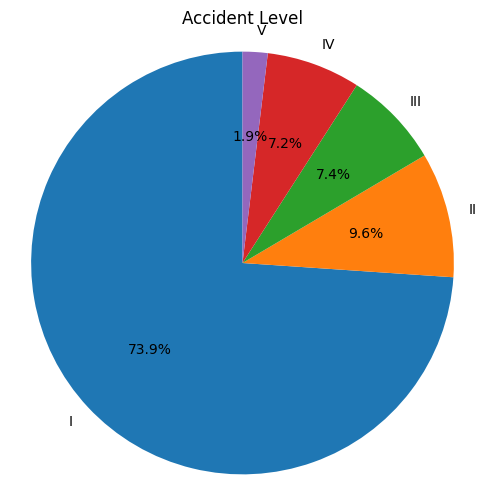

Potential Accident Level


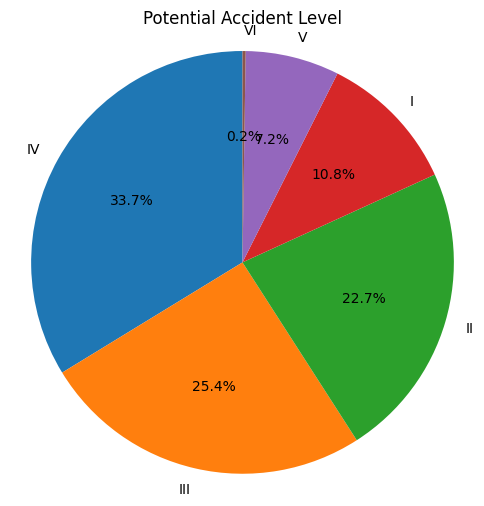

In [23]:
#Target variable distribution
for col in data.columns:
    if col in ['Accident Level', 'Potential Accident Level']:
        print(col)
        plot(col, data, "pie")

###### Inferences from Univariate analysis



*   Country_01 has ~ 60% of the total accidents recorded followed by Country_2 (30%) and Country_03 (10%) with the least accidents.
*   Sector wise accident plot shows that ~ 56% of the accidents are ocuuring in Mining industries and ~ 32% of accidents in Metal industries.
*   Gender plot shows that ~ 95% of the people who met with accidents are Male.
*   Third party employees have met with more accidents among all employee types, contributing to ~ 45% of the total accidents.
*   This is followed by Employees who contributed ~ 42% to the total accidents.
*   ~ 65% of the accidents have taken place in March-August timeperiod of the year.
*   More accidents happen in Autumn seaspn (35%) followed by Summer (~ 30%)
Number of accidents increased during the middle of the week (Tue-Thur) and then decline.
*   Most accidents happen in Location 3, followed by Local_5, local_1 and local_4.
















###### Bi-variate analysis

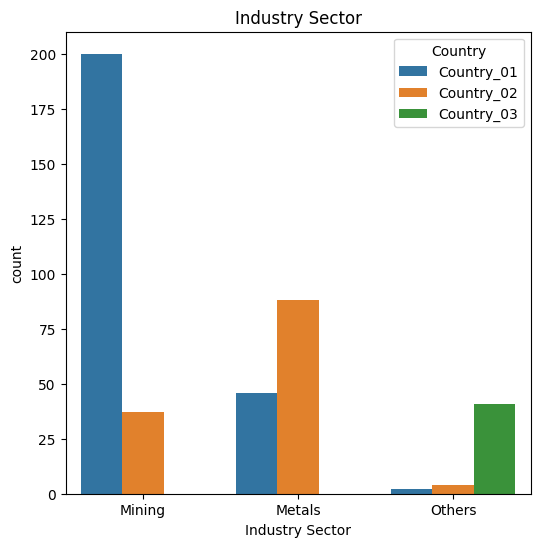

In [24]:
plot("Industry Sector", data, "bar", "Country")

- Metals and Mining industry sector plants are not available in Country_03.
- Distribution of industry sector differs significantly in each country.

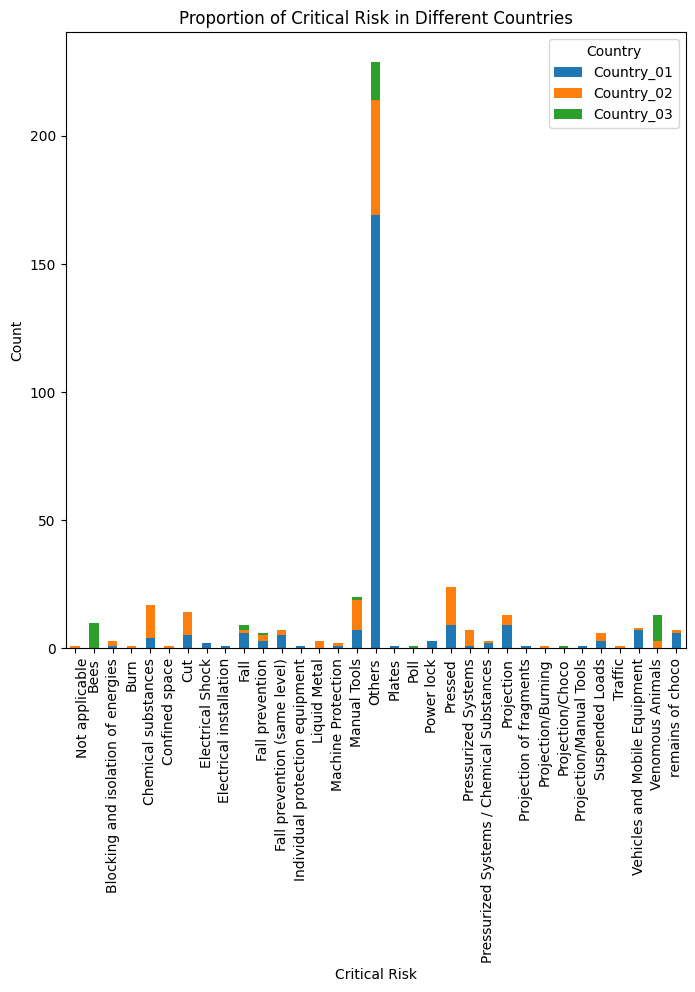

In [25]:
# Create a crosstab of Critical Risk and Country
crit_risk_cntry_table = pd.crosstab(index=data['Critical Risk'], columns=data['Country'])
#plot
crit_risk_cntry_table.plot(kind='bar', figsize=(8, 8), stacked=True)

plt.title("Proportion of Critical Risk in Different Countries")
plt.xlabel("Critical Risk")
plt.ylabel("Count")
plt.show()

Dominance of 'Manual Tools' risk: Country_01 has a significantly higher count for the "Manual Tools" critical risk compared to the other countries.
<br><br>Varied risk distribution: Other critical risks, such as "Fall prevention," "Machine Protection," and "Confined Space," show more evenly distributed counts across the three countries.
<br><br>Low incident categories: Several critical risk categories have very low counts across all countries, indicating less frequent occurrence.
Country-specific risks: Certain risks, such as "Blocking and isolation of energies" and "Electrical Shock," have notable counts in specific countries, hinting at region-specific hazards.
<br><br>'Not applicable' category: This category has minimal entries, suggesting that most incidents fall under defined critical risks.

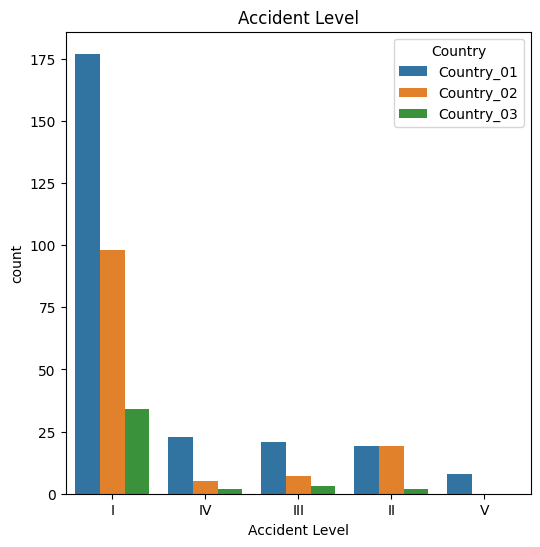

In [26]:
plot("Accident Level", data, "bar", "Country")

In [27]:
acc_cntry_table = pd.crosstab(index=data['Accident Level'], columns=data['Country'])
acc_cntry_table

Country         Country_01  Country_02  Country_03
Accident Level                                    
I                      177          98          34
II                      19          19           2
III                     21           7           3
IV                      23           5           2
V                        8           0           0

In [28]:
from scipy.stats import chi2_contingency
# Hypothesis Testing for Accident Levels by Country

# H0​: The proportions of accident levels does not differ in different countries.
# Ha​: The proportions of accident levels differ in different countries.

# Test Statistic: Chi-squared test

chi2, p, dof, expected = chi2_contingency(acc_cntry_table)

print("Chi-squared Statistic:", chi2)
print("p-value:", p)

reject_null = p < 0.05
print("Reject Null Hypothesis?:", reject_null)

if reject_null:
    print("We reject the null hypothesis. We have enough evidence to prove that the accident level distribution differs significantly across countries.")
else:
    print("We fail to reject the null hypothesis. We do not have enough evidence to prove that the accident level distribution differs significantly across countries.")


Chi-squared Statistic: 16.539177604348506
p-value: 0.03528174940919624
Reject Null Hypothesis?: True
We reject the null hypothesis. We have enough evidence to prove that the accident level distribution differs significantly across countries.


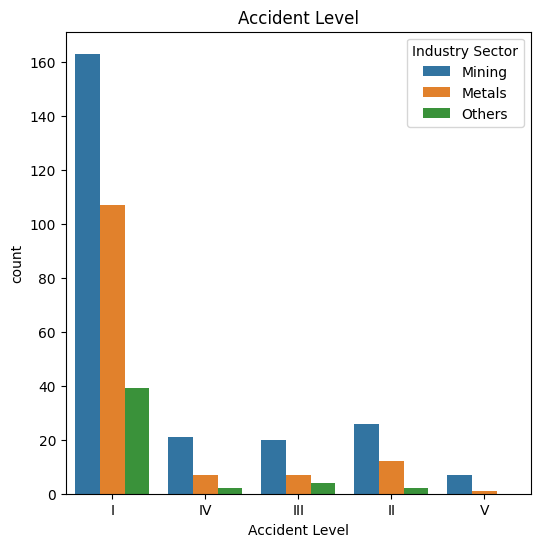

In [29]:
plot("Accident Level", data, "bar", "Industry Sector")

**Accident** level I has more data, the given dataset is imbalanced - it might be challenge to train model on predicting other accident levels

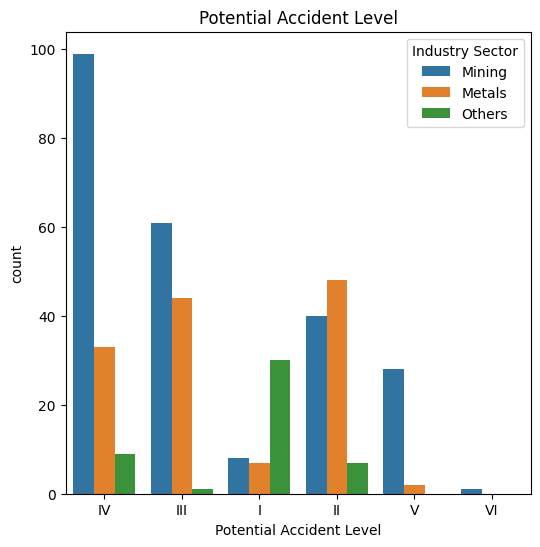

In [30]:
plot("Potential Accident Level", data, "bar", "Industry Sector")

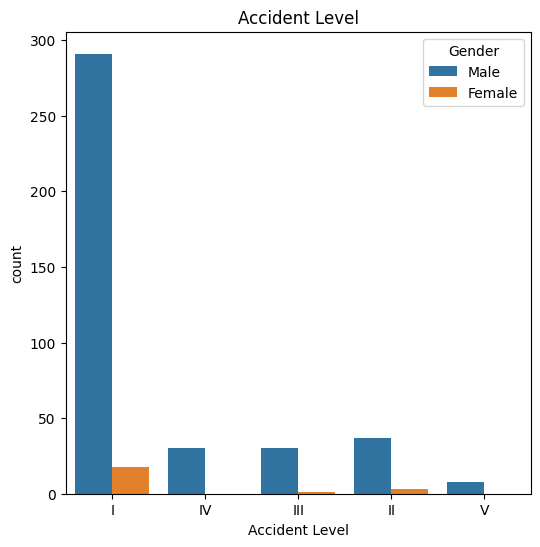

In [31]:
plot("Accident Level", data, "bar", "Gender")

Male are involved in more accidents across levels, this is expected given the dataset has highly imbalanced Gender ratio

> Add blockquote

> Add blockquote





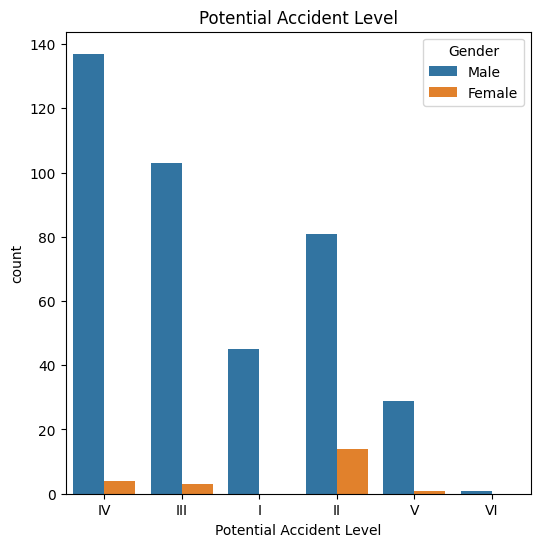

In [32]:
plot("Potential Accident Level", data, "bar", "Gender")

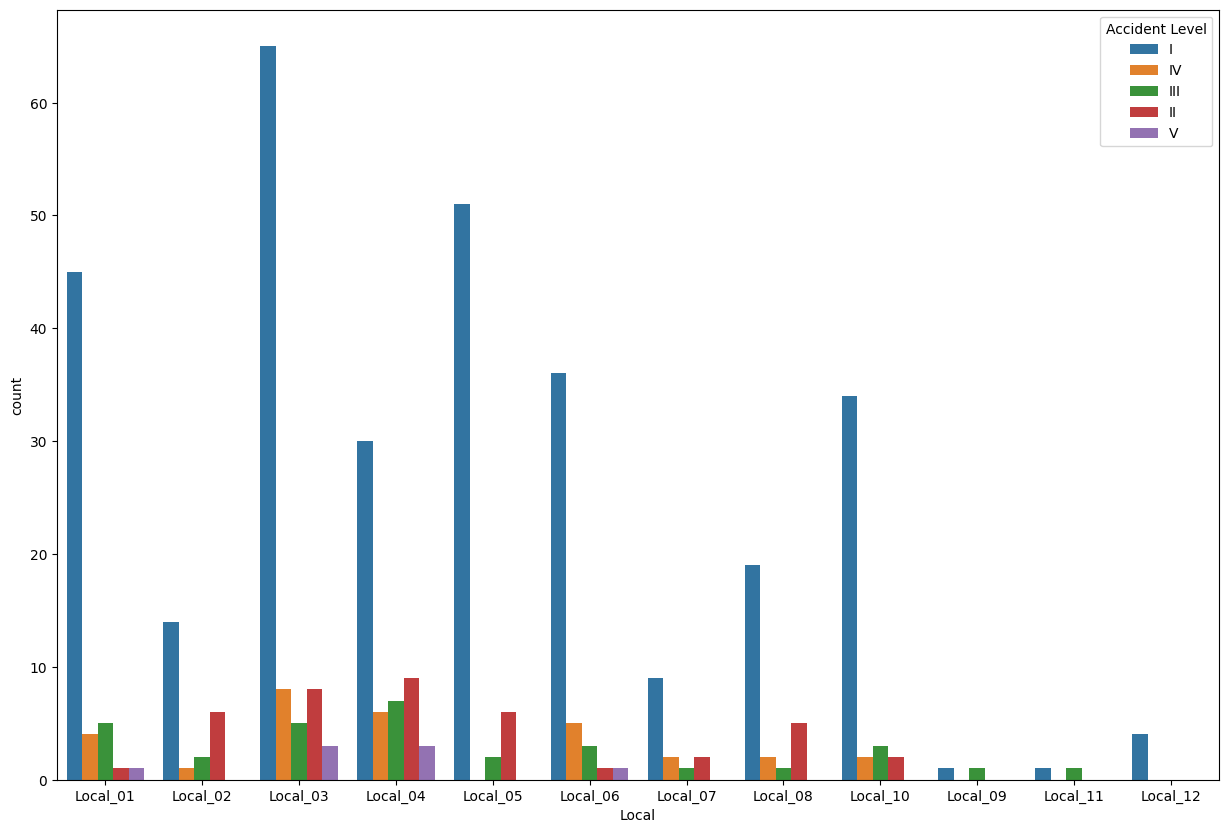

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(data=data, x='Local', hue='Accident Level')
plt.show()

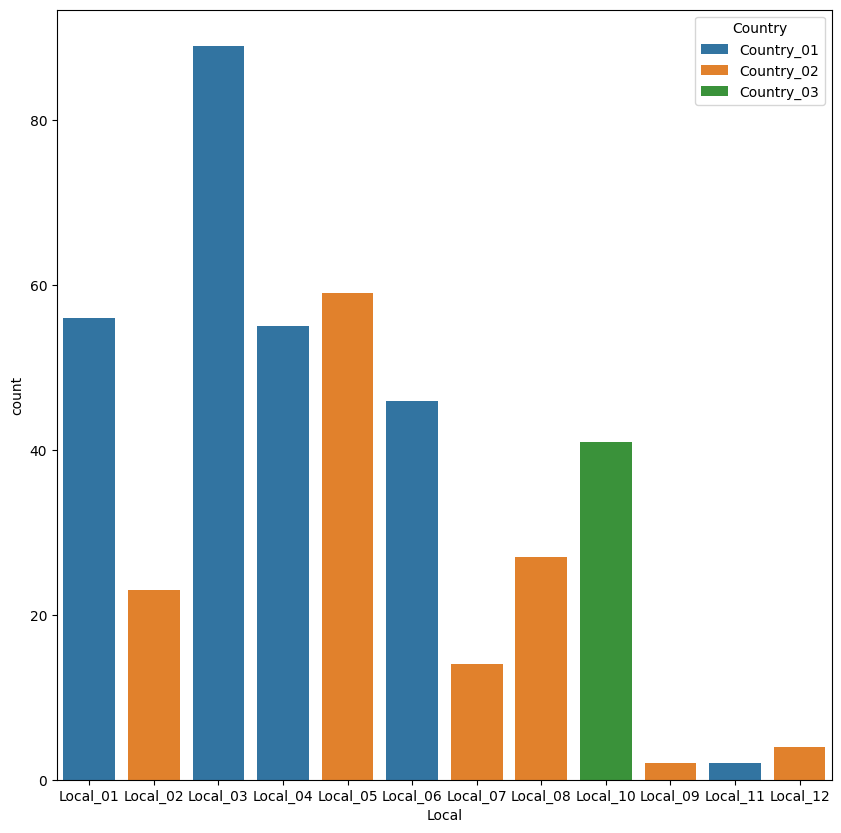

In [34]:
plt.figure(figsize=(10,10))
sns.countplot(data=data, x='Local', hue='Country')
plt.show()

In [35]:
country_cosstab= pd.crosstab(data["Country"], data["Local"])
country_cosstab

Local       Local_01  Local_02  Local_03  Local_04  Local_05  Local_06  \
Country                                                                  
Country_01        56         0        89        55         0        46   
Country_02         0        23         0         0        59         0   
Country_03         0         0         0         0         0         0   

Local       Local_07  Local_08  Local_09  Local_10  Local_11  Local_12  
Country                                                                 
Country_01         0         0         0         0         2         0  
Country_02        14        27         2         0         0         4  
Country_03         0         0         0        41         0         0

From the above table it is noticed that Local column values have unique relation with Country column values.
<br>That is, every Local is related to only one country. As both Local and Countries gives the same info, we can remove Countries column from dataframe.

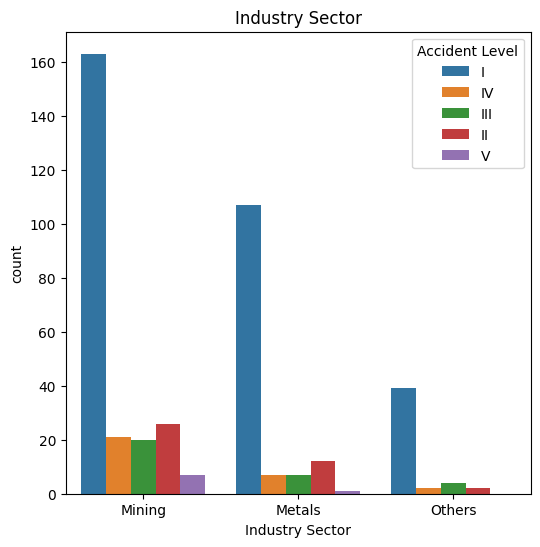

In [36]:
plot("Industry Sector", data, "bar", "Accident Level")

Mining industry has highest no. of accidents, followed by metal industry

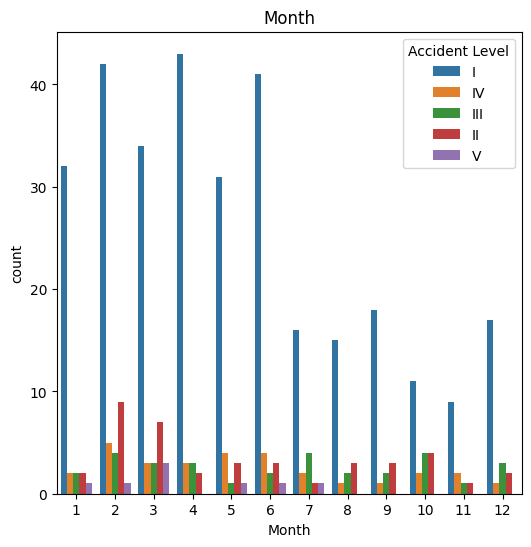

In [37]:
plot("Month", data, "bar", "Accident Level")

Text(0, 0.5, 'Number of cases')

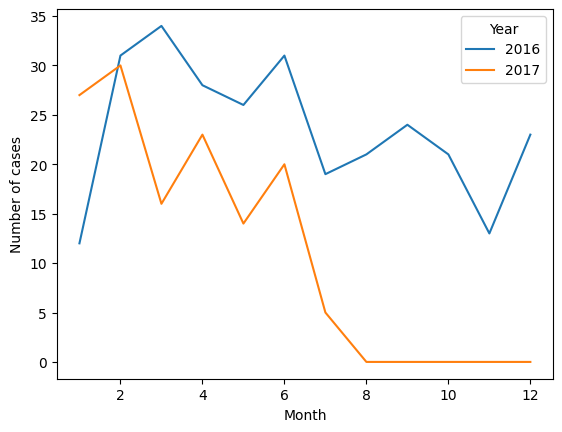

In [38]:
date_crosstab = pd.crosstab(data["Month"], data["Year"])
date_crosstab.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Number of cases')

There is no data in 2017 from the month of August (8). <br> So this will not give any relavant information as data is missing to compare data 2017 to 2016. <br>
The last two graphs will also give misinformation as data is missing in 2017. We can probably delete date info(year, date) from the table.

###### Multivariate analysis

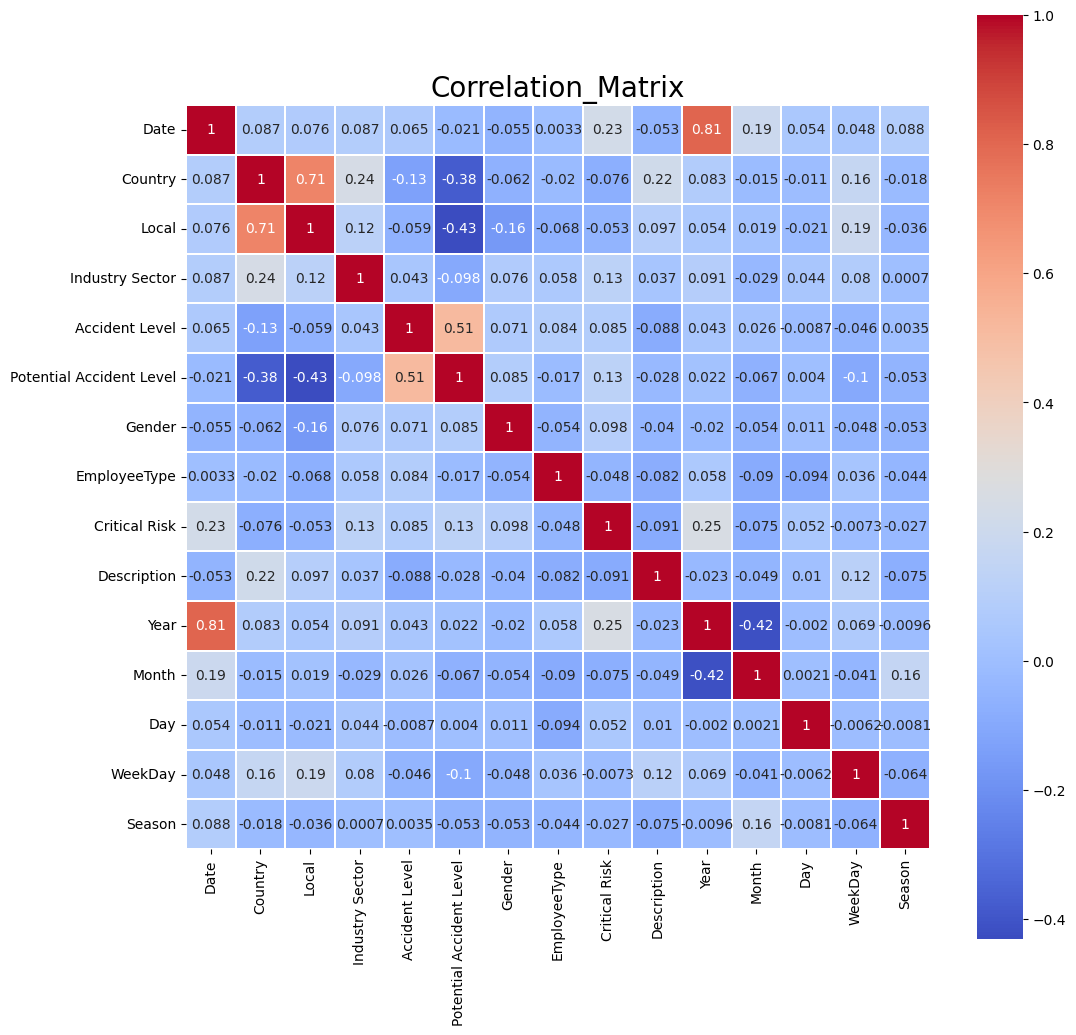

In [39]:
# Calculate the correlation matrix
le = LabelEncoder()
df_encoder = data.apply(le.fit_transform)

plt.figure(figsize=(12,12))
plt.title('Correlation_Matrix', fontsize=20)
sns.heatmap(df_encoder.corr(), square=True, cmap='coolwarm', annot=True, linewidth=0.2);




1.   From the above heap map, Countries and Local are highly corellated with value 0.71
2.   Next, Accident level and Potential Accident Level are corellated with value .51

<br> This is in alignment with our analysis that Country and Local columns are related and we can drop any one.


In [40]:
#Chi-Square test of Independence
# Hypothesis Testing for Accident Level and  Potential Accident Level

 #H0​: Accident Level and Potential accident level are not related.
 #Ha​: Accident Level and Potential accident level are related.

crosstab = pd.crosstab(data["Accident Level"], data["Potential Accident Level"])
crosstab

Potential Accident Level   I  II  III  IV  V  VI
Accident Level                                  
I                         45  88   89  78  9   0
II                         0   7   14  16  3   0
III                        0   0    3  26  2   0
IV                         0   0    0  21  9   0
V                          0   0    0   0  7   1

In [41]:
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-squared Statistic:", chi2)
print("p-value:", p)
print("degree of freedom", dof)
reject_null = p < 0.05
print("Reject Null Hypothesis?:", reject_null)

if reject_null:
    print("We reject the null hypothesis. We have enough evidence to prove that the accident level and potential accident level are dependent.")
else:
    print("We fail to reject the null hypothesis. We do not have enough evidence to prove that the accident level distribution and potential accident level are not dependent.")


Chi-squared Statistic: 249.45260461536674
p-value: 1.4728348366116975e-41
degree of freedom 20
Reject Null Hypothesis?: True
We reject the null hypothesis. We have enough evidence to prove that the accident level and potential accident level are dependent.


In [42]:
#Drop unnecessary columns as per EDA inferences
df = data.drop(columns=['Country', 'Date', 'Year', 'Day'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Local                     418 non-null    object
 1   Industry Sector           418 non-null    object
 2   Accident Level            418 non-null    object
 3   Potential Accident Level  418 non-null    object
 4   Gender                    418 non-null    object
 5   EmployeeType              418 non-null    object
 6   Critical Risk             418 non-null    object
 7   Description               418 non-null    object
 8   Month                     418 non-null    int64 
 9   WeekDay                   418 non-null    object
 10  Season                    418 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.1+ KB


#### Step 3: Data preprocessing (NLP Preprocessing techniques)

###### Import/download necessary packages

In [44]:
# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# to import Word2Vec
from gensim.models import Word2Vec

# to import Glove
from gensim.scripts.glove2word2vec import glove2word2vec

#to import TFID
from sklearn.feature_extraction.text import TfidfVectorizer

# to display full text in dataframe
pd.set_option('display.max_colwidth', None)

#to tokenize
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# to Lemmetize
from nltk.stem import WordNetLemmatizer
nltk.download("omw-1.4")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sandeep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sandeep\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sandeep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sandeep\AppData\Roaming\nltk_data...


True

In [45]:
#copying to dataframe for nlp processing
df_nlp=df.copy()

# Removing Special Characters

In [46]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [47]:
# Applying the function to remove special characters
df_nlp['cleaned_text'] = data['Description'].apply(remove_special_characters)

In [48]:
# Checking cleaned data
df_nlp.loc[0:2, ['Description','cleaned_text']]

Description  \
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.   
1                                                                                                                                                        During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.   
2                                                                                                                                                 In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                             cleaned_text  
0  While removing the drill rod of the Jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo   
1                                                                                                                                                             During the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital Note of sulphide solution 48 grams liter   
2                                                                                                                                                     In the sub station MILPO located at level 170 when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury

Notice that + sign is removed from the row3 before 170

###### Change to Lowercase

In [49]:
# Changing test to lower case
df_nlp['cleaned_text'] = df_nlp['cleaned_text'].str.lower()

# Checking lower case data
df_nlp.loc[0:2, ['Description','cleaned_text']]

Description  \
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.   
1                                                                                                                                                        During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.   
2                                                                                                                                                 In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                             cleaned_text  
0  while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo   
1                                                                                                                                                             during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter   
2                                                                                                                                                     in the sub station milpo located at level 170 when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury

###### Removing extra whitespace

In [50]:
# Removing extra whitespaces from the text
df_nlp['cleaned_text'] = df_nlp['cleaned_text'].str.strip()

# Checking cleaned data
df_nlp.loc[0:2, ['Description','cleaned_text']]

Description  \
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.   
1                                                                                                                                                        During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.   
2                                                                                                                                                 In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                            cleaned_text  
0  while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo  
1                                                                                                                                                             during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter  
2                                                                                                                                                     in the sub station milpo located at level 170 when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury

###### Removing numbers

In [51]:

# Removing extra whitespaces from the text
df_nlp['cleaned_text'] = df_nlp['cleaned_text'].replace(to_replace=r'\d', value='', regex=True)

# Checking cleaned data
df_nlp.loc[0:2, ['Description','cleaned_text']]

Description  \
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.   
1                                                                                                                                                        During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.   
2                                                                                                                                                 In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                          cleaned_text  
0  while removing the drill rod of the jumbo  for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo  
1                                                                                                                                                             during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution  grams liter  
2                                                                                                                                                      in the sub station milpo located at level  when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury

###### Removing stop words

In [52]:

# Defining a function to remove stop words (like pronouns) using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [53]:
# Applying the function to remove stop words using the NLTK library
df_nlp['cleaned_text_without_stopwords'] = df_nlp['cleaned_text'].apply(remove_stopwords)

# Checking cleaned data with no stopwords
df_nlp.loc[0:2,['cleaned_text','cleaned_text_without_stopwords']]

cleaned_text  \
0  while removing the drill rod of the jumbo  for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo   
1                                                                                                                                                             during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution  grams liter   
2                                                                                                                                                      in the sub station milpo located at level  when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury   

                                                                                                                                                                                                                                                             cleaned_text_without_stopwords  
0  removing drill rod jumbo maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic supports one end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers mechanic drilling bar beam jumbo  
1                                                                             activation sodium sulphide pump piping uncoupled sulfide solution designed area reach maid immediately made use emergency shower directed ambulatory doctor later hospital note sulphide solution grams liter  
2                                                                                       sub station milpo located level collaborator excavation work pick hand tool hitting rock flat part beak bounces hitting steel tip safety shoe metatarsal area left foot collaborator causing injury

###### Tokenize

In [59]:
#Tokenize sentence into words
import nltk
nltk.download('punkt')
df_nlp['cleaned_text_stopwords_token'] = df_nlp['cleaned_text_without_stopwords'].apply(word_tokenize)

# Checking token data
df_nlp.loc[0:2,['cleaned_text_stopwords_token','cleaned_text_without_stopwords']]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sandeep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Sandeep/nltk_data'
    - 'C:\\Users\\Sandeep\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'C:\\Users\\Sandeep\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'C:\\Users\\Sandeep\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\Sandeep\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


###### Lemmetization

In [ ]:
# Initializing Lemmatizer
wnl = WordNetLemmatizer()

def apply_lemmetizer(text):

    for word in text:
      new_text = ' '.join([wnl.lemmatize(word) for word in text])

    return new_text

In [ ]:
# Applying the function to perform lemmetization
df_nlp['final_cleaned_text'] = df_nlp['cleaned_text_stopwords_token'].apply(apply_lemmetizer)

# checking a couple of instances of cleaned data
df_nlp.loc[0:2,['cleaned_text_without_stopwords','final_cleaned_text']]

###### Vectorization

In [ ]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying TfidfVectorizer on data
data_features_BOW = bow_vec.fit_transform(df_nlp['final_cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()

# Shape of the feature vector
data_features_BOW.shape

In [ ]:
# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()
# Checking the words considered by BoW model
words

In [ ]:
# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()

###### Word2Vec Embedding

In [55]:
# creating a list of all words in our data
words_list = [item.split(" ") for item in df_nlp['final_cleaned_text'].values]

# Checking the words from the first five reviews
words_list[0:5]

KeyError: 'final_cleaned_text'

In [56]:
# creating an instance of Word2Vec
model_W2V = Word2Vec(words_list, vector_size = 100, min_count = 1, window=5, workers = 6)
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

NameError: name 'words_list' is not defined

In [62]:
# Dictionary with key as words and the value as the embedding vector.

words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [63]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [64]:
# creating a dataframe of the vectorized documents
vec_size = 100
df_word2vec = pd.DataFrame(df_nlp['final_cleaned_text'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_word2vec

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0    -0.010805   0.020271   0.005273  -0.002226   0.001910  -0.028053   
1    -0.004573   0.009347   0.000693  -0.000787  -0.000874  -0.010190   
2    -0.012718   0.024988   0.004409   0.000542   0.005209  -0.029987   
3    -0.011668   0.018413   0.003065   0.001789   0.002882  -0.024054   
4    -0.011763   0.019176   0.004040   0.000248   0.002826  -0.025217   
5    -0.004237   0.011659   0.001591  -0.000040   0.002425  -0.013472   
6    -0.009189   0.021207   0.001849   0.001575   0.002956  -0.026338   
7    -0.006952   0.013219   0.004057   0.002151   0.001331  -0.018144   
8    -0.006926   0.014885   0.004735  -0.000364   0.002647  -0.020694   
9    -0.008109   0.017433   0.005166  -0.001588   0.001239  -0.022156   
10   -0.008928   0.015829   0.003453  -0.000539   0.001025  -0.017121   
11   -0.006272   0.011667   0.003728  -0.002624   0.002756  -0.016195   
12   -0.007187   0.015467   0.002256  -0.000356   0.002551  -0.020743   
13   -0.011088   0.019469   0.004625   0.000427   0.002306  -0.023728   
14   -0.006743   0.013720   0.003029   0.000154   0.001626  -0.019038   
15   -0.009497   0.013477   0.001701   0.001330   0.001722  -0.017213   
16   -0.011386   0.021045   0.004523   0.001096   0.003937  -0.028076   
17   -0.005925   0.010489   0.000375  -0.001096   0.001252  -0.011757   
18   -0.005500   0.013101   0.003345  -0.000394   0.003937  -0.020793   
19   -0.008444   0.017728   0.003286   0.001092   0.002017  -0.020342   
20   -0.010358   0.018469   0.002501  -0.000273   0.001535  -0.022070   
21   -0.011072   0.019512   0.004355  -0.002454   0.002106  -0.026841   
22   -0.009060   0.013818   0.004749   0.001854   0.001484  -0.020103   
23   -0.014213   0.024463   0.003983   0.000267   0.003756  -0.030365   
24   -0.008998   0.016764   0.003113  -0.001200   0.002108  -0.022774   
25   -0.009432   0.020040   0.003871  -0.001948   0.001344  -0.026496   
26   -0.007934   0.013172   0.005295  -0.000606  -0.000257  -0.017025   
27   -0.010368   0.020087   0.004362  -0.000262   0.002969  -0.024380   
28   -0.017995   0.030969   0.006502  -0.001091   0.002174  -0.039607   
29   -0.010487   0.019818   0.002326  -0.001556   0.002668  -0.025858   
30   -0.009348   0.016522   0.003952   0.000090   0.002000  -0.020779   
31   -0.012278   0.023967   0.005110   0.000670   0.002429  -0.030846   
32   -0.010285   0.018179   0.005445  -0.000557   0.002800  -0.023707   
33   -0.010234   0.016763   0.002628  -0.002303   0.000721  -0.022710   
34   -0.012533   0.021650   0.001982   0.000281   0.008275  -0.026927   
35   -0.008804   0.015311   0.001477  -0.001833   0.003541  -0.019089   
36   -0.011658   0.025517   0.004885  -0.000393   0.002599  -0.030360   
37   -0.009949   0.015994   0.003640  -0.002967   0.002746  -0.022576   
38   -0.009949   0.015994   0.003640  -0.002967   0.002746  -0.022576   
39   -0.005736   0.012435   0.002649  -0.000243   0.003182  -0.015066   
40   -0.009194   0.019034   0.003301  -0.000031   0.003734  -0.024282   
41   -0.008829   0.016354   0.004216  -0.000155   0.005303  -0.022414   
42   -0.013433   0.025182   0.007305   0.000595   0.003441  -0.031963   
43   -0.009989   0.017115   0.003782  -0.000670   0.001720  -0.024809   
44   -0.008541   0.015841   0.001870  -0.000941   0.003589  -0.019862   
45   -0.013406   0.023728   0.007002   0.003191   0.004328  -0.032193   
46   -0.015137   0.027068   0.004542   0.001622   0.003528  -0.031740   
47   -0.007532   0.012757   0.003339  -0.001678   0.001709  -0.015051   
48   -0.010658   0.024586   0.004242  -0.000613   0.003346  -0.031847   
49   -0.011367   0.022393   0.004857  -0.000066   0.004376  -0.028508   
50   -0.009112   0.015990   0.002950  -0.000176   0.000844  -0.017581   
51   -0.011785   0.022902   0.003477  -0.000124   0.002891  -0.027263   
52   -0.011350   0.022391   0.003249   0.000087   0.002849  -0.026745   
53   -0.010381   0.021069   0.003606   0.000351   0.001629  -0.

###### Glove Embedding

In [65]:
pip install gensim

In [66]:
#use this if you are directly downloading from the site

#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

#from gensim.scripts.glove2word2vec import glove2word2vec
#glove_input_file = 'glove.6B.100d.txt'
#word2vec_output_file = 'glove.6B.100d.txt.word2vec'
#glove2word2vec(glove_input_file, word2vec_output_file)

In [68]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = '/content/drive/MyDrive/NLP_Project /glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [69]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [70]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [71]:
#List of words in the vocabulary
words = glove_model.index_to_key
#Dictionary with key as the word and the value as the corresponding embedding vector.
word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))
#Defining the dimension of the embedded vector.
vec_size=100

In [72]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [74]:
# Creating a dataframe of the vectorized documents
df_glove = pd.DataFrame(df_nlp['final_cleaned_text'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_glove

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0    -0.104074   0.085043  -0.006874  -0.117856  -0.047997  -0.262621   
1    -0.260657   0.222551  -0.037376   0.059230   0.048171   0.049342   
2    -0.069923   0.097646   0.039634  -0.173443  -0.034290  -0.148609   
3    -0.121608  -0.009518   0.091875  -0.170958   0.015582   0.043776   
4    -0.110340   0.069489  -0.054471  -0.201789  -0.124489  -0.031738   
5    -0.161030  -0.072194   0.020466  -0.093366  -0.072651   0.067558   
6    -0.052552   0.061222  -0.039139  -0.078893   0.056725   0.232348   
7    -0.079298  -0.016869   0.154214  -0.075727  -0.007162  -0.173582   
8     0.099441   0.210626   0.220186   0.128656  -0.247323   0.206204   
9    -0.013596   0.092831   0.033404  -0.122333   0.092297   0.183141   
10   -0.219798   0.036565   0.023163  -0.345883  -0.110402  -0.048545   
11   -0.340736   0.275579   0.114693  -0.025032  -0.146860   0.116122   
12   -0.161743  -0.029301   0.053498  -0.041645  -0.046404   0.064723   
13   -0.157209   0.006237   0.141957   0.130437   0.051307  -0.207963   
14   -0.190663  -0.055745   0.057872  -0.284231  -0.068229   0.015243   
15   -0.228098   0.085892   0.017657  -0.103939  -0.066945  -0.014978   
16   -0.047245   0.153347  -0.041622  -0.106247  -0.080261  -0.160158   
17   -0.043219  -0.086491   0.195621  -0.134598   0.224942  -0.152041   
18   -0.176465   0.148006  -0.001436  -0.144056  -0.039305   0.071365   
19    0.033946  -0.090802   0.091090  -0.049628  -0.001465  -0.039267   
20   -0.060580   0.103441   0.103814  -0.019604   0.088822  -0.015887   
21   -0.149279   0.019653  -0.020016  -0.043263   0.030332  -0.115595   
22   -0.064475  -0.161965   0.239039   0.085443   0.043962  -0.049040   
23   -0.132105   0.002016   0.193841  -0.185131   0.019069  -0.143982   
24   -0.191711   0.150163   0.089809  -0.000494   0.053982   0.001466   
25   -0.251551   0.251361  -0.058960  -0.104333   0.051185  -0.101678   
26   -0.058602   0.111019   0.362054  -0.188750  -0.135637   0.212612   
27   -0.163030   0.147055   0.160617  -0.130910  -0.107540   0.059077   
28   -0.163957   0.260097  -0.069616  -0.416195   0.067422   0.147737   
29   -0.225621  -0.050762   0.041110  -0.189655  -0.008254  -0.099681   
30   -0.073825   0.165197   0.121121  -0.131877  -0.010120  -0.059892   
31   -0.072841   0.095273   0.090346  -0.062299  -0.007289   0.137294   
32   -0.116383   0.022618  -0.047778  -0.160453  -0.004772   0.003285   
33   -0.040007  -0.093044   0.037188  -0.019698  -0.099216  -0.080974   
34   -0.101814   0.054307   0.029242  -0.176536  -0.100328   0.164570   
35   -0.141903  -0.032401   0.107782  -0.134803   0.060069  -0.078097   
36   -0.202427  -0.010275  -0.003488  -0.068137  -0.143176   0.025121   
37   -0.073226   0.015102   0.129687  -0.166810  -0.025050  -0.074009   
38   -0.073226   0.015102   0.129687  -0.166810  -0.025050  -0.074009   
39   -0.227923   0.194772   0.190770  -0.134514  -0.038846   0.010440   
40   -0.156853   0.250057   0.167570  -0.054097   0.002855  -0.007398   
41   -0.191397   0.075467   0.041402  -0.042237   0.015661  -0.179684   
42   -0.191869   0.198911   0.034421  -0.282337   0.029018  -0.030814   
43   -0.250476   0.078499   0.066227  -0.049584   0.063660   0.001567   
44   -0.258370   0.174549   0.151271  -0.012600  -0.100153  -0.092052   
45    0.019640   0.118884   0.013649  -0.366973   0.052482   0.089576   
46   -0.209704   0.121588  -0.009947  -0.225690  -0.169906   0.172569   
47   -0.247882   0.027640   0.175962  -0.354886   0.106063  -0.082802   
48   -0.080939   0.052853   0.122035  -0.176042  -0.122235  -0.242354   
49   -0.097588   0.315875   0.019950  -0.175879   0.086660  -0.195799   
50   -0.214223   0.180698   0.185271  -0.195013   0.087695  -0.169513   
51   -0.046938   0.108820   0.081190  -0.087100  -0.232511   0.006414   
52   -0.044574   0.114958   0.080180  -0.083483  -0.241643   0.009254   
53   -0.060538   0.215939  -0.023679  -0.095508  -0.136538   0.

###### TF-IDF Embedding

In [75]:
vec_tfidf = TfidfVectorizer()

corpus=df_nlp['final_cleaned_text'].values
# Fit and transform the corpus
tfidf = vec_tfidf.fit_transform(corpus)

# Get the feature names (words)
features = vec_tfidf.get_feature_names_out()

# Print the feature names
print("Feature names:", features)

# Convert TF-IDF matrix to DataFrame
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=features)
df_tfidf

Feature names: ['abb' 'abdomen' 'able' ... 'zinco' 'zn' 'zone']


### Step 4: Data preparation - Cleansed data in .xlsx or .csv file

In [76]:
df_nlp.head(2)

Local Industry Sector Accident Level Potential Accident Level Gender  \
0  Local_01          Mining              I                       IV   Male   
1  Local_02          Mining              I                       IV   Male   

  EmployeeType        Critical Risk  \
0  Third Party              Pressed   
1     Employee  Pressurized Systems   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description  \
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.   
1                                                                                                                                                        During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.   

   Month   WeekDay  Season  \
0      1    Friday  Summer   
1      1  Saturday  Summer   

                                                                                                                                                                                                                                                                                                                                                                                                                                                          cleaned_text  \
0  while removing the drill rod of the jumbo  for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo   
1                                                                                                                                                             during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution  grams liter   

                                                                                                                                                                                                                                                             cleaned_text_without_stopwords  \
0  removing drill rod jumbo maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic supports one end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers mechanic drilling bar beam jumbo   
1                                                                             activation sodium sulphide pump piping uncoupled sulfide solution designed area reach maid immediately made use emergency shower directed ambu

In [77]:
#deleting unwanted columns
df_nlp_cln=df_nlp.drop(['Description', 'cleaned_text', 'cleaned_text_without_stopwords', 'cleaned_text_stopwords_token'], axis=1)
df_nlp_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Local                     418 non-null    object
 1   Industry Sector           418 non-null    object
 2   Accident Level            418 non-null    object
 3   Potential Accident Level  418 non-null    object
 4   Gender                    418 non-null    object
 5   EmployeeType              418 non-null    object
 6   Critical Risk             418 non-null    object
 7   Month                     418 non-null    int64 
 8   WeekDay                   418 non-null    object
 9   Season                    418 non-null    object
 10  final_cleaned_text        418 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.0+ KB


###### Label Encoding

In [79]:
df_nlp_cln.head(2)

Local Industry Sector Accident Level Potential Accident Level Gender  \
0  Local_01          Mining              I                       IV   Male   
1  Local_02          Mining              I                       IV   Male   

  EmployeeType        Critical Risk  Month   WeekDay  Season  \
0  Third Party              Pressed      1    Friday  Summer   
1     Employee  Pressurized Systems      1  Saturday  Summer   

                                                                                                                                                                                                                                                                     final_cleaned_text  
0  removing drill rod jumbo maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tightens finger mechanic drilling bar beam jumbo  
1                                                                          activation sodium sulphide pump piping uncoupled sulfide solution designed area reach maid immediately made use emergency shower directed ambulatory doctor later hospital note sulphide solution gram liter

In [80]:
#Since Weekday, Seasons, Accident level and Potential Accident level are ordinal, we will apply Label Encoding on these two columns
le = LabelEncoder()
df_nlp_cln['Accident Level'] = le.fit_transform(df_nlp_cln['Accident Level']).astype(np.int8)
df_nlp_cln['Potential Accident Level'] = le.fit_transform(df_nlp_cln['Potential Accident Level']).astype(np.int8)
df_nlp_cln['Season'] = le.fit_transform(df_nlp_cln['Season']).astype(np.int8)
df_nlp_cln['WeekDay'] = le.fit_transform(df_nlp_cln['WeekDay']).astype(np.int8)

df_nlp_cln.head(5)

Local Industry Sector  Accident Level  Potential Accident Level Gender  \
0  Local_01          Mining               0                         3   Male   
1  Local_02          Mining               0                         3   Male   
2  Local_03          Mining               0                         2   Male   
3  Local_04          Mining               0                         0   Male   
4  Local_04          Mining               3                         3   Male   

           EmployeeType        Critical Risk  Month  WeekDay  Season  \
0           Third Party              Pressed      1        0       2   
1              Employee  Pressurized Systems      1        2       2   
2  Third Party (Remote)         Manual Tools      1        6       2   
3           Third Party               Others      1        0       2   
4           Third Party               Others      1        3       2   

                                                                                                                                                                                                                                                                                                                                               final_cleaned_text  
0                                                                            removing drill rod jumbo maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tightens finger mechanic drilling bar beam jumbo  
1                                                                                                                                                    activation sodium sulphide pump piping uncoupled sulfide solution designed area reach maid immediately made use emergency shower directed ambulatory doctor later hospital note sulphide solution gram liter  
2                                                                                                                                                              sub station milpo located level collaborator excavation work pick hand tool hitting rock flat part beak bounce hitting steel tip safety shoe metatarsal area left foot collaborator causing injury  
3  approximately nv cx ob personnel begin task unlocking soquet bolt bhb machine penultimate bolt identified hexagonal head worn proceeding mr crist bal auxiliary assistant climb platform exert pressure hand dado key prevent coming bolt moment two collaborator rotate lever anti clockwise direction leaving key bolt hitting palm left hand causing injury  
4                                                    approximately circumstance mechanic anthony group leader eduardo eric fern ndez injured three company impromec performed removal pulley motor pump zaf marcy cm length cm weight kg locked proceed heating pulley loosen come fall distance meter high hit instep right foot worker causing injury described

###### One Hot Encoding-Dummies

In [81]:
#Applying One Hot Encoding using dummy values approach on other columns
Local_dummies = pd.get_dummies(df_nlp_cln['Local'], columns=["Local"], drop_first=True).astype(np.int8)
Gender_dummies = pd.get_dummies(df_nlp_cln['Gender'], columns=["Gender"], drop_first=True).astype(np.int8)
Industry_dummies = pd.get_dummies(df_nlp_cln['Industry Sector'], columns=['Industry Sector'], prefix='IS', drop_first=True).astype(np.int8)
EmpType_dummies = pd.get_dummies(df_nlp_cln['EmployeeType'], columns=['EmployeeType'], prefix='EmpType', drop_first=True).astype(np.int8)
CR_dummies = pd.get_dummies(df_nlp_cln['Critical Risk'], columns=['Critical Risk'], prefix='CR', drop_first=True).astype(np.int8)

In [82]:
#Merge the above dataframe with the original dataframe
df_nlp_cln= df_nlp_cln.join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(Industry_dummies.reset_index(drop=True)).join(EmpType_dummies.reset_index(drop=True)).join(CR_dummies.reset_index(drop=True))
df_nlp_cln.head()

Local Industry Sector  Accident Level  Potential Accident Level Gender  \
0  Local_01          Mining               0                         3   Male   
1  Local_02          Mining               0                         3   Male   
2  Local_03          Mining               0                         2   Male   
3  Local_04          Mining               0                         0   Male   
4  Local_04          Mining               3                         3   Male   

           EmployeeType        Critical Risk  Month  WeekDay  Season  \
0           Third Party              Pressed      1        0       2   
1              Employee  Pressurized Systems      1        2       2   
2  Third Party (Remote)         Manual Tools      1        6       2   
3           Third Party               Others      1        0       2   
4           Third Party               Others      1        3       2   

                                                                                                                                                                                                                                                                                                                                               final_cleaned_text  \
0                                                                            removing drill rod jumbo maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tightens finger mechanic drilling bar beam jumbo   
1                                                                                                                                                    activation sodium sulphide pump piping uncoupled sulfide solution designed area reach maid immediately made use emergency shower directed ambulatory doctor later hospital note sulphide solution gram liter   
2                                                                                                                                                              sub station milpo located level collaborator excavation work pick hand tool hitting rock flat part beak bounce hitting steel tip safety shoe metatarsal area left foot collaborator causing injury   
3  approximately nv cx ob personnel begin task unlocking soquet bolt bhb machine penultimate bolt identified hexagonal head worn proceeding mr crist bal auxiliary assistant climb platform exert pressure hand dado key prevent coming bolt moment two collaborator rotate lever anti clockwise direction leaving key bolt hitting palm left hand causing injury   
4                                                    approximately circumstance mechanic anthony group leader eduardo eric fern ndez injured three company impromec performed removal pulley motor pump zaf marcy cm length cm weight kg locked proceed heating pulley loosen come fall distance meter high hit instep right foot worker causing injury described   

   Local_02  Local_03  Local_04  Local_05  Local_06  Local_07  Local_08  \
0         0         0         0         0         0         0         0   
1         1         0         0         0         0         0         0   
2         0         1         0         0         0         0         0   
3         0         0         1         0         0         0         0   
4         0         0         1         0         0         0         0   

   Local_09  Local_10  Local_11  Local_12  Male  IS_Mining  IS_Others  \
0         0         0         0         0     1          1          0   
1         0         0         0         0     1          1          0   
2         0         0         0         0     1          1          0   
3         0         0         0         0     1          1          0   
4         0         0         0         0     1          1          0   

   EmpType_Third Party  EmpType_Third Party (Remote)  CR_Be

In [83]:
df_nlp_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Local                                         418 non-null    object
 1   Industry Sector                               418 non-null    object
 2   Accident Level                                418 non-null    int8  
 3   Potential Accident Level                      418 non-null    int8  
 4   Gender                                        418 non-null    object
 5   EmployeeType                                  418 non-null    object
 6   Critical Risk                                 418 non-null    object
 7   Month                                         418 non-null    int64 
 8   WeekDay                                       418 non-null    int8  
 9   Season                                        418 non-null    int8  
 10  fi

###### Dataframe column clean-up: Final Dataframe

In [84]:
#deleting original columns that were one hot encoded
df_nlp_cln.drop(['Local', 'Gender', 'Industry Sector', 'EmployeeType', 'Critical Risk','final_cleaned_text'], axis=1, inplace=True)
df_nlp_cln.head(1)

Accident Level  Potential Accident Level  Month  WeekDay  Season  Local_02  \
0               0                         3      1        0       2         0   

   Local_03  Local_04  Local_05  Local_06  Local_07  Local_08  Local_09  \
0         0         0         0         0         0         0         0   

   Local_10  Local_11  Local_12  Male  IS_Mining  IS_Others  \
0         0         0         0     1          1          0   

   EmpType_Third Party  EmpType_Third Party (Remote)  CR_Bees  \
0                    1                             0        0   

   CR_Blocking and isolation of energies  CR_Burn  CR_Chemical substances  \
0                                      0        0                       0   

   CR_Confined space  CR_Cut  CR_Electrical Shock  CR_Electrical installation  \
0                  0       0                    0                           0   

   CR_Fall  CR_Fall prevention  CR_Fall prevention (same level)  \
0        0                   0                                0   

   CR_Individual protection equipment  CR_Liquid Metal  CR_Machine Protection  \
0                                   0                0                      0   

   CR_Manual Tools  CR_Others  CR_Plates  CR_Poll  CR_Power lock  CR_Pressed  \
0                0          0          0        0              0           1   

   CR_Pressurized Systems  CR_Pressurized Systems / Chemical Substances  \
0                       0                                             0   

   CR_Projection  CR_Projection of fragments  CR_Projection/Burning  \
0              0                           0                      0   

   CR_Projection/Choco  CR_Projection/Manual Tools  CR_Suspended Loads  \
0                    0                           0                   0   

   CR_Traffic  CR_Vehicles and Mobile Equipment  CR_Venomous Animals  \
0           0                                 0                    0   

   CR_remains of choco  
0                    0

In [85]:
 #Merging the data with Glove dataframe
feature_df_final_glove = df_nlp_cln.join(pd.DataFrame(df_glove).reset_index(drop=True))
feature_df_final_glove.head()

Accident Level  Potential Accident Level  Month  WeekDay  Season  Local_02  \
0               0                         3      1        0       2         0   
1               0                         3      1        2       2         1   
2               0                         2      1        6       2         0   
3               0                         0      1        0       2         0   
4               3                         3      1        3       2         0   

   Local_03  Local_04  Local_05  Local_06  Local_07  Local_08  Local_09  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         1         0         0         0         0         0         0   
3         0         1         0         0         0         0         0   
4         0         1         0         0         0         0         0   

   Local_10  Local_11  Local_12  Male  IS_Mining  IS_Others  \
0         0         0         0     1          1          0   
1         0         0         0     1          1          0   
2         0         0         0     1          1          0   
3         0         0         0     1          1          0   
4         0         0         0     1          1          0   

   EmpType_Third Party  EmpType_Third Party (Remote)  CR_Bees  \
0                    1                             0        0   
1                    0                             0        0   
2                    0                             1        0   
3                    1                             0        0   
4                    1                             0        0   

   CR_Blocking and isolation of energies  CR_Burn  CR_Chemical substances  \
0                                      0        0                       0   
1                                      0        0                       0   
2                                      0        0                       0   
3                                      0        0                       0   
4                                      0        0                       0   

   CR_Confined space  CR_Cut  CR_Electrical Shock  CR_Electrical installation  \
0                  0       0                    0                           0   
1                  0       0                    0                           0   
2                  0       0                    0                           0   
3                  0       0                    0                           0   
4                  0       0                    0                           0   

   CR_Fall  CR_Fall prevention  CR_Fall prevention (same level)  \
0        0                   0                                0   
1        0                   0                                0   
2        0                   0                                0   
3        0                   0                                0   
4        0                   0                                0   

   CR_Individual protection equipment  CR_Liquid Metal  CR_Machine Protection  \
0                                   0                0                      0   
1                                   0                0                      0   
2                                   0                0                      0   
3                                   0                0                      0   
4                                   0                0                      0   

   CR_Manual Tools  CR_Others  CR_Plates  CR_Poll  CR_Power lock  CR_Pressed  \
0                0          0          0        0              0           1   
1                0          0          0        0              0           0   
2                1          0          0        0              0           0   
3                0          1          0        0              0           0   
4                0          1          0        0      

In [89]:
#Saving the data to an excel sheet
feature_df_final_glove.to_excel('/content/drive/MyDrive/NLP_Project/feature_df_final_glove.xlsx')

ValueError: No engine for filetype: ''

In [ ]:
#Merging the data with word2vec dataframe
feature_df_final_word2vec = df_nlp_cln.join(pd.DataFrame(df_word2vec).reset_index(drop=True))
feature_df_final_word2vec.head()

In [ ]:
#Saving the data to an excel sheet
feature_df_final_word2vec.to_excel('drive/My Drive/AIML/feature_df_final_word2vec.xlsx')

In [ ]:
#Merging the data with TFIDF dataframe
feature_df_final_tfidf = df_nlp_cln.join(pd.DataFrame(df_tfidf).reset_index(drop=True))
feature_df_final_tfidf.head()

In [ ]:
#Saving the data to an excel sheet
feature_df_final_tfidf.to_excel('drive/My Drive/AIML/feature_df_final_tfidf.xlsx')

### Step 5: Design train and test basic machine learning classifiers

###### X and Y from this session

In [ ]:
# splitting data into X and y- skip this step of you are importing data from the saved feature set file
"""
X_w2v = feature_df_final_word2vec.drop(['Accident Level','Potential Accident Level'], axis = 1)
X_glove = feature_df_final_glove.drop(['Accident Level','Potential Accident Level'], axis = 1)
X_tfidf = feature_df_final_tfidf.drop(['Accident Level','Potential Accident Level'], axis = 1)
y_w2v = feature_df_final_word2vec['Accident Level']
y_glove= feature_df_final_glove['Accident Level']
y_tfidf= feature_df_final_tfidf['Accident Level']

#for potential accident level as target
y_w2v_pot = feature_df_final_word2vec['Potential Accident Level']
y_glove_pot= feature_df_final_glove['Potential Accident Level']
y_tfidf_pot= feature_df_final_tfidf['Potential Accident Level']"""

###### X and Y from Imported from dataset

In [90]:
#df_w2v_import = pd.read_excel('drive/My Drive/AIML/feature_df_final_word2vec.xlsx')
#df_glove_import = pd.read_excel('drive/My Drive/AIML/feature_df_final_glove.xlsx')
#df_tfidf_import= pd.read_excel('drive/My Drive/AIML/feature_df_final_tfidf.xlsx')
df_w2v_import = pd.read_excel('/content/drive/MyDrive/NLP_Project /feature_df_final_word2vec.xlsx')
df_glove_import = pd.read_excel('/content/drive/MyDrive/NLP_Project /feature_df_final_glove.xlsx')
df_tfidf_import= pd.read_excel('/content/drive/MyDrive/NLP_Project /feature_df_final_tfidf.xlsx')

In [ ]:
#Alternate Read for Files from Local PC
df_w2v_import = pd.read_excel('feature_df_final_word2vec.xlsx')
df_glove_import = pd.read_excel('feature_df_final_glove.xlsx')
df_tfidf_import= pd.read_excel('feature_df_final_tfidf.xlsx')

In [91]:
df_w2v_import.head(2)

Unnamed: 0  Accident Level  Potential Accident Level  Month  WeekDay  \
0           0               0                         3      1        0   
1           1               0                         3      1        2   

   Season  Local_02  Local_03  Local_04  Local_05  Local_06  Local_07  \
0       2         0         0         0         0         0         0   
1       2         1         0         0         0         0         0   

   Local_08  Local_09  Local_10  Local_11  Local_12  Male  IS_Mining  \
0         0         0         0         0         0     1          1   
1         0         0         0         0         0     1          1   

   IS_Others  EmpType_Third Party  EmpType_Third Party (Remote)  CR_Bees  \
0          0                    1                             0        0   
1          0                    0                             0        0   

   CR_Blocking and isolation of energies  CR_Burn  CR_Chemical substances  \
0                                      0        0                       0   
1                                      0        0                       0   

   CR_Confined space  CR_Cut  CR_Electrical Shock  CR_Electrical installation  \
0                  0       0                    0                           0   
1                  0       0                    0                           0   

   CR_Fall  CR_Fall prevention  CR_Fall prevention (same level)  \
0        0                   0                                0   
1        0                   0                                0   

   CR_Individual protection equipment  CR_Liquid Metal  CR_Machine Protection  \
0                                   0                0                      0   
1                                   0                0                      0   

   CR_Manual Tools  CR_Others  CR_Plates  CR_Poll  CR_Power lock  CR_Pressed  \
0                0          0          0        0              0           1   
1                0          0          0        0              0           0   

   CR_Pressurized Systems  CR_Pressurized Systems / Chemical Substances  \
0                       0                                             0   
1                       1                                             0   

   CR_Projection  CR_Projection of fragments  CR_Projection/Burning  \
0              0                           0                      0   
1              0                           0                      0   

   CR_Projection/Choco  CR_Projection/Manual Tools  CR_Suspended Loads  \
0                    0                           0                   0   
1                    0                           0                   0   

   CR_Traffic  CR_Vehicles and Mobile Equipment  CR_Venomous Animals  \
0           0                                 0                    0   
1           0                                 0                    0   

   CR_remains of choco  Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  \
0                    0  -0.011391   0.019539   0.005037  -0.001186   0.000264   
1                    0  -0.004790   0.009005   0.000574  -0.000356  -0.001509   

   Feature 5  Feature 6  Feature 7  Feature 8  Feature 9  Feature 10  \
0  -0.027592   0.006185   0.035908  -0.006610  -0.012498   -0.016226   
1  -0.009943   0.001616   0.015639   0.000862  -0.004875   -0.005683   

   Feature 11  Feature 12  Feature 13  Feature 14  Feature 15  Feature 16  \
0   -0.026945   -0.004458    0.003966    0.002733   -0.014317    0.000835   
1   -0.011285   -0.001818    0.001970    0.000691   -0.005156    0.002635   

   Feature 17  Feature 18  Feature 19  Feature 20  Feature 21  Feature 22  \
0   -0.028687   -0.002087   -0.032298    0.012612    0.008773    0.003588   
1   -0.010610   -0.002738   -0.012396    0.006723    0.002641    0.000777   

   Feature 23  Feature 24  Feature 25  Feature 26  Feature 27  Feature 28  \
0   -0.005270   -0.006541    0.002910   -0.020650   -0.014154   -0

In [92]:
#Deleting Unnamed column
df_w2v_import = df_w2v_import.drop(df_w2v_import.columns[[0]],axis = 1)
df_w2v_import.head(2)

Accident Level  Potential Accident Level  Month  WeekDay  Season  Local_02  \
0               0                         3      1        0       2         0   
1               0                         3      1        2       2         1   

   Local_03  Local_04  Local_05  Local_06  Local_07  Local_08  Local_09  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   

   Local_10  Local_11  Local_12  Male  IS_Mining  IS_Others  \
0         0         0         0     1          1          0   
1         0         0         0     1          1          0   

   EmpType_Third Party  EmpType_Third Party (Remote)  CR_Bees  \
0                    1                             0        0   
1                    0                             0        0   

   CR_Blocking and isolation of energies  CR_Burn  CR_Chemical substances  \
0                                      0        0                       0   
1                                      0        0                       0   

   CR_Confined space  CR_Cut  CR_Electrical Shock  CR_Electrical installation  \
0                  0       0                    0                           0   
1                  0       0                    0                           0   

   CR_Fall  CR_Fall prevention  CR_Fall prevention (same level)  \
0        0                   0                                0   
1        0                   0                                0   

   CR_Individual protection equipment  CR_Liquid Metal  CR_Machine Protection  \
0                                   0                0                      0   
1                                   0                0                      0   

   CR_Manual Tools  CR_Others  CR_Plates  CR_Poll  CR_Power lock  CR_Pressed  \
0                0          0          0        0              0           1   
1                0          0          0        0              0           0   

   CR_Pressurized Systems  CR_Pressurized Systems / Chemical Substances  \
0                       0                                             0   
1                       1                                             0   

   CR_Projection  CR_Projection of fragments  CR_Projection/Burning  \
0              0                           0                      0   
1              0                           0                      0   

   CR_Projection/Choco  CR_Projection/Manual Tools  CR_Suspended Loads  \
0                    0                           0                   0   
1                    0                           0                   0   

   CR_Traffic  CR_Vehicles and Mobile Equipment  CR_Venomous Animals  \
0           0                                 0                    0   
1           0                                 0                    0   

   CR_remains of choco  Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  \
0                    0  -0.011391   0.019539   0.005037  -0.001186   0.000264   
1                    0  -0.004790   0.009005   0.000574  -0.000356  -0.001509   

   Feature 5  Feature 6  Feature 7  Feature 8  Feature 9  Feature 10  \
0  -0.027592   0.006185   0.035908  -0.006610  -0.012498   -0.016226   
1  -0.009943   0.001616   0.015639   0.000862  -0.004875   -0.005683   

   Feature 11  Feature 12  Feature 13  Feature 14  Feature 15  Feature 16  \
0   -0.026945   -0.004458    0.003966    0.002733   -0.014317    0.000835   
1   -0.011285   -0.001818    0.001970    0.000691   -0.005156    0.002635   

   Feature 17  Feature 18  Feature 19  Feature 20  Feature 21  Feature 22  \
0   -0.028687   -0.002087   -0.032298    0.012612    0.008773    0.003588   
1   -0.010610   -0.002738   -0.012396    0.006723    0.002641    0.000777   

   Feature 23  Feature 24  Feature 25  Feature 26  Feature 27  Feature 28  \
0   -0.005270   -0.006541    0.002910   -0.020650   -0.014154   -0.019608   
1   -0.000599   -0.002999

In [93]:
#Deleting Unnamed column
df_glove_import = df_glove_import.drop(df_glove_import.columns[[0]],axis = 1)
df_tfidf_import = df_tfidf_import.drop(df_tfidf_import.columns[[0]],axis = 1)

In [94]:
X_w2v = df_w2v_import.drop(['Accident Level','Potential Accident Level'], axis = 1)
X_glove = df_glove_import.drop(['Accident Level','Potential Accident Level'], axis = 1)
X_tfidf = df_tfidf_import.drop(['Accident Level','Potential Accident Level'], axis = 1)
y_w2v = df_w2v_import['Accident Level']
y_glove= df_glove_import['Accident Level']
y_tfidf= df_tfidf_import['Accident Level']

#for potential accident level as target
y_w2v_pot = df_w2v_import['Potential Accident Level']
y_glove_pot= df_glove_import['Potential Accident Level']
y_tfidf_pot= df_tfidf_import['Potential Accident Level']

###### Splitting data

In [95]:
def split(X,y):
    # Initial split into training (80%) and testing (20%)
    if np.min(np.bincount(y)) < 2:
    #Remove stratification if y has single sample - required in case of potential accident level V
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
    return X_train,X_test,y_train,y_test

In [96]:
#Splitting the dataset
X_train_w2v,X_test_w2v,y_train_w2v,y_test_w2v=split(X_w2v,y_w2v)
X_train_glove,X_test_glove,y_train_glove,y_test_glove=split(X_glove,y_glove)
X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf=split(X_tfidf,y_tfidf)

In [97]:
print(X_train_w2v.shape, X_test_w2v.shape, y_train_w2v.shape, y_test_w2v.shape)
print(X_train_glove.shape, X_test_glove.shape, y_train_glove.shape, y_test_glove.shape)
print(X_train_tfidf.shape, X_test_tfidf.shape, y_train_tfidf.shape, y_test_tfidf.shape)

(334, 151) (84, 151) (334,) (84,)
(334, 151) (84, 151) (334,) (84,)
(334, 2838) (84, 2838) (334,) (84,)


###### Define Scaling, PCA and sampling functions

In [98]:
#Define Standardization of data
def standard_scaler(X_train, X_test):
    scaler = StandardScaler().set_output(transform="pandas")
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [99]:
# Define PCA dimensiom reduction
def pca_sklearn(X_train, X_test, n_components):
    pca = PCA(n_components=n_components).set_output(transform="pandas")
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca


In [100]:
# Data balancing- Upsampling

def oversampling(X_train, y_train, target):
    X_upsample = pd.concat([X_train, y_train], axis=1)
    # Get the majority and minority class
    acclevel_0 = X_upsample[X_upsample['Accident Level'] == 0]
    acclevel_1 = X_upsample[X_upsample['Accident Level'] == 1]
    acclevel_2 = X_upsample[X_upsample['Accident Level'] == 2]
    acclevel_3 = X_upsample[X_upsample['Accident Level'] == 3]
    acclevel_4 = X_upsample[X_upsample['Accident Level'] == 4]

# Upsample minority classes
    acclevel1_upsampled = resample(acclevel_1, replace = True, n_samples = len(acclevel_0), random_state = 1)
    acclevel2_upsampled = resample(acclevel_2, replace = True, n_samples = len(acclevel_0), random_state = 1)
    acclevel3_upsampled = resample(acclevel_3, replace = True, n_samples = len(acclevel_0), random_state = 1)
    acclevel4_upsampled = resample(acclevel_4, replace = True, n_samples = len(acclevel_0), random_state = 1)
    df_upsampled = pd.concat([acclevel_0, acclevel1_upsampled, acclevel2_upsampled, acclevel3_upsampled, acclevel4_upsampled])
    print(df_upsampled[target].value_counts())
    #df_upsampled.to_csv(file_name)
    X_train_up = df_upsampled.drop([target], axis = 1) # Considering all Predictors
    y_train_up = df_upsampled[target]
    return X_train_up, y_train_up

In [101]:
# Data balancing- SMOTE
def SMOTE_upsampling(X_train, y_train):
    sm = SMOTE(random_state=7)
    X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
    print(y_train_smote.value_counts())
    return X_train_smote, y_train_smote

###### Datasets for w2v

In [102]:
# PCA and Upsampled
X_train_w2v_pca, X_test_w2v_pca = pca_sklearn(X_train_w2v, X_test_w2v, 0.95)
X_train_w2v_up, y_train_w2v_up = oversampling(X_train_w2v_pca, y_train_w2v, 'Accident Level')

# X_train_w2v_up, y_train_w2v_up, X_test_w2v_pca, y_test_w2v - use these to pass on  to model

Accident Level
0    247
1    247
2    247
3    247
4    247
Name: count, dtype: int64


In [109]:
# PCA and SMOTE
X_train_w2v_pca, X_test_w2v_pca = pca_sklearn(X_train_w2v, X_test_w2v, 0.95)
X_train_w2v_smote, y_train_w2v_smote = SMOTE_upsampling(X_train_w2v_pca, y_train_w2v)

# X_train_w2v_smote, y_train_w2v_smote, X_test_w2v_pca, y_test_w2v - use these to pass on  to model

Accident Level
0    247
1    247
2    247
3    247
4    247
Name: count, dtype: int64


###### Datasets for Glove

In [110]:
# PCA and Upsampled
X_train_glove_pca, X_test_glove_pca = pca_sklearn(X_train_glove, X_test_glove, 0.95)
X_train_glove_up, y_train_glove_up = oversampling(X_train_glove_pca, y_train_glove, 'Accident Level')

# X_train_glove_up, y_train_glove_up, X_test_glove_pca, y_test_glove - use these to pass on  to model

Accident Level
0    247
1    247
2    247
3    247
4    247
Name: count, dtype: int64


In [111]:
# PCA and SMOTE
X_train_glove_pca, X_test_glove_pca = pca_sklearn(X_train_glove, X_test_glove, 0.95)
X_train_glove_smote, y_train_glove_smote = SMOTE_upsampling(X_train_glove_pca, y_train_glove)

# X_train_glove_smote, y_train_glove_smote, X_test_glove_pca, y_test_glove - use these to pass on  to model

Accident Level
0    247
1    247
2    247
3    247
4    247
Name: count, dtype: int64


###### Datasets on TFIDF

In [112]:
# PCA and Upsampled
X_train_tfidf_pca, X_test_tfidf_pca = pca_sklearn(X_train_tfidf, X_test_tfidf, 0.95)
X_train_tfidf_up, y_train_tfidf_up = oversampling(X_train_tfidf_pca, y_train_tfidf, 'Accident Level')

# X_train_glove_up, y_train_glove_up, X_test_glove_pca, y_test_glove - use these to pass on  to model

Accident Level
0    247
1    247
2    247
3    247
4    247
Name: count, dtype: int64


In [113]:
# PCA and SMOTE
X_train_tfidf_pca, X_test_tfidf_pca = pca_sklearn(X_train_tfidf, X_test_tfidf, 0.95)
X_train_tfidf_smote, y_train_tfidf_smote = SMOTE_upsampling(X_train_tfidf_pca, y_train_tfidf)

# X_train_glove_smote, y_train_glove_smote, X_test_glove_pca, y_test_glove - use these to pass on  to model

Accident Level
0    247
1    247
2    247
3    247
4    247
Name: count, dtype: int64


##### Model building and training

In [114]:
def runAllModelDefault(X_train,Y_train,X_test,Y_test,descriptionOfData):
    listOfModel = {
        'KNN' : KNeighborsClassifier(n_neighbors=7,weights='distance'),
        'Ridge': RidgeClassifier(alpha=1.0,max_iter=1000,solver='auto',tol=1e-3),
        'LogisticRegression': LogisticRegression(max_iter=1000, random_state=7),
        'GradientBoost': GradientBoostingClassifier(random_state=7),
        'SVM': SVC(kernel= 'rbf'),
        'Bagging': BaggingClassifier(),
        'RandomForest': RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 7, class_weight = "balanced"),
        'DecisionTree': DecisionTreeClassifier(criterion='entropy',random_state=7, max_depth=6, min_samples_leaf=5),
        'AdaBoost': AdaBoostClassifier(n_estimators= 50),
        'XGBoost': XGBClassifier(),
        'Gradient Boost': GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
    }

    nameofModel=[]
    trainAccScore=[]
    testAccScore=[]
    precissionSc=[]
    recallSc=[]
    f1Sc=[]

    for name, model in listOfModel.items():
       print("="*100)
       print("Model : ",name)
       print("="*100)
       print("\n\n")
       model.fit(X_train,Y_train)
       y_predict = model.predict(X_test)
       trainAccuracyScore = model.score(X_train,Y_train)
       testAccuracyScore = model.score(X_test,Y_test)
       precisionScore = precision_score(Y_test,y_predict,average='weighted')
       recallScore = recall_score(Y_test,y_predict,average='weighted')
       f1Score = f1_score(Y_test,y_predict,average='weighted')
       print("=="*20)
       print('Classification - Heatmap')
       print("=="*20)
       print("\n")
       classificationMatrix = confusion_matrix(Y_test,y_predict)
       sns.heatmap(classificationMatrix,annot=True,fmt=".4f",xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
       plt.ylabel('Actual')
       plt.xlabel('Predicted')
       plt.show()
       print("\n")
       print("=="*20)
       classificationReport = classification_report(Y_test,y_predict)
       print('Classification - Report')
       print("=="*20)
       print("\n")
       print(classification_report)
       nameofModel.append(name)
       trainAccScore.append(trainAccuracyScore)
       testAccScore.append(testAccuracyScore)
       precissionSc.append(precisionScore)
       recallSc.append(recallScore)
       f1Sc.append(f1Score)

       resultDF = pd.DataFrame({'Description Of Data':descriptionOfData,
                                'ModelName':nameofModel,
                                'Train Accuracy':trainAccScore,
                                'Test Accuracy':testAccScore,
                                'Precision':precissionSc,
                                'Recall':recallSc,
                                'F1':f1Sc})
       print("=="*20)
       print("Models Performance Summary")
       print("=="*20)
       print(resultDF)
    return resultDF

###### Accident Level as Target

In [ ]:
combinedResultDF = pd.DataFrame(columns=['Description Of Data','ModelName','Train Accuracy','Test Accuracy','Precision','Recall','F1'])

Model :  KNN



Classification - Heatmap




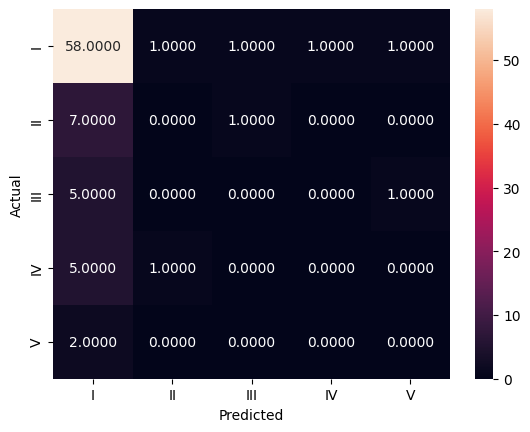



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
       Description Of Data ModelName  Train Accuracy  Test Accuracy  \
0  Word2Vec-Basic-Accident       KNN        0.997006       0.690476   

   Precision    Recall        F1  
0   0.555968  0.690476  0.615964  
Model :  Ridge



Classification - Heatmap




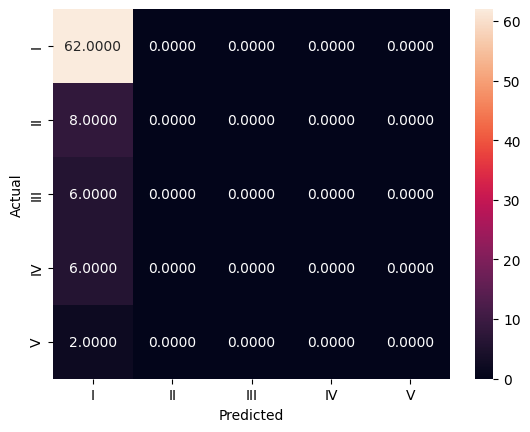



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
       Description Of Data ModelName  Train Accuracy  Test Accuracy  \
0  Word2Vec-Basic-Accident       KNN        0.997006       0.690476   
1  Word2Vec-Basic-Accident     Ridge        0.763473       0.738095   

   Precision    Recall        F1  
0   0.555968  0.690476  0.615964  
1   0.544785  0.738095  0.626875  
Model :  LogisticRegression



Classification - Heatmap




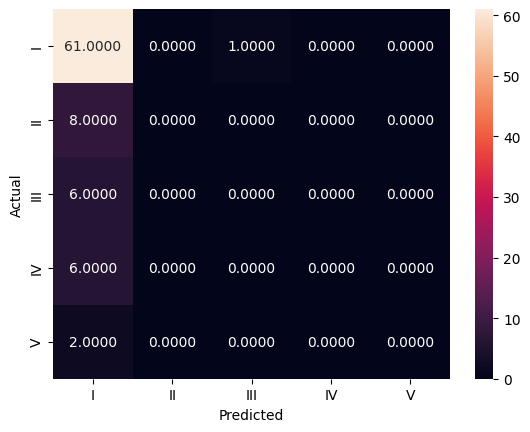



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
       Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  Word2Vec-Basic-Accident                 KNN        0.997006       0.690476   
1  Word2Vec-Basic-Accident               Ridge        0.763473       0.738095   
2  Word2Vec-Basic-Accident  LogisticRegression        0.742515       0.726190   

   Precision    Recall        F1  
0   0.555968  0.690476  0.615964  
1   0.544785  0.738095  0.626875  
2   0.542456  0.726190  0.621018  
Model :  GradientBoost



Classification - Heatmap




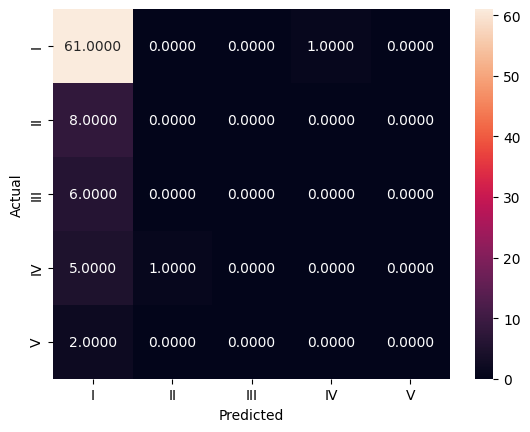



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
       Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  Word2Vec-Basic-Accident                 KNN        0.997006       0.690476   
1  Word2Vec-Basic-Accident               Ridge        0.763473       0.738095   
2  Word2Vec-Basic-Accident  LogisticRegression        0.742515       0.726190   
3  Word2Vec-Basic-Accident       GradientBoost        0.997006       0.726190   

   Precision    Recall        F1  
0   0.555968  0.690476  0.615964  
1   0.544785  0.738095  0.626875  
2   0.542456  0.726190  0.621018  
3   0.549071  0.726190  0.625331  
Model :  SVM



Classification - Heatmap




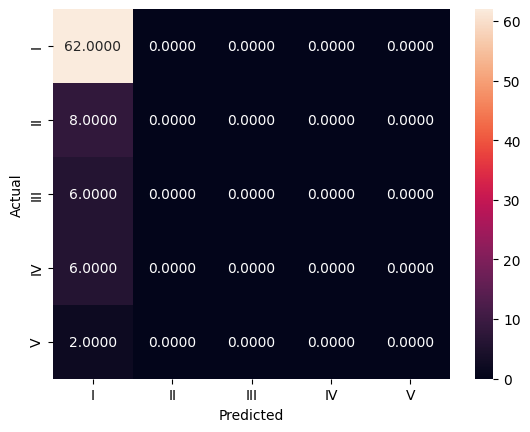



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
       Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  Word2Vec-Basic-Accident                 KNN        0.997006       0.690476   
1  Word2Vec-Basic-Accident               Ridge        0.763473       0.738095   
2  Word2Vec-Basic-Accident  LogisticRegression        0.742515       0.726190   
3  Word2Vec-Basic-Accident       GradientBoost        0.997006       0.726190   
4  Word2Vec-Basic-Accident                 SVM        0.739521       0.738095   

   Precision    Recall        F1  
0   0.555968  0.690476  0.615964  
1   0.544785  0.738095  0.626875  
2   0.542456  0.726190  0.621018  
3   0.549071  0.726190  0.625331  
4   0.544785  0.738095  0.626875  
Model :  Bagging



Classification - Heatmap




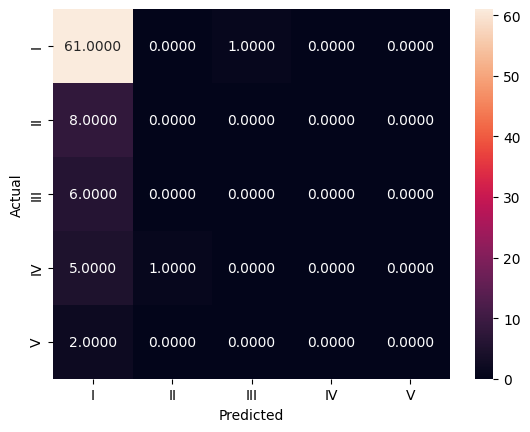



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
       Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  Word2Vec-Basic-Accident                 KNN        0.997006       0.690476   
1  Word2Vec-Basic-Accident               Ridge        0.763473       0.738095   
2  Word2Vec-Basic-Accident  LogisticRegression        0.742515       0.726190   
3  Word2Vec-Basic-Accident       GradientBoost        0.997006       0.726190   
4  Word2Vec-Basic-Accident                 SVM        0.739521       0.738095   
5  Word2Vec-Basic-Accident             Bagging        0.967066       0.726190   

   Precision    Recall        F1  
0   0.555968  0.690476  0.615964  
1   0.544785  0.738095  0.626875  
2   0.542456  0.726190  0.621018  
3   0.549071  0.726190  0.625331  
4   0.544785  0.738095  0.626875  
5   0.549071  0.726190  0.625331  
Model :  RandomForest



Classification - Heatmap




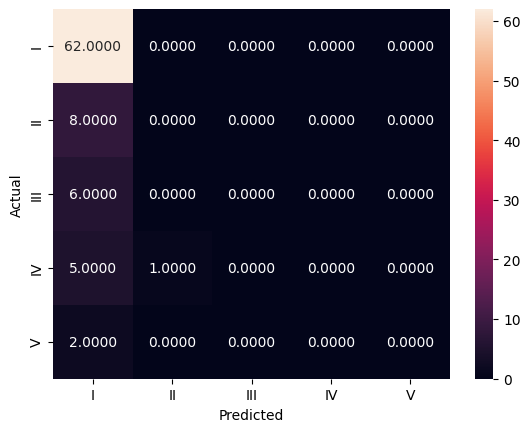



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
       Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  Word2Vec-Basic-Accident                 KNN        0.997006       0.690476   
1  Word2Vec-Basic-Accident               Ridge        0.763473       0.738095   
2  Word2Vec-Basic-Accident  LogisticRegression        0.742515       0.726190   
3  Word2Vec-Basic-Accident       GradientBoost        0.997006       0.726190   
4  Word2Vec-Basic-Accident                 SVM        0.739521       0.738095   
5  Word2Vec-Basic-Accident             Bagging        0.967066       0.726190   
6  Word2Vec-Basic-Accident        RandomForest        0.997006       0.738095   

   Precision    Recall        F1  
0   0.555968  0.690476  0.615964  
1   0.544785  0.738095  0.626875  
2   0.542456  0.726190  0.621018  
3   0.549071  0.726190  0.625331  
4   0.544785  0.738095  0.626875  
5   0.549071  0.726190  0.625331  


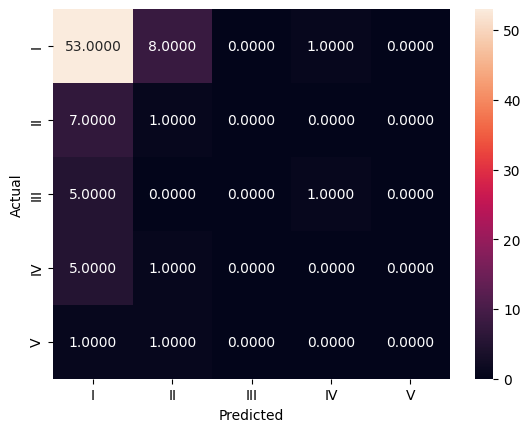



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
       Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  Word2Vec-Basic-Accident                 KNN        0.997006       0.690476   
1  Word2Vec-Basic-Accident               Ridge        0.763473       0.738095   
2  Word2Vec-Basic-Accident  LogisticRegression        0.742515       0.726190   
3  Word2Vec-Basic-Accident       GradientBoost        0.997006       0.726190   
4  Word2Vec-Basic-Accident                 SVM        0.739521       0.738095   
5  Word2Vec-Basic-Accident             Bagging        0.967066       0.726190   
6  Word2Vec-Basic-Accident        RandomForest        0.997006       0.738095   
7  Word2Vec-Basic-Accident        DecisionTree        0.799401       0.642857   

   Precision    Recall        F1  
0   0.555968  0.690476  0.615964  
1   0.544785  0.738095  0.626875  
2   0.542456  0.726190  0.621018  
3   0.549071  0.726190  

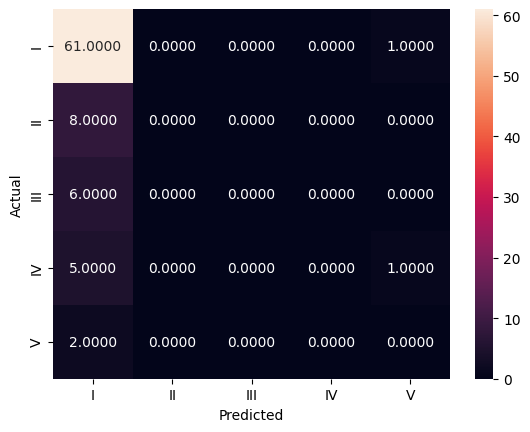



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
       Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  Word2Vec-Basic-Accident                 KNN        0.997006       0.690476   
1  Word2Vec-Basic-Accident               Ridge        0.763473       0.738095   
2  Word2Vec-Basic-Accident  LogisticRegression        0.742515       0.726190   
3  Word2Vec-Basic-Accident       GradientBoost        0.997006       0.726190   
4  Word2Vec-Basic-Accident                 SVM        0.739521       0.738095   
5  Word2Vec-Basic-Accident             Bagging        0.967066       0.726190   
6  Word2Vec-Basic-Accident        RandomForest        0.997006       0.738095   
7  Word2Vec-Basic-Accident        DecisionTree        0.799401       0.642857   
8  Word2Vec-Basic-Accident            AdaBoost        0.733533       0.726190   

   Precision    Recall        F1  
0   0.555968  0.690476  0.615964  
1   0.544785 

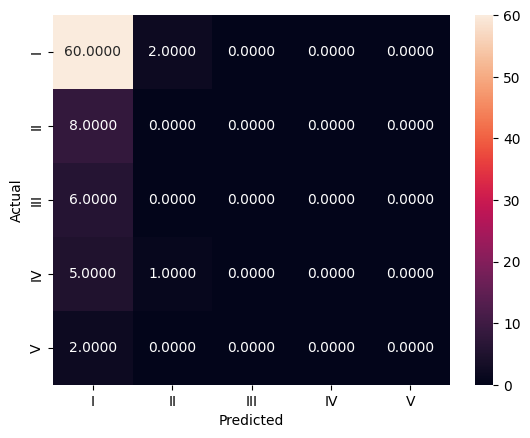



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
       Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  Word2Vec-Basic-Accident                 KNN        0.997006       0.690476   
1  Word2Vec-Basic-Accident               Ridge        0.763473       0.738095   
2  Word2Vec-Basic-Accident  LogisticRegression        0.742515       0.726190   
3  Word2Vec-Basic-Accident       GradientBoost        0.997006       0.726190   
4  Word2Vec-Basic-Accident                 SVM        0.739521       0.738095   
5  Word2Vec-Basic-Accident             Bagging        0.967066       0.726190   
6  Word2Vec-Basic-Accident        RandomForest        0.997006       0.738095   
7  Word2Vec-Basic-Accident        DecisionTree        0.799401       0.642857   
8  Word2Vec-Basic-Accident            AdaBoost        0.733533       0.726190   
9  Word2Vec-Basic-Accident             XGBoost        0.997006       0.714286   

  

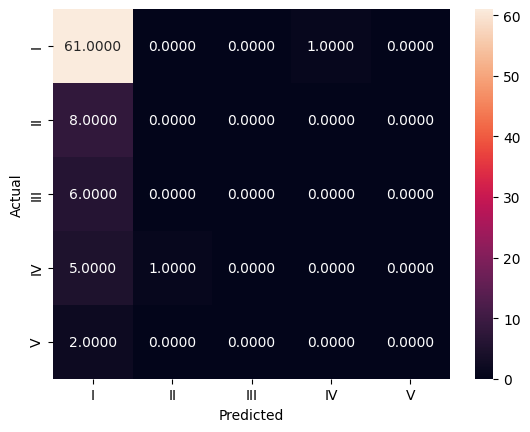



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
        Description Of Data           ModelName  Train Accuracy  \
0   Word2Vec-Basic-Accident                 KNN        0.997006   
1   Word2Vec-Basic-Accident               Ridge        0.763473   
2   Word2Vec-Basic-Accident  LogisticRegression        0.742515   
3   Word2Vec-Basic-Accident       GradientBoost        0.997006   
4   Word2Vec-Basic-Accident                 SVM        0.739521   
5   Word2Vec-Basic-Accident             Bagging        0.967066   
6   Word2Vec-Basic-Accident        RandomForest        0.997006   
7   Word2Vec-Basic-Accident        DecisionTree        0.799401   
8   Word2Vec-Basic-Accident            AdaBoost        0.733533   
9   Word2Vec-Basic-Accident             XGBoost        0.997006   
10  Word2Vec-Basic-Accident      Gradient Boost        0.925150   

    Test Accuracy  Precision    Recall        F1  
0        0.690476   0.555968  0.690476

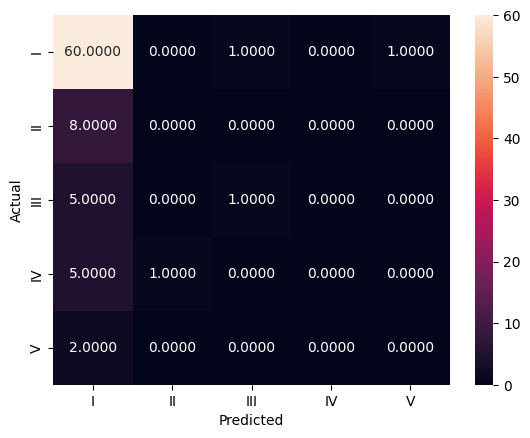



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data ModelName  Train Accuracy  Test Accuracy  Precision  \
0  Glove-Basic-Accident       KNN        0.997006        0.72619   0.589286   

    Recall      F1  
0  0.72619  0.6416  
Model :  Ridge



Classification - Heatmap




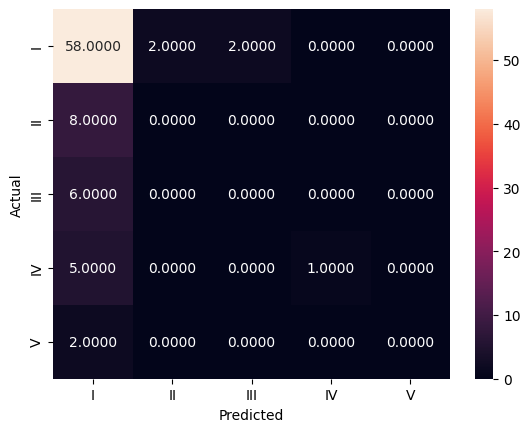



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data ModelName  Train Accuracy  Test Accuracy  Precision  \
0  Glove-Basic-Accident       KNN        0.997006       0.726190   0.589286   
1  Glove-Basic-Accident     Ridge        0.826347       0.702381   0.613321   

     Recall        F1  
0  0.726190  0.641600  
1  0.702381  0.627635  
Model :  LogisticRegression



Classification - Heatmap




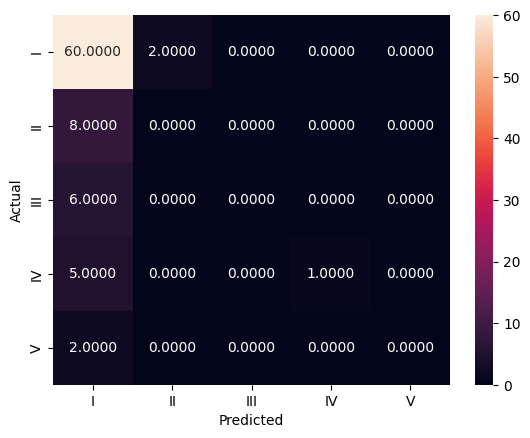



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  Glove-Basic-Accident                 KNN        0.997006       0.726190   
1  Glove-Basic-Accident               Ridge        0.826347       0.702381   
2  Glove-Basic-Accident  LogisticRegression        0.790419       0.726190   

   Precision    Recall        F1  
0   0.589286  0.726190  0.641600  
1   0.613321  0.702381  0.627635  
2   0.618166  0.726190  0.639789  
Model :  GradientBoost



Classification - Heatmap




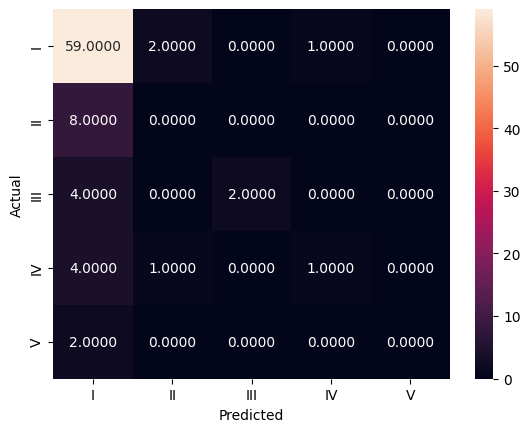



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  Glove-Basic-Accident                 KNN        0.997006       0.726190   
1  Glove-Basic-Accident               Ridge        0.826347       0.702381   
2  Glove-Basic-Accident  LogisticRegression        0.790419       0.726190   
3  Glove-Basic-Accident       GradientBoost        0.997006       0.738095   

   Precision    Recall        F1  
0   0.589286  0.726190  0.641600  
1   0.613321  0.702381  0.627635  
2   0.618166  0.726190  0.639789  
3   0.672696  0.738095  0.680156  
Model :  SVM



Classification - Heatmap




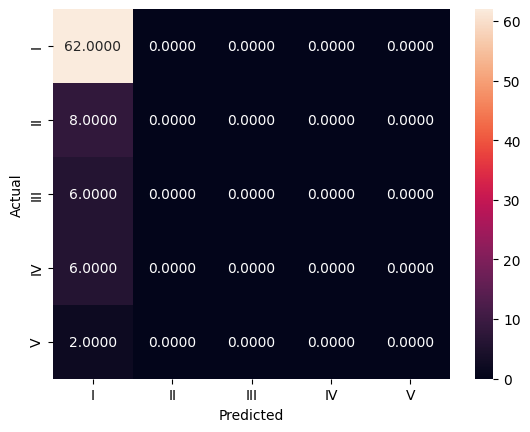



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  Glove-Basic-Accident                 KNN        0.997006       0.726190   
1  Glove-Basic-Accident               Ridge        0.826347       0.702381   
2  Glove-Basic-Accident  LogisticRegression        0.790419       0.726190   
3  Glove-Basic-Accident       GradientBoost        0.997006       0.738095   
4  Glove-Basic-Accident                 SVM        0.739521       0.738095   

   Precision    Recall        F1  
0   0.589286  0.726190  0.641600  
1   0.613321  0.702381  0.627635  
2   0.618166  0.726190  0.639789  
3   0.672696  0.738095  0.680156  
4   0.544785  0.738095  0.626875  
Model :  Bagging



Classification - Heatmap




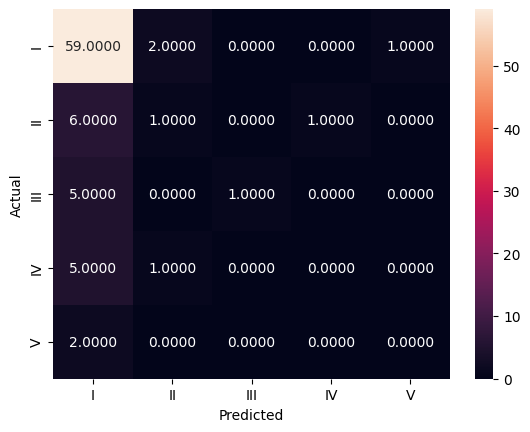



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  Glove-Basic-Accident                 KNN        0.997006       0.726190   
1  Glove-Basic-Accident               Ridge        0.826347       0.702381   
2  Glove-Basic-Accident  LogisticRegression        0.790419       0.726190   
3  Glove-Basic-Accident       GradientBoost        0.997006       0.738095   
4  Glove-Basic-Accident                 SVM        0.739521       0.738095   
5  Glove-Basic-Accident             Bagging        0.949102       0.726190   

   Precision    Recall        F1  
0   0.589286  0.726190  0.641600  
1   0.613321  0.702381  0.627635  
2   0.618166  0.726190  0.639789  
3   0.672696  0.738095  0.680156  
4   0.544785  0.738095  0.626875  
5   0.660792  0.726190  0.662866  
Model :  RandomForest



Classification - Heatmap




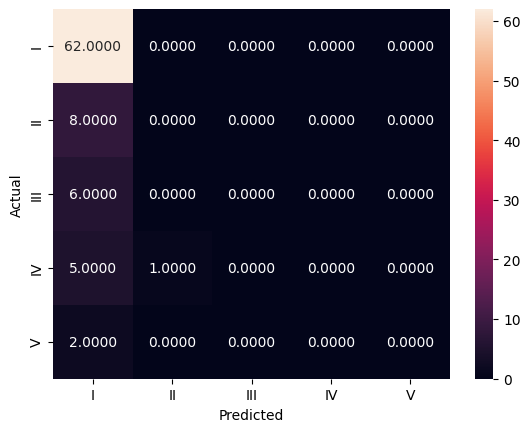



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  Glove-Basic-Accident                 KNN        0.997006       0.726190   
1  Glove-Basic-Accident               Ridge        0.826347       0.702381   
2  Glove-Basic-Accident  LogisticRegression        0.790419       0.726190   
3  Glove-Basic-Accident       GradientBoost        0.997006       0.738095   
4  Glove-Basic-Accident                 SVM        0.739521       0.738095   
5  Glove-Basic-Accident             Bagging        0.949102       0.726190   
6  Glove-Basic-Accident        RandomForest        0.997006       0.738095   

   Precision    Recall        F1  
0   0.589286  0.726190  0.641600  
1   0.613321  0.702381  0.627635  
2   0.618166  0.726190  0.639789  
3   0.672696  0.738095  0.680156  
4   0.544785  0.738095  0.626875  
5   0.660792  0.726190  0.662866  
6   0.551348  0.738095  

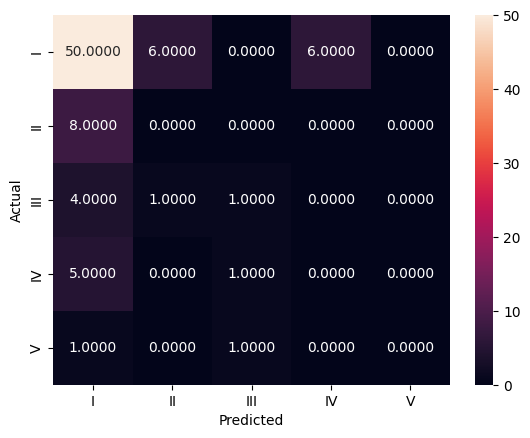



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  Glove-Basic-Accident                 KNN        0.997006       0.726190   
1  Glove-Basic-Accident               Ridge        0.826347       0.702381   
2  Glove-Basic-Accident  LogisticRegression        0.790419       0.726190   
3  Glove-Basic-Accident       GradientBoost        0.997006       0.738095   
4  Glove-Basic-Accident                 SVM        0.739521       0.738095   
5  Glove-Basic-Accident             Bagging        0.949102       0.726190   
6  Glove-Basic-Accident        RandomForest        0.997006       0.738095   
7  Glove-Basic-Accident        DecisionTree        0.856287       0.607143   

   Precision    Recall        F1  
0   0.589286  0.726190  0.641600  
1   0.613321  0.702381  0.627635  
2   0.618166  0.726190  0.639789  
3   0.672696  0.738095  0.680156  
4   0.544785  0.

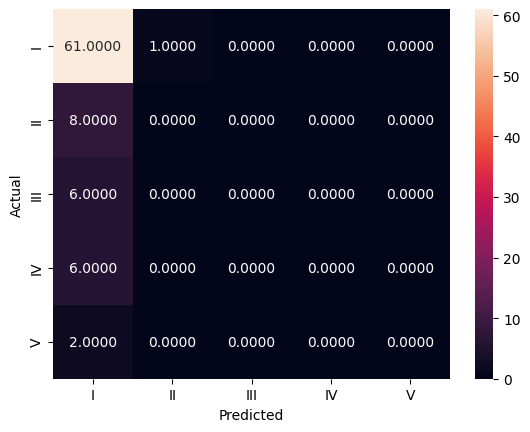



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  Glove-Basic-Accident                 KNN        0.997006       0.726190   
1  Glove-Basic-Accident               Ridge        0.826347       0.702381   
2  Glove-Basic-Accident  LogisticRegression        0.790419       0.726190   
3  Glove-Basic-Accident       GradientBoost        0.997006       0.738095   
4  Glove-Basic-Accident                 SVM        0.739521       0.738095   
5  Glove-Basic-Accident             Bagging        0.949102       0.726190   
6  Glove-Basic-Accident        RandomForest        0.997006       0.738095   
7  Glove-Basic-Accident        DecisionTree        0.856287       0.607143   
8  Glove-Basic-Accident            AdaBoost        0.736527       0.726190   

   Precision    Recall        F1  
0   0.589286  0.726190  0.641600  
1   0.613321  0.702381  0.627635  
2   0.61

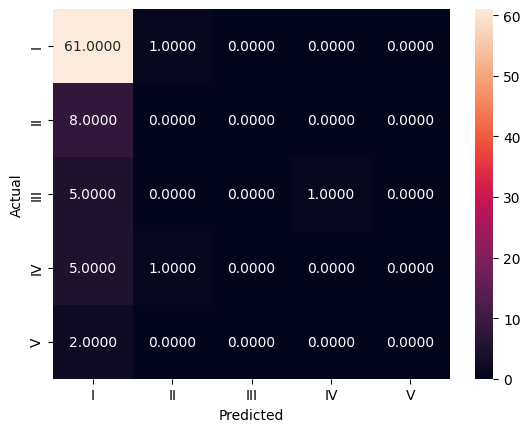



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  Glove-Basic-Accident                 KNN        0.997006       0.726190   
1  Glove-Basic-Accident               Ridge        0.826347       0.702381   
2  Glove-Basic-Accident  LogisticRegression        0.790419       0.726190   
3  Glove-Basic-Accident       GradientBoost        0.997006       0.738095   
4  Glove-Basic-Accident                 SVM        0.739521       0.738095   
5  Glove-Basic-Accident             Bagging        0.949102       0.726190   
6  Glove-Basic-Accident        RandomForest        0.997006       0.738095   
7  Glove-Basic-Accident        DecisionTree        0.856287       0.607143   
8  Glove-Basic-Accident            AdaBoost        0.736527       0.726190   
9  Glove-Basic-Accident             XGBoost        0.997006       0.726190   

   Precision    Recall        F1  


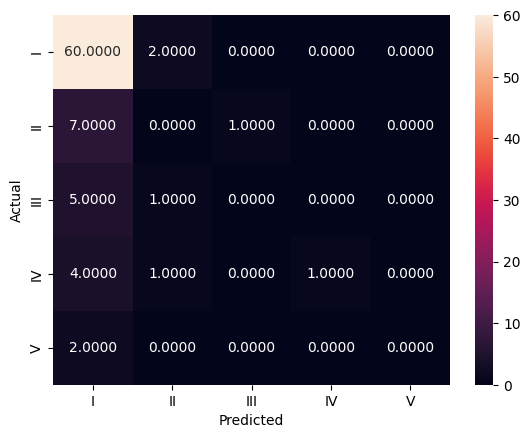



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
     Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0   Glove-Basic-Accident                 KNN        0.997006       0.726190   
1   Glove-Basic-Accident               Ridge        0.826347       0.702381   
2   Glove-Basic-Accident  LogisticRegression        0.790419       0.726190   
3   Glove-Basic-Accident       GradientBoost        0.997006       0.738095   
4   Glove-Basic-Accident                 SVM        0.739521       0.738095   
5   Glove-Basic-Accident             Bagging        0.949102       0.726190   
6   Glove-Basic-Accident        RandomForest        0.997006       0.738095   
7   Glove-Basic-Accident        DecisionTree        0.856287       0.607143   
8   Glove-Basic-Accident            AdaBoost        0.736527       0.726190   
9   Glove-Basic-Accident             XGBoost        0.997006       0.726190   
10  Glove-Basic-Accident 

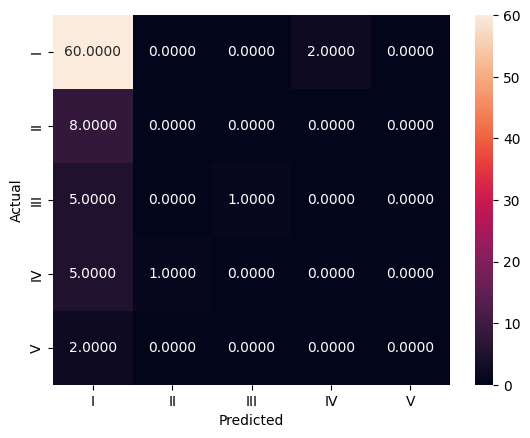



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data ModelName  Train Accuracy  Test Accuracy  Precision  \
0  TfIdf-Basic-Accident       KNN        0.997006        0.72619      0.625   

    Recall        F1  
0  0.72619  0.644151  
Model :  Ridge



Classification - Heatmap




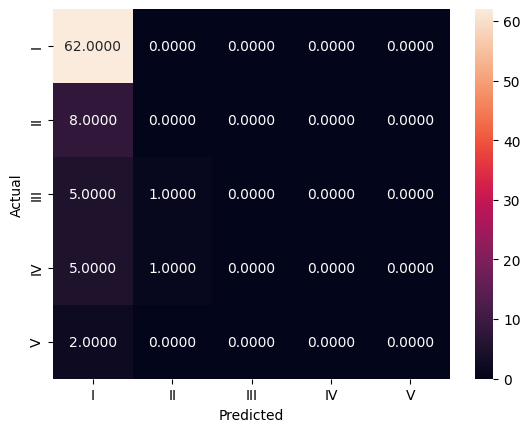



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data ModelName  Train Accuracy  Test Accuracy  Precision  \
0  TfIdf-Basic-Accident       KNN        0.997006       0.726190   0.625000   
1  TfIdf-Basic-Accident     Ridge        0.979042       0.738095   0.558072   

     Recall        F1  
0  0.726190  0.644151  
1  0.738095  0.635582  
Model :  LogisticRegression



Classification - Heatmap




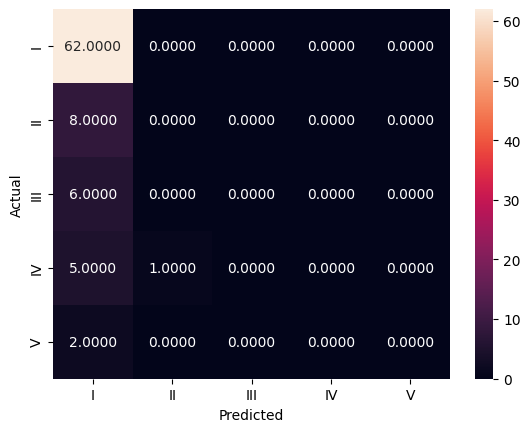



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  TfIdf-Basic-Accident                 KNN        0.997006       0.726190   
1  TfIdf-Basic-Accident               Ridge        0.979042       0.738095   
2  TfIdf-Basic-Accident  LogisticRegression        0.793413       0.738095   

   Precision    Recall        F1  
0   0.625000  0.726190  0.644151  
1   0.558072  0.738095  0.635582  
2   0.551348  0.738095  0.631199  
Model :  GradientBoost



Classification - Heatmap




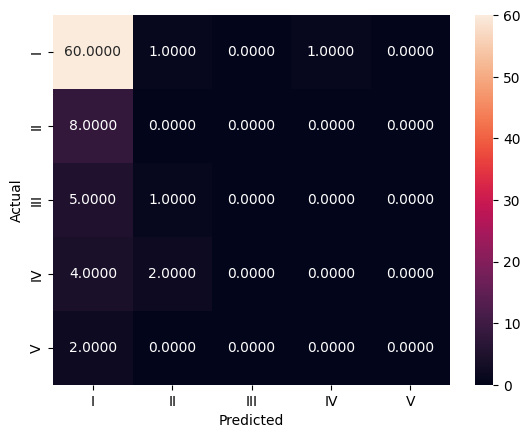



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  TfIdf-Basic-Accident                 KNN        0.997006       0.726190   
1  TfIdf-Basic-Accident               Ridge        0.979042       0.738095   
2  TfIdf-Basic-Accident  LogisticRegression        0.793413       0.738095   
3  TfIdf-Basic-Accident       GradientBoost        0.997006       0.714286   

   Precision    Recall        F1  
0   0.625000  0.726190  0.644151  
1   0.558072  0.738095  0.635582  
2   0.551348  0.738095  0.631199  
3   0.560579  0.714286  0.628166  
Model :  SVM



Classification - Heatmap




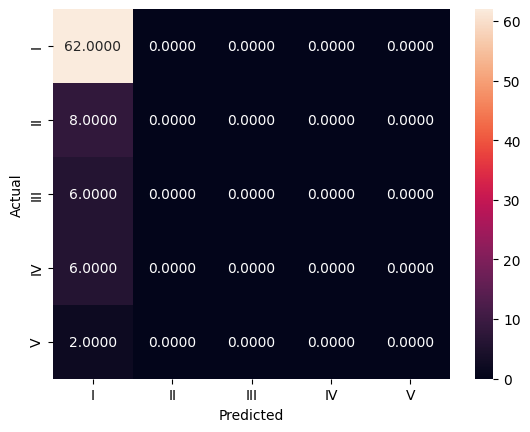



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  TfIdf-Basic-Accident                 KNN        0.997006       0.726190   
1  TfIdf-Basic-Accident               Ridge        0.979042       0.738095   
2  TfIdf-Basic-Accident  LogisticRegression        0.793413       0.738095   
3  TfIdf-Basic-Accident       GradientBoost        0.997006       0.714286   
4  TfIdf-Basic-Accident                 SVM        0.739521       0.738095   

   Precision    Recall        F1  
0   0.625000  0.726190  0.644151  
1   0.558072  0.738095  0.635582  
2   0.551348  0.738095  0.631199  
3   0.560579  0.714286  0.628166  
4   0.544785  0.738095  0.626875  
Model :  Bagging



Classification - Heatmap




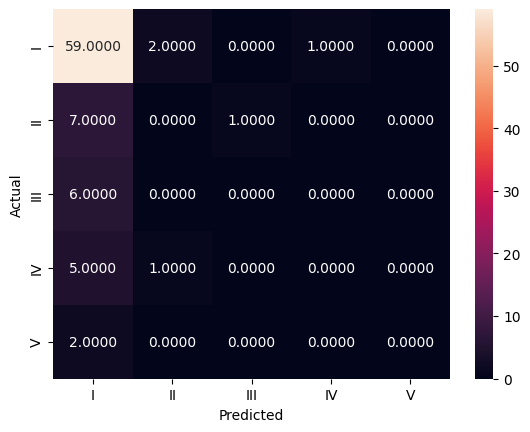



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  TfIdf-Basic-Accident                 KNN        0.997006       0.726190   
1  TfIdf-Basic-Accident               Ridge        0.979042       0.738095   
2  TfIdf-Basic-Accident  LogisticRegression        0.793413       0.738095   
3  TfIdf-Basic-Accident       GradientBoost        0.997006       0.714286   
4  TfIdf-Basic-Accident                 SVM        0.739521       0.738095   
5  TfIdf-Basic-Accident             Bagging        0.949102       0.702381   

   Precision    Recall        F1  
0   0.625000  0.726190  0.644151  
1   0.558072  0.738095  0.635582  
2   0.551348  0.738095  0.631199  
3   0.560579  0.714286  0.628166  
4   0.544785  0.738095  0.626875  
5   0.551236  0.702381  0.617697  
Model :  RandomForest



Classification - Heatmap




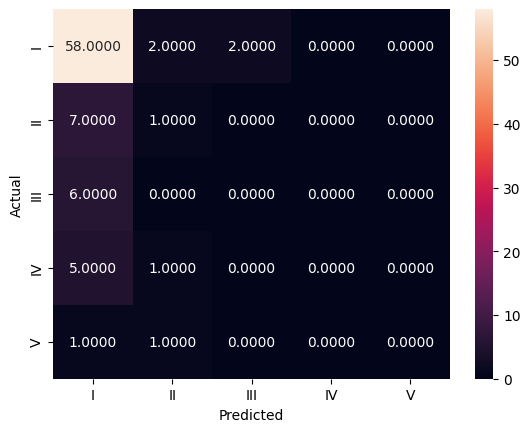



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  TfIdf-Basic-Accident                 KNN        0.997006       0.726190   
1  TfIdf-Basic-Accident               Ridge        0.979042       0.738095   
2  TfIdf-Basic-Accident  LogisticRegression        0.793413       0.738095   
3  TfIdf-Basic-Accident       GradientBoost        0.997006       0.714286   
4  TfIdf-Basic-Accident                 SVM        0.739521       0.738095   
5  TfIdf-Basic-Accident             Bagging        0.949102       0.702381   
6  TfIdf-Basic-Accident        RandomForest        0.967066       0.702381   

   Precision    Recall        F1  
0   0.625000  0.726190  0.644151  
1   0.558072  0.738095  0.635582  
2   0.551348  0.738095  0.631199  
3   0.560579  0.714286  0.628166  
4   0.544785  0.738095  0.626875  
5   0.551236  0.702381  0.617697  
6   0.575015  0.702381  

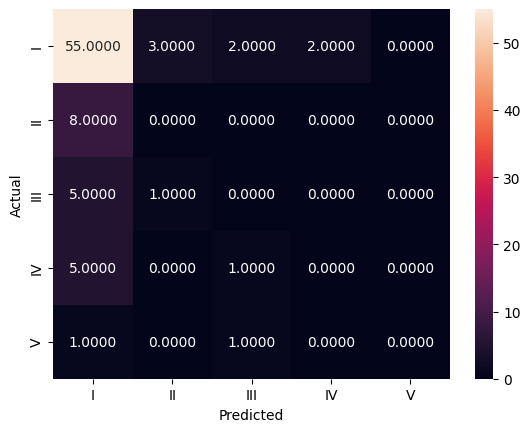



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  TfIdf-Basic-Accident                 KNN        0.997006       0.726190   
1  TfIdf-Basic-Accident               Ridge        0.979042       0.738095   
2  TfIdf-Basic-Accident  LogisticRegression        0.793413       0.738095   
3  TfIdf-Basic-Accident       GradientBoost        0.997006       0.714286   
4  TfIdf-Basic-Accident                 SVM        0.739521       0.738095   
5  TfIdf-Basic-Accident             Bagging        0.949102       0.702381   
6  TfIdf-Basic-Accident        RandomForest        0.967066       0.702381   
7  TfIdf-Basic-Accident        DecisionTree        0.778443       0.654762   

   Precision    Recall        F1  
0   0.625000  0.726190  0.644151  
1   0.558072  0.738095  0.635582  
2   0.551348  0.738095  0.631199  
3   0.560579  0.714286  0.628166  
4   0.544785  0.

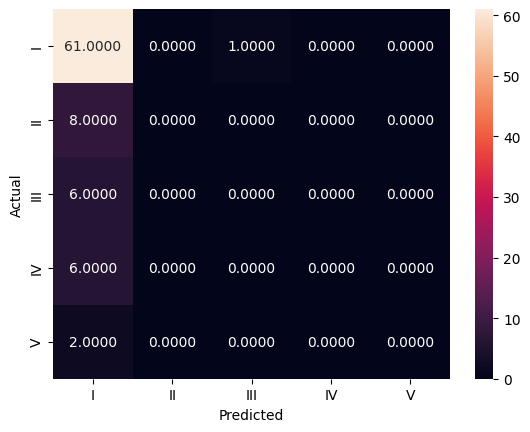



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  TfIdf-Basic-Accident                 KNN        0.997006       0.726190   
1  TfIdf-Basic-Accident               Ridge        0.979042       0.738095   
2  TfIdf-Basic-Accident  LogisticRegression        0.793413       0.738095   
3  TfIdf-Basic-Accident       GradientBoost        0.997006       0.714286   
4  TfIdf-Basic-Accident                 SVM        0.739521       0.738095   
5  TfIdf-Basic-Accident             Bagging        0.949102       0.702381   
6  TfIdf-Basic-Accident        RandomForest        0.967066       0.702381   
7  TfIdf-Basic-Accident        DecisionTree        0.778443       0.654762   
8  TfIdf-Basic-Accident            AdaBoost        0.760479       0.726190   

   Precision    Recall        F1  
0   0.625000  0.726190  0.644151  
1   0.558072  0.738095  0.635582  
2   0.55

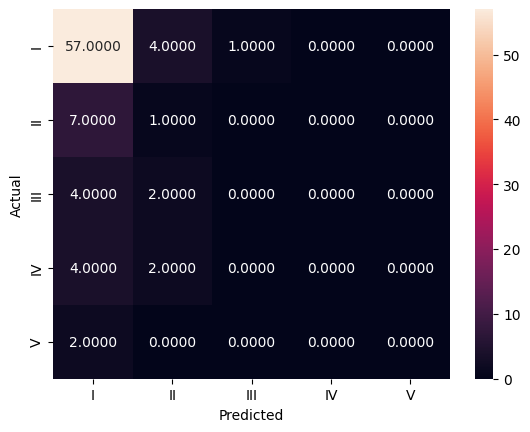



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
    Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0  TfIdf-Basic-Accident                 KNN        0.997006       0.726190   
1  TfIdf-Basic-Accident               Ridge        0.979042       0.738095   
2  TfIdf-Basic-Accident  LogisticRegression        0.793413       0.738095   
3  TfIdf-Basic-Accident       GradientBoost        0.997006       0.714286   
4  TfIdf-Basic-Accident                 SVM        0.739521       0.738095   
5  TfIdf-Basic-Accident             Bagging        0.949102       0.702381   
6  TfIdf-Basic-Accident        RandomForest        0.967066       0.702381   
7  TfIdf-Basic-Accident        DecisionTree        0.778443       0.654762   
8  TfIdf-Basic-Accident            AdaBoost        0.760479       0.726190   
9  TfIdf-Basic-Accident             XGBoost        0.997006       0.690476   

   Precision    Recall        F1  


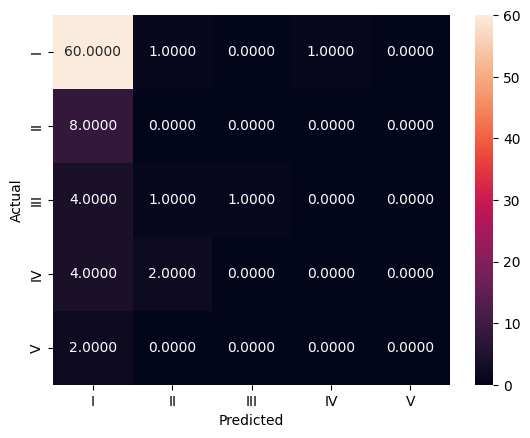



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
     Description Of Data           ModelName  Train Accuracy  Test Accuracy  \
0   TfIdf-Basic-Accident                 KNN        0.997006       0.726190   
1   TfIdf-Basic-Accident               Ridge        0.979042       0.738095   
2   TfIdf-Basic-Accident  LogisticRegression        0.793413       0.738095   
3   TfIdf-Basic-Accident       GradientBoost        0.997006       0.714286   
4   TfIdf-Basic-Accident                 SVM        0.739521       0.738095   
5   TfIdf-Basic-Accident             Bagging        0.949102       0.702381   
6   TfIdf-Basic-Accident        RandomForest        0.967066       0.702381   
7   TfIdf-Basic-Accident        DecisionTree        0.778443       0.654762   
8   TfIdf-Basic-Accident            AdaBoost        0.760479       0.726190   
9   TfIdf-Basic-Accident             XGBoost        0.997006       0.690476   
10  TfIdf-Basic-Accident 

In [ ]:
#Basic Train and Test on each of medium of data - word2vec / glove / tfidf

combinedResultDF = pd.concat([combinedResultDF, runAllModelDefault(X_train=X_train_w2v,Y_train=y_train_w2v,X_test=X_test_w2v,Y_test=y_test_w2v,descriptionOfData="Word2Vec-Basic-Accident")], ignore_index=True,sort=False)
combinedResultDF = pd.concat([combinedResultDF, runAllModelDefault(X_train=X_train_glove,Y_train=y_train_glove,X_test=X_test_glove,Y_test=y_test_glove,descriptionOfData="Glove-Basic-Accident")], ignore_index=True,sort=False)
combinedResultDF = pd.concat([combinedResultDF, runAllModelDefault(X_train=X_train_tfidf,Y_train=y_train_tfidf,X_test=X_test_tfidf,Y_test=y_test_tfidf,descriptionOfData="TfIdf-Basic-Accident")], ignore_index=True,sort=False)

In [ ]:
pd.set_option('display.width',1000)
print(combinedResultDF)

        Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0   Word2Vec-Basic-Accident                 KNN        0.997006       0.690476   0.555968  0.690476  0.615964
1   Word2Vec-Basic-Accident               Ridge        0.763473       0.738095   0.544785  0.738095  0.626875
2   Word2Vec-Basic-Accident  LogisticRegression        0.742515       0.726190   0.542456  0.726190  0.621018
3   Word2Vec-Basic-Accident       GradientBoost        0.997006       0.726190   0.549071  0.726190  0.625331
4   Word2Vec-Basic-Accident                 SVM        0.739521       0.738095   0.544785  0.738095  0.626875
5   Word2Vec-Basic-Accident             Bagging        0.967066       0.726190   0.549071  0.726190  0.625331
6   Word2Vec-Basic-Accident        RandomForest        0.997006       0.738095   0.551348  0.738095  0.631199
7   Word2Vec-Basic-Accident        DecisionTree        0.799401       0.642857   0.559631  0.642857  0.598281
8   Word2V

In [ ]:
combinedResultDF = pd.concat([combinedResultDF,runAllModelDefault(X_train=X_train_w2v_up,Y_train=y_train_w2v_up,X_test=X_test_w2v_pca,Y_test=y_test_w2v,descriptionOfData="Word2Vec-PCA&Upsampled-Accident")],ignore_index=True,sort=False)
combinedResultDF = pd.concat([combinedResultDF,runAllModelDefault(X_train=X_train_w2v_smote,Y_train=y_train_w2v_smote,X_test=X_test_w2v_pca,Y_test=y_test_w2v,descriptionOfData="Word2Vec-PCA&SMOTE-Accident")],ignore_index=True,sort=False)
combinedResultDF = pd.concat([combinedResultDF,runAllModelDefault(X_train=X_train_glove_up,Y_train=y_train_glove_up,X_test=X_test_glove_pca,Y_test=y_test_glove,descriptionOfData="Glove-PCA&Upsampled-Accident")],ignore_index=True,sort=False)
combinedResultDF = pd.concat([combinedResultDF,runAllModelDefault(X_train=X_train_glove_smote,Y_train=y_train_glove_smote,X_test=X_test_glove_pca,Y_test=y_test_glove,descriptionOfData="Glove-PCA&SMOTE-Accident")],ignore_index=True,sort=False)
combinedResultDF = pd.concat([combinedResultDF,runAllModelDefault(X_train=X_train_tfidf_up,Y_train=y_train_tfidf_up,X_test=X_test_tfidf_pca,Y_test=y_test_tfidf,descriptionOfData="TFIDF-PCA&Upsampled-Accident")],ignore_index=True,sort=False)
combinedResultDF = pd.concat([combinedResultDF,runAllModelDefault(X_train=X_train_tfidf_smote,Y_train=y_train_tfidf_smote,X_test=X_test_tfidf_pca,Y_test=y_test_tfidf,descriptionOfData="TFIDF-PCA&SMOTE-Accident")],ignore_index=True,sort=False)

In [ ]:
combinedResultDF.to_csv('Model Performance Report.csv')

In [ ]:
#combinedResultDF = pd.read_csv('drive/My Drive/AI ML - UT Austin/Project/Model Performance Report.csv')
combinedResultDF = pd.read_csv('Model Performance Report.csv')
combinedResultDF.drop(["Unnamed: 0"], axis=1, inplace=True)
combinedResultDF

Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0           Word2Vec-Basic-Accident                 KNN        0.997006       0.690476   0.555968  0.690476  0.615964
1           Word2Vec-Basic-Accident               Ridge        0.763473       0.738095   0.544785  0.738095  0.626875
2           Word2Vec-Basic-Accident  LogisticRegression        0.742515       0.726190   0.542456  0.726190  0.621018
3           Word2Vec-Basic-Accident       GradientBoost        0.997006       0.726190   0.549071  0.726190  0.625331
4           Word2Vec-Basic-Accident                 SVM        0.739521       0.738095   0.544785  0.738095  0.626875
5           Word2Vec-Basic-Accident             Bagging        0.967066       0.726190   0.549071  0.726190  0.625331
6           Word2Vec-Basic-Accident        RandomForest        0.997006       0.738095   0.551348  0.738095  0.631199
7           Word2Vec-Basic-Accident        DecisionTree        0.799401       0.642857   0.559631  0.642857  0.598281
8           Word2Vec-Basic-Accident            AdaBoost        0.733533       0.726190   0.549071  0.726190  0.625331
9           Word2Vec-Basic-Accident             XGBoost        0.997006       0.714286   0.546737  0.714286  0.619381
10          Word2Vec-Basic-Accident      Gradient Boost        0.925150       0.726190   0.549071  0.726190  0.625331
11             Glove-Basic-Accident                 KNN        0.997006       0.726190   0.589286  0.726190  0.641600
12             Glove-Basic-Accident               Ridge        0.826347       0.702381   0.613321  0.702381  0.627635
13             Glove-Basic-Accident  LogisticRegression        0.790419       0.726190   0.618166  0.726190  0.639789
14             Glove-Basic-Accident       GradientBoost        0.997006       0.738095   0.672696  0.738095  0.680156
15             Glove-Basic-Accident                 SVM        0.739521       0.738095   0.544785  0.738095  0.626875
16             Glove-Basic-Accident             Bagging        0.949102       0.726190   0.660792  0.726190  0.662866
17             Glove-Basic-Accident        RandomForest        0.997006       0.738095   0.551348  0.738095  0.631199
18             Glove-Basic-Accident        DecisionTree        0.856287       0.607143   0.566527  0.607143  0.583639
19             Glove-Basic-Accident            AdaBoost        0.736527       0.726190   0.542456  0.726190  0.621018
20             Glove-Basic-Accident             XGBoost        0.997006       0.726190   0.555850  0.726190  0.629704
21             Glove-Basic-Accident      Gradient Boost        0.958084       0.726190   0.639194  0.726190  0.653061
22             TfIdf-Basic-Accident                 KNN        0.997006       0.726190   0.625000  0.726190  0.644151
23             TfIdf-Basic-Accident               Ridge        0.979042       0.738095   0.558072  0.738095  0.635582
24             TfIdf-Basic-Accident  LogisticRegression        0.793413       0.738095   0.551348  0.738095  0.631199
25             TfIdf-Basic-Accident       GradientBoost        0.997006       0.714286   0.560579  0.714286  0.628166
26             TfIdf-Basic-Accident                 SVM        0.739521       0.738095   0.544785  0.738095  0.626875
27             TfIdf-Basic-Accident             Bagging        0.949102       0.702381   0.551236  0.702381  0.617697
28             TfIdf-Basic-Accident        RandomForest        0.967066       0.702381   0.575015  0.702381  0.630616
29             TfIdf-Basic-Accident        DecisionTree        0.778443       0.654762   0.548584  0.654762  0.596989
30             TfIdf-Basic-Accident            AdaBoost        0.760479       0.726190   0.542456  0.726190  0.621018
31             TfIdf-Basic-Accident             XGBoost        0.997006       0.690476   0.579115  0.690476  0.629902
32             TfIdf-Basic-Accident      Gradient Boost        0.892216       0.726190   0.639194  0.726190  0.653061
33  

After analyzing all the model performances on three different datasets(Word2Vwc, GloVe and TFIDF) and applying PCA for dimension reduction and upsampling & SMOTE for balancing, we identfied SVM and Ridge Classifier are perfoming well. Hence we decided to do hyper paramater tuning on those two models.

###### Potentail Accident level as Target

In [ ]:
combinedResult_Pot = pd.DataFrame(columns=['Description Of Data','ModelName','Train Accuracy','Test Accuracy','Precision','Recall','F1'])

In [ ]:
#train test split based on potential accident level as target
X_train_w2v_p,X_test_w2v_p,y_train_w2v_p,y_test_w2v_p=split(X_w2v,y_w2v_pot)
X_train_glove_p,X_test_glove_p,y_train_glove_p,y_test_glove_p=split(X_glove,y_glove_pot)
X_train_tfidf_p,X_test_tfidf_p,y_train_tfidf_p,y_test_tfidf_p=split(X_tfidf,y_tfidf_pot)

Model :  KNN



Classification - Heatmap




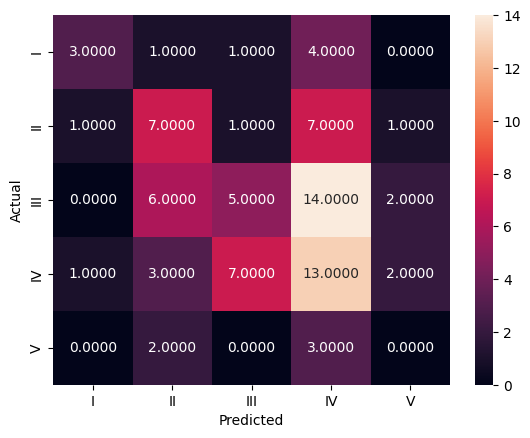



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                      Description Of Data ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Word2Vec-Basic-Accident       KNN             1.0       0.333333   0.351785  0.333333  0.323133
Model :  Ridge



Classification - Heatmap




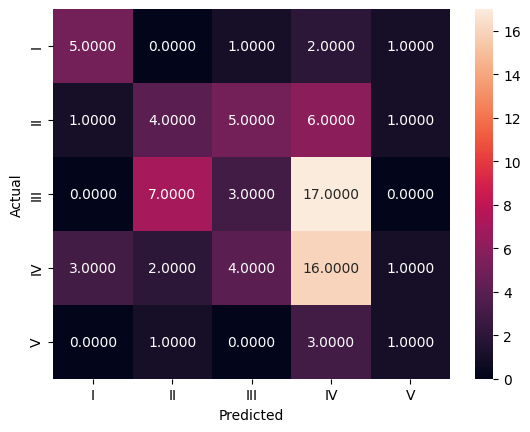



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                      Description Of Data ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Word2Vec-Basic-Accident       KNN        1.000000       0.333333   0.351785  0.333333  0.323133
1  Potential Acc: Word2Vec-Basic-Accident     Ridge        0.580838       0.345238   0.318958  0.345238  0.314690
Model :  LogisticRegression



Classification - Heatmap




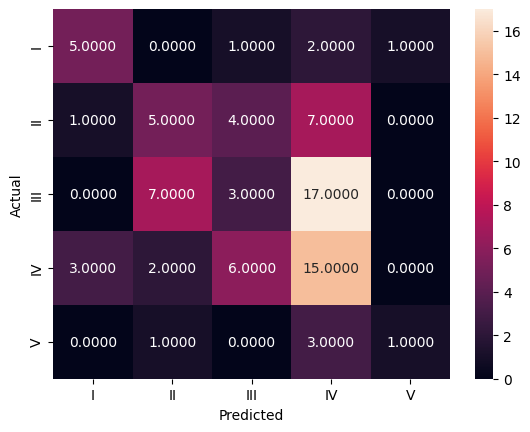



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                      Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Word2Vec-Basic-Accident                 KNN        1.000000       0.333333   0.351785  0.333333  0.323133
1  Potential Acc: Word2Vec-Basic-Accident               Ridge        0.580838       0.345238   0.318958  0.345238  0.314690
2  Potential Acc: Word2Vec-Basic-Accident  LogisticRegression        0.574850       0.345238   0.331143  0.345238  0.319466
Model :  GradientBoost



Classification - Heatmap




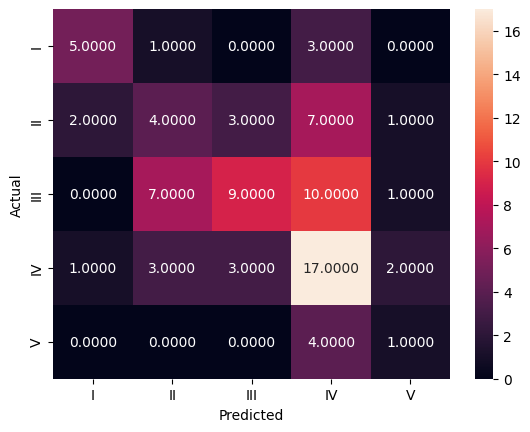



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                      Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Word2Vec-Basic-Accident                 KNN        1.000000       0.333333   0.351785  0.333333  0.323133
1  Potential Acc: Word2Vec-Basic-Accident               Ridge        0.580838       0.345238   0.318958  0.345238  0.314690
2  Potential Acc: Word2Vec-Basic-Accident  LogisticRegression        0.574850       0.345238   0.331143  0.345238  0.319466
3  Potential Acc: Word2Vec-Basic-Accident       GradientBoost        1.000000       0.428571   0.454034  0.428571  0.420352
Model :  SVM



Classification - Heatmap




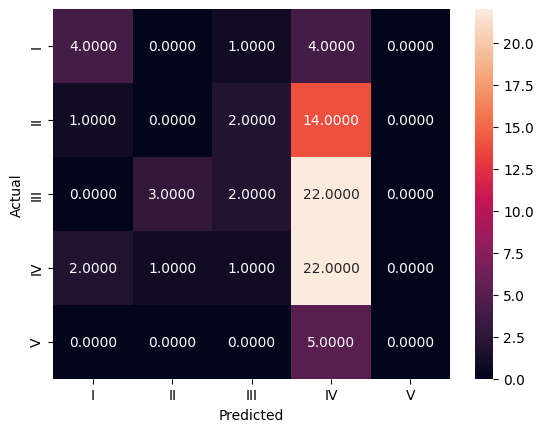



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                      Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Word2Vec-Basic-Accident                 KNN        1.000000       0.333333   0.351785  0.333333  0.323133
1  Potential Acc: Word2Vec-Basic-Accident               Ridge        0.580838       0.345238   0.318958  0.345238  0.314690
2  Potential Acc: Word2Vec-Basic-Accident  LogisticRegression        0.574850       0.345238   0.331143  0.345238  0.319466
3  Potential Acc: Word2Vec-Basic-Accident       GradientBoost        1.000000       0.428571   0.454034  0.428571  0.420352
4  Potential Acc: Word2Vec-Basic-Accident                 SVM        0.479042       0.333333   0.270002  0.333333  0.238974
Model :  Bagging



Classification - Heatmap




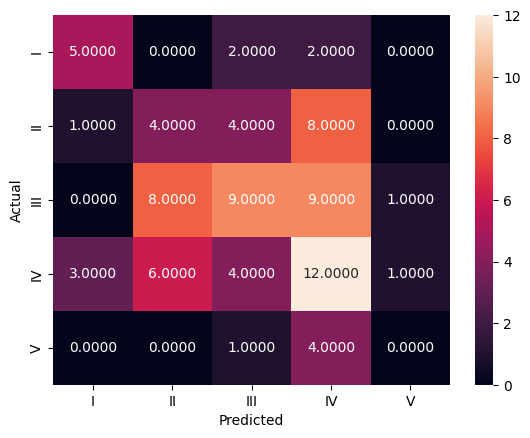



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                      Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Word2Vec-Basic-Accident                 KNN        1.000000       0.333333   0.351785  0.333333  0.323133
1  Potential Acc: Word2Vec-Basic-Accident               Ridge        0.580838       0.345238   0.318958  0.345238  0.314690
2  Potential Acc: Word2Vec-Basic-Accident  LogisticRegression        0.574850       0.345238   0.331143  0.345238  0.319466
3  Potential Acc: Word2Vec-Basic-Accident       GradientBoost        1.000000       0.428571   0.454034  0.428571  0.420352
4  Potential Acc: Word2Vec-Basic-Accident                 SVM        0.479042       0.333333   0.270002  0.333333  0.238974
5  Potential Acc: Word2Vec-Basic-Accident             Bagging        0.985030       0.357143   0.355263  0.357143  0.350662
Model :  RandomForest



C

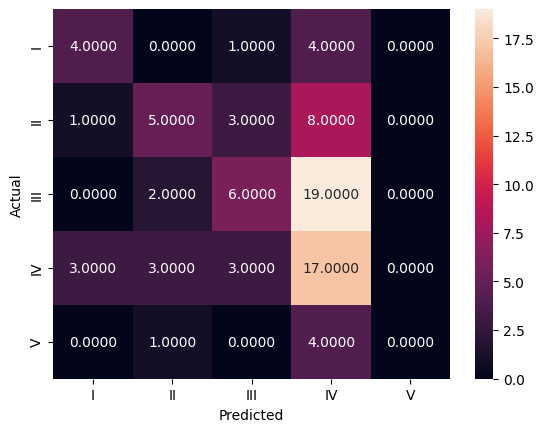



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                      Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Word2Vec-Basic-Accident                 KNN        1.000000       0.333333   0.351785  0.333333  0.323133
1  Potential Acc: Word2Vec-Basic-Accident               Ridge        0.580838       0.345238   0.318958  0.345238  0.314690
2  Potential Acc: Word2Vec-Basic-Accident  LogisticRegression        0.574850       0.345238   0.331143  0.345238  0.319466
3  Potential Acc: Word2Vec-Basic-Accident       GradientBoost        1.000000       0.428571   0.454034  0.428571  0.420352
4  Potential Acc: Word2Vec-Basic-Accident                 SVM        0.479042       0.333333   0.270002  0.333333  0.238974
5  Potential Acc: Word2Vec-Basic-Accident             Bagging        0.985030       0.357143   0.355263  0.357143  0.350662
6  Potential Acc: Word2Vec

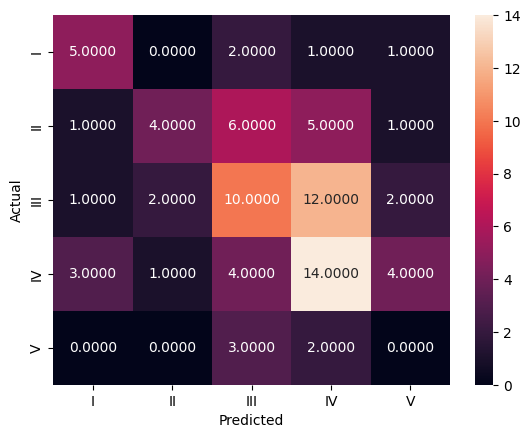



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                      Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Word2Vec-Basic-Accident                 KNN        1.000000       0.333333   0.351785  0.333333  0.323133
1  Potential Acc: Word2Vec-Basic-Accident               Ridge        0.580838       0.345238   0.318958  0.345238  0.314690
2  Potential Acc: Word2Vec-Basic-Accident  LogisticRegression        0.574850       0.345238   0.331143  0.345238  0.319466
3  Potential Acc: Word2Vec-Basic-Accident       GradientBoost        1.000000       0.428571   0.454034  0.428571  0.420352
4  Potential Acc: Word2Vec-Basic-Accident                 SVM        0.479042       0.333333   0.270002  0.333333  0.238974
5  Potential Acc: Word2Vec-Basic-Accident             Bagging        0.985030       0.357143   0.355263  0.357143  0.350662
6  Potential Acc: Word2Vec

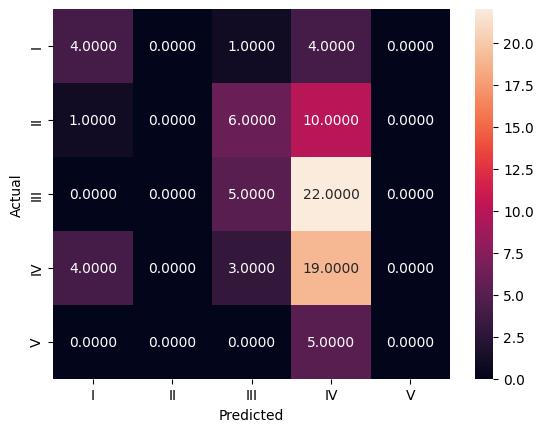



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                      Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Word2Vec-Basic-Accident                 KNN        1.000000       0.333333   0.351785  0.333333  0.323133
1  Potential Acc: Word2Vec-Basic-Accident               Ridge        0.580838       0.345238   0.318958  0.345238  0.314690
2  Potential Acc: Word2Vec-Basic-Accident  LogisticRegression        0.574850       0.345238   0.331143  0.345238  0.319466
3  Potential Acc: Word2Vec-Basic-Accident       GradientBoost        1.000000       0.428571   0.454034  0.428571  0.420352
4  Potential Acc: Word2Vec-Basic-Accident                 SVM        0.479042       0.333333   0.270002  0.333333  0.238974
5  Potential Acc: Word2Vec-Basic-Accident             Bagging        0.985030       0.357143   0.355263  0.357143  0.350662
6  Potential Acc: Word2Vec

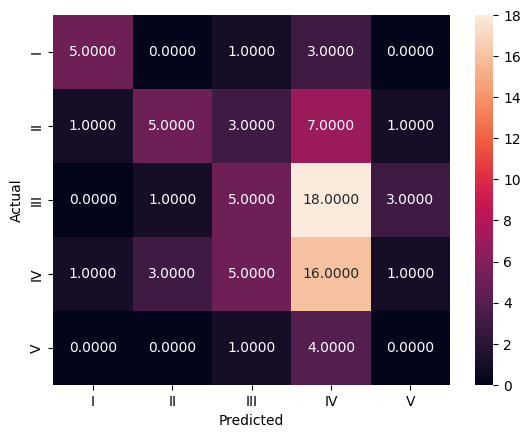



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                      Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Word2Vec-Basic-Accident                 KNN        1.000000       0.333333   0.351785  0.333333  0.323133
1  Potential Acc: Word2Vec-Basic-Accident               Ridge        0.580838       0.345238   0.318958  0.345238  0.314690
2  Potential Acc: Word2Vec-Basic-Accident  LogisticRegression        0.574850       0.345238   0.331143  0.345238  0.319466
3  Potential Acc: Word2Vec-Basic-Accident       GradientBoost        1.000000       0.428571   0.454034  0.428571  0.420352
4  Potential Acc: Word2Vec-Basic-Accident                 SVM        0.479042       0.333333   0.270002  0.333333  0.238974
5  Potential Acc: Word2Vec-Basic-Accident             Bagging        0.985030       0.357143   0.355263  0.357143  0.350662
6  Potential Acc: Word2Vec

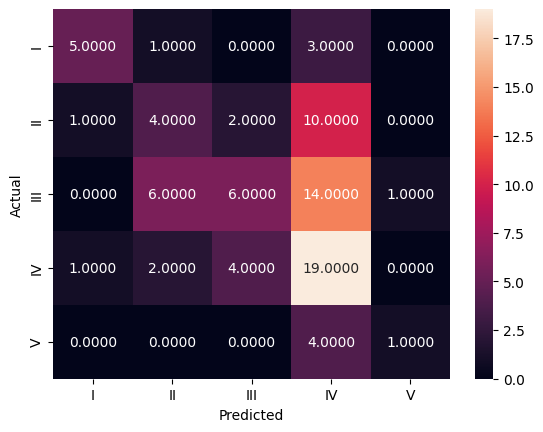



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                       Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0   Potential Acc: Word2Vec-Basic-Accident                 KNN        1.000000       0.333333   0.351785  0.333333  0.323133
1   Potential Acc: Word2Vec-Basic-Accident               Ridge        0.580838       0.345238   0.318958  0.345238  0.314690
2   Potential Acc: Word2Vec-Basic-Accident  LogisticRegression        0.574850       0.345238   0.331143  0.345238  0.319466
3   Potential Acc: Word2Vec-Basic-Accident       GradientBoost        1.000000       0.428571   0.454034  0.428571  0.420352
4   Potential Acc: Word2Vec-Basic-Accident                 SVM        0.479042       0.333333   0.270002  0.333333  0.238974
5   Potential Acc: Word2Vec-Basic-Accident             Bagging        0.985030       0.357143   0.355263  0.357143  0.350662
6   Potential Acc: 

In [ ]:
combinedResult_Pot = pd.concat([combinedResult_Pot, runAllModelDefault(X_train=X_train_w2v_p,Y_train=y_train_w2v_p,X_test=X_test_w2v_p,Y_test=y_test_w2v_p,descriptionOfData="Potential Acc: Word2Vec-Basic-Accident")],ignore_index=True,sort=False)

Model :  KNN



Classification - Heatmap




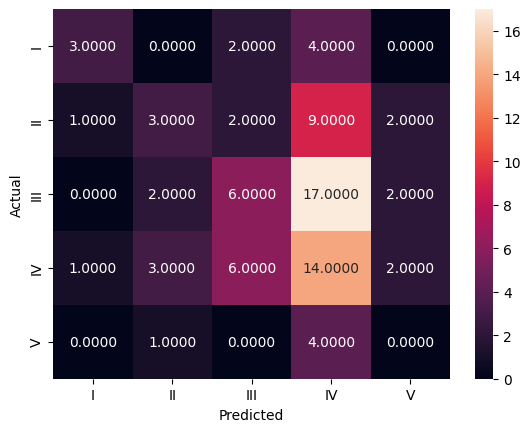



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data ModelName  Train Accuracy  Test Accuracy  Precision    Recall       F1
0  Potential Acc: Glove-Basic-Accident       KNN             1.0       0.309524    0.34256  0.309524  0.29944
Model :  Ridge



Classification - Heatmap




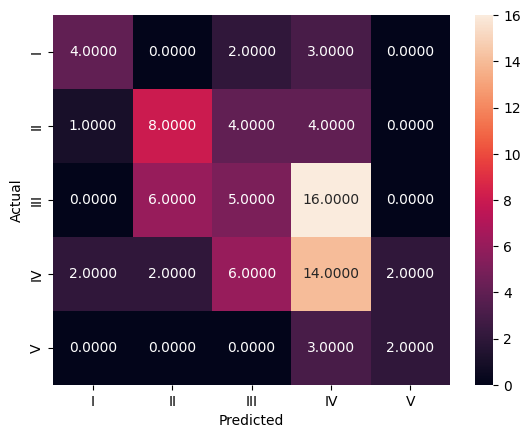



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Glove-Basic-Accident       KNN        1.000000       0.309524   0.342560  0.309524  0.299440
1  Potential Acc: Glove-Basic-Accident     Ridge        0.769461       0.392857   0.395048  0.392857  0.382516
Model :  LogisticRegression



Classification - Heatmap




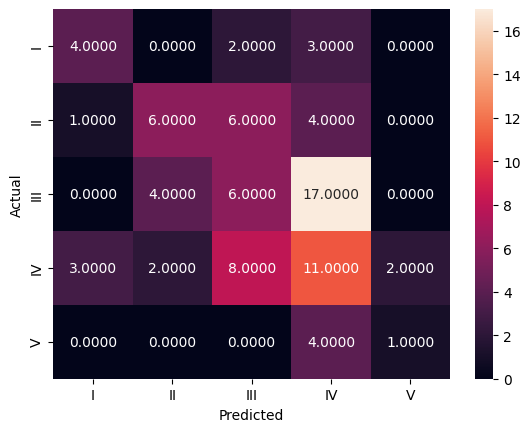



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Glove-Basic-Accident                 KNN        1.000000       0.309524   0.342560  0.309524  0.299440
1  Potential Acc: Glove-Basic-Accident               Ridge        0.769461       0.392857   0.395048  0.392857  0.382516
2  Potential Acc: Glove-Basic-Accident  LogisticRegression        0.685629       0.333333   0.349567  0.333333  0.332524
Model :  GradientBoost



Classification - Heatmap




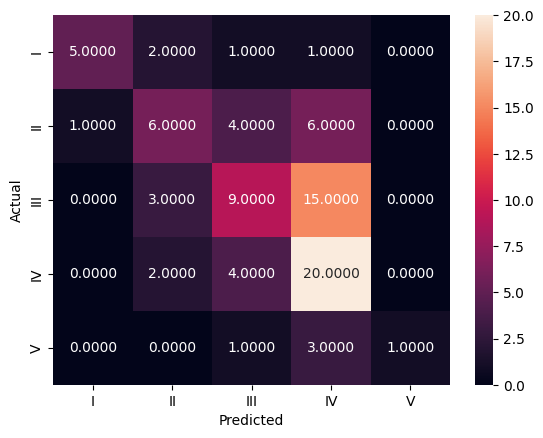



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Glove-Basic-Accident                 KNN        1.000000       0.309524   0.342560  0.309524  0.299440
1  Potential Acc: Glove-Basic-Accident               Ridge        0.769461       0.392857   0.395048  0.392857  0.382516
2  Potential Acc: Glove-Basic-Accident  LogisticRegression        0.685629       0.333333   0.349567  0.333333  0.332524
3  Potential Acc: Glove-Basic-Accident       GradientBoost        1.000000       0.488095   0.532038  0.488095  0.472378
Model :  SVM



Classification - Heatmap




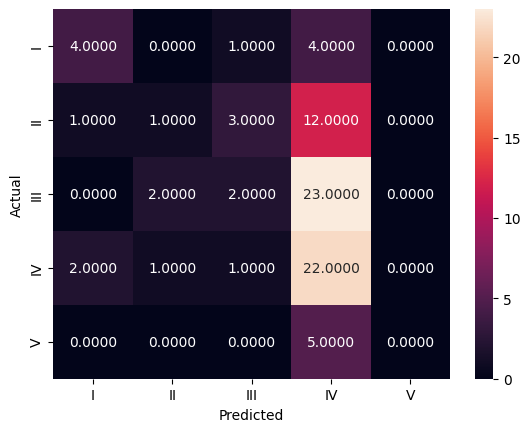



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Glove-Basic-Accident                 KNN        1.000000       0.309524   0.342560  0.309524  0.299440
1  Potential Acc: Glove-Basic-Accident               Ridge        0.769461       0.392857   0.395048  0.392857  0.382516
2  Potential Acc: Glove-Basic-Accident  LogisticRegression        0.685629       0.333333   0.349567  0.333333  0.332524
3  Potential Acc: Glove-Basic-Accident       GradientBoost        1.000000       0.488095   0.532038  0.488095  0.472378
4  Potential Acc: Glove-Basic-Accident                 SVM        0.491018       0.345238   0.306831  0.345238  0.258694
Model :  Bagging



Classification - Heatmap




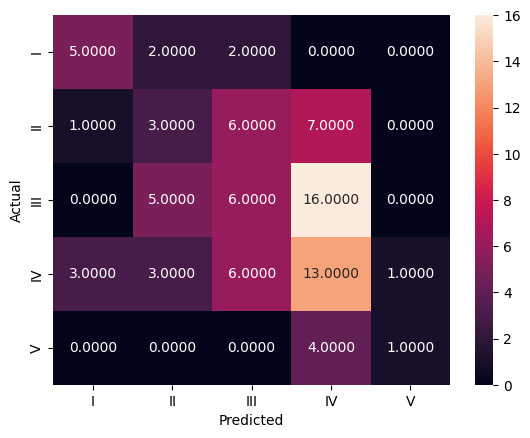



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Glove-Basic-Accident                 KNN        1.000000       0.309524   0.342560  0.309524  0.299440
1  Potential Acc: Glove-Basic-Accident               Ridge        0.769461       0.392857   0.395048  0.392857  0.382516
2  Potential Acc: Glove-Basic-Accident  LogisticRegression        0.685629       0.333333   0.349567  0.333333  0.332524
3  Potential Acc: Glove-Basic-Accident       GradientBoost        1.000000       0.488095   0.532038  0.488095  0.472378
4  Potential Acc: Glove-Basic-Accident                 SVM        0.491018       0.345238   0.306831  0.345238  0.258694
5  Potential Acc: Glove-Basic-Accident             Bagging        0.982036       0.333333   0.333013  0.333333  0.321007
Model :  RandomForest



Classification - Heatm

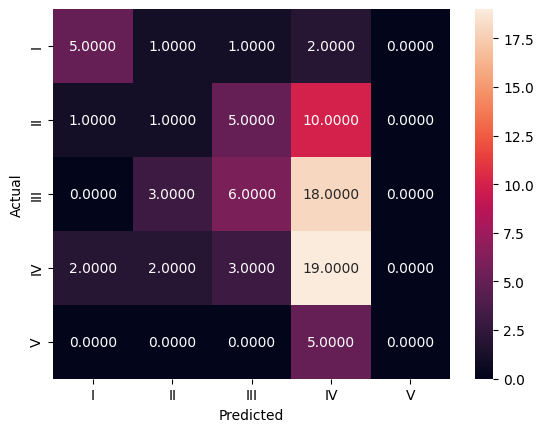



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Glove-Basic-Accident                 KNN        1.000000       0.309524   0.342560  0.309524  0.299440
1  Potential Acc: Glove-Basic-Accident               Ridge        0.769461       0.392857   0.395048  0.392857  0.382516
2  Potential Acc: Glove-Basic-Accident  LogisticRegression        0.685629       0.333333   0.349567  0.333333  0.332524
3  Potential Acc: Glove-Basic-Accident       GradientBoost        1.000000       0.488095   0.532038  0.488095  0.472378
4  Potential Acc: Glove-Basic-Accident                 SVM        0.491018       0.345238   0.306831  0.345238  0.258694
5  Potential Acc: Glove-Basic-Accident             Bagging        0.982036       0.333333   0.333013  0.333333  0.321007
6  Potential Acc: Glove-Basic-Accident        R

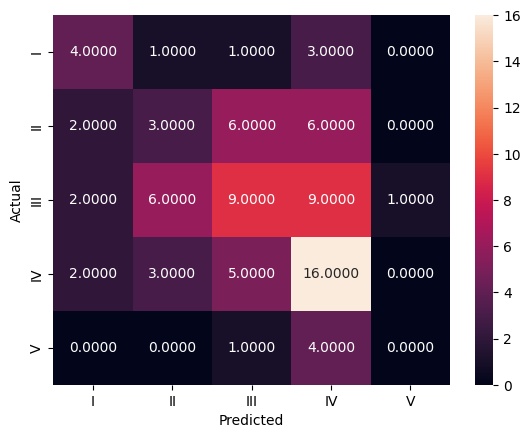



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Glove-Basic-Accident                 KNN        1.000000       0.309524   0.342560  0.309524  0.299440
1  Potential Acc: Glove-Basic-Accident               Ridge        0.769461       0.392857   0.395048  0.392857  0.382516
2  Potential Acc: Glove-Basic-Accident  LogisticRegression        0.685629       0.333333   0.349567  0.333333  0.332524
3  Potential Acc: Glove-Basic-Accident       GradientBoost        1.000000       0.488095   0.532038  0.488095  0.472378
4  Potential Acc: Glove-Basic-Accident                 SVM        0.491018       0.345238   0.306831  0.345238  0.258694
5  Potential Acc: Glove-Basic-Accident             Bagging        0.982036       0.333333   0.333013  0.333333  0.321007
6  Potential Acc: Glove-Basic-Accident        R

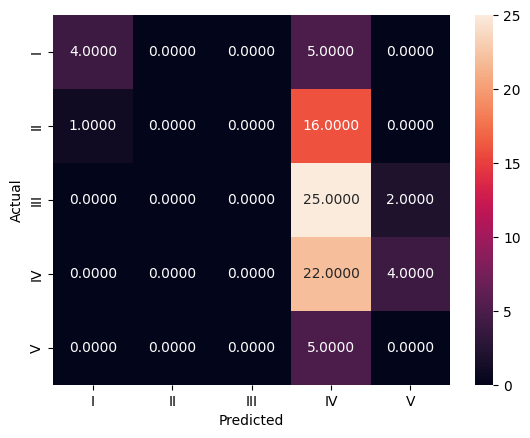



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Glove-Basic-Accident                 KNN        1.000000       0.309524   0.342560  0.309524  0.299440
1  Potential Acc: Glove-Basic-Accident               Ridge        0.769461       0.392857   0.395048  0.392857  0.382516
2  Potential Acc: Glove-Basic-Accident  LogisticRegression        0.685629       0.333333   0.349567  0.333333  0.332524
3  Potential Acc: Glove-Basic-Accident       GradientBoost        1.000000       0.488095   0.532038  0.488095  0.472378
4  Potential Acc: Glove-Basic-Accident                 SVM        0.491018       0.345238   0.306831  0.345238  0.258694
5  Potential Acc: Glove-Basic-Accident             Bagging        0.982036       0.333333   0.333013  0.333333  0.321007
6  Potential Acc: Glove-Basic-Accident        R

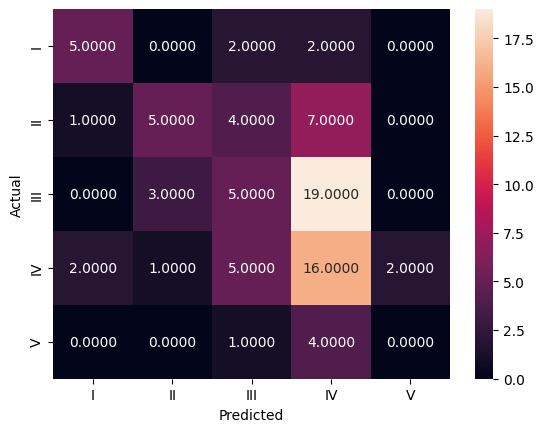



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: Glove-Basic-Accident                 KNN        1.000000       0.309524   0.342560  0.309524  0.299440
1  Potential Acc: Glove-Basic-Accident               Ridge        0.769461       0.392857   0.395048  0.392857  0.382516
2  Potential Acc: Glove-Basic-Accident  LogisticRegression        0.685629       0.333333   0.349567  0.333333  0.332524
3  Potential Acc: Glove-Basic-Accident       GradientBoost        1.000000       0.488095   0.532038  0.488095  0.472378
4  Potential Acc: Glove-Basic-Accident                 SVM        0.491018       0.345238   0.306831  0.345238  0.258694
5  Potential Acc: Glove-Basic-Accident             Bagging        0.982036       0.333333   0.333013  0.333333  0.321007
6  Potential Acc: Glove-Basic-Accident        R

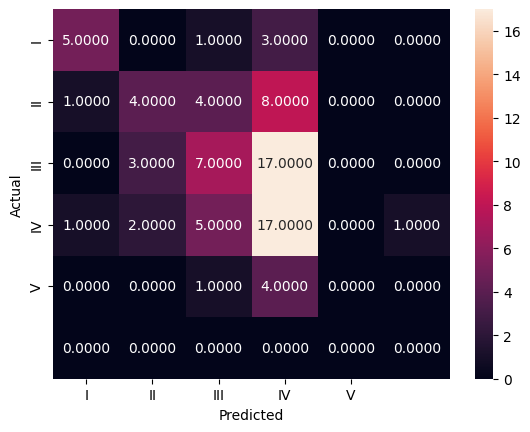



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                    Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0   Potential Acc: Glove-Basic-Accident                 KNN        1.000000       0.309524   0.342560  0.309524  0.299440
1   Potential Acc: Glove-Basic-Accident               Ridge        0.769461       0.392857   0.395048  0.392857  0.382516
2   Potential Acc: Glove-Basic-Accident  LogisticRegression        0.685629       0.333333   0.349567  0.333333  0.332524
3   Potential Acc: Glove-Basic-Accident       GradientBoost        1.000000       0.488095   0.532038  0.488095  0.472378
4   Potential Acc: Glove-Basic-Accident                 SVM        0.491018       0.345238   0.306831  0.345238  0.258694
5   Potential Acc: Glove-Basic-Accident             Bagging        0.982036       0.333333   0.333013  0.333333  0.321007
6   Potential Acc: Glove-Basic-Accident 

In [ ]:
combinedResult_Pot = pd.concat([combinedResult_Pot, runAllModelDefault(X_train=X_train_glove_p,Y_train=y_train_glove_p,X_test=X_test_glove_p,Y_test=y_test_glove_p,descriptionOfData="Potential Acc: Glove-Basic-Accident")],ignore_index=True,sort=False)

Model :  KNN



Classification - Heatmap




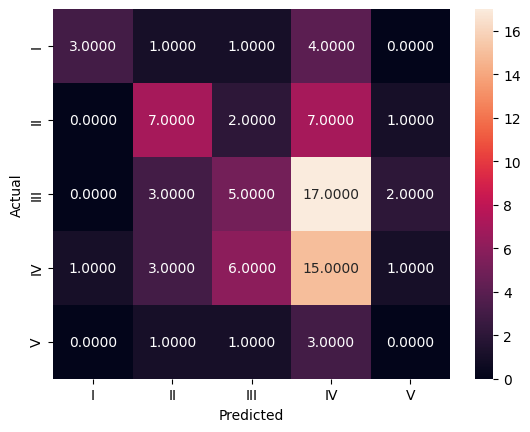



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: TFIDF-Basic-Accident       KNN             1.0       0.357143   0.382876  0.357143  0.343491
Model :  Ridge



Classification - Heatmap




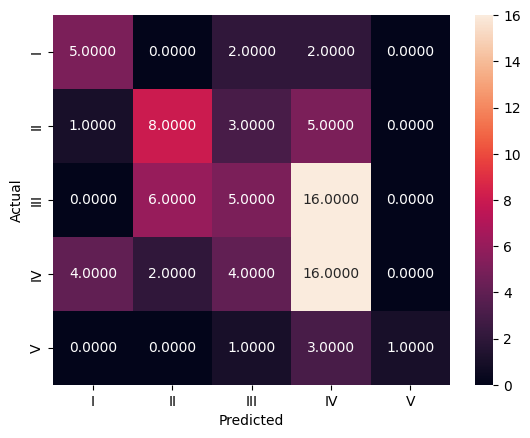



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: TFIDF-Basic-Accident       KNN             1.0       0.357143   0.382876  0.357143  0.343491
1  Potential Acc: TFIDF-Basic-Accident     Ridge             1.0       0.416667   0.439342  0.416667  0.396545
Model :  LogisticRegression



Classification - Heatmap




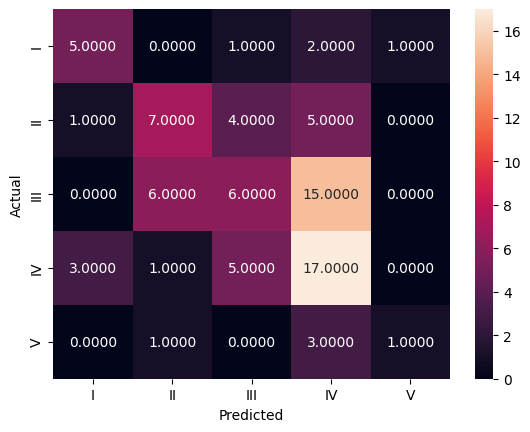



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: TFIDF-Basic-Accident                 KNN        1.000000       0.357143   0.382876  0.357143  0.343491
1  Potential Acc: TFIDF-Basic-Accident               Ridge        1.000000       0.416667   0.439342  0.416667  0.396545
2  Potential Acc: TFIDF-Basic-Accident  LogisticRegression        0.829341       0.428571   0.429549  0.428571  0.409535
Model :  GradientBoost



Classification - Heatmap




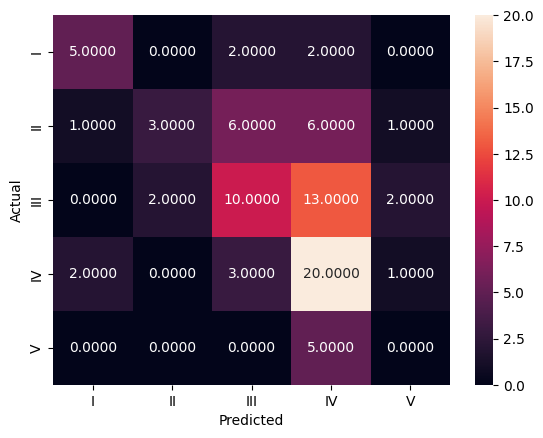



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: TFIDF-Basic-Accident                 KNN        1.000000       0.357143   0.382876  0.357143  0.343491
1  Potential Acc: TFIDF-Basic-Accident               Ridge        1.000000       0.416667   0.439342  0.416667  0.396545
2  Potential Acc: TFIDF-Basic-Accident  LogisticRegression        0.829341       0.428571   0.429549  0.428571  0.409535
3  Potential Acc: TFIDF-Basic-Accident       GradientBoost        1.000000       0.452381   0.476030  0.452381  0.424106
Model :  SVM



Classification - Heatmap




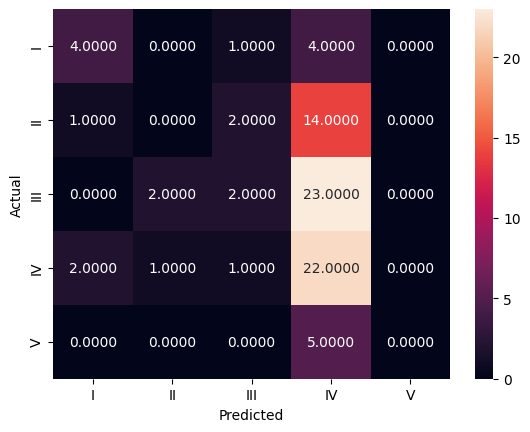



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: TFIDF-Basic-Accident                 KNN        1.000000       0.357143   0.382876  0.357143  0.343491
1  Potential Acc: TFIDF-Basic-Accident               Ridge        1.000000       0.416667   0.439342  0.416667  0.396545
2  Potential Acc: TFIDF-Basic-Accident  LogisticRegression        0.829341       0.428571   0.429549  0.428571  0.409535
3  Potential Acc: TFIDF-Basic-Accident       GradientBoost        1.000000       0.452381   0.476030  0.452381  0.424106
4  Potential Acc: TFIDF-Basic-Accident                 SVM        0.494012       0.333333   0.268507  0.333333  0.237416
Model :  Bagging



Classification - Heatmap




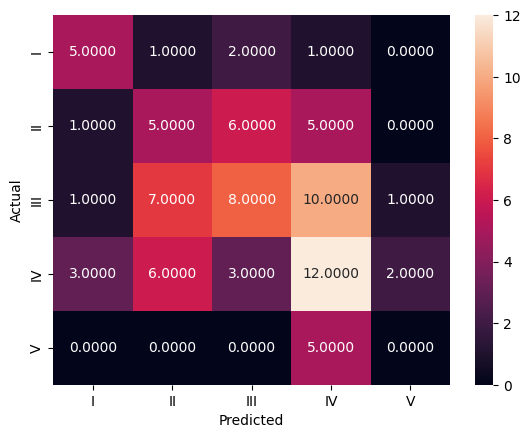



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: TFIDF-Basic-Accident                 KNN        1.000000       0.357143   0.382876  0.357143  0.343491
1  Potential Acc: TFIDF-Basic-Accident               Ridge        1.000000       0.416667   0.439342  0.416667  0.396545
2  Potential Acc: TFIDF-Basic-Accident  LogisticRegression        0.829341       0.428571   0.429549  0.428571  0.409535
3  Potential Acc: TFIDF-Basic-Accident       GradientBoost        1.000000       0.452381   0.476030  0.452381  0.424106
4  Potential Acc: TFIDF-Basic-Accident                 SVM        0.494012       0.333333   0.268507  0.333333  0.237416
5  Potential Acc: TFIDF-Basic-Accident             Bagging        0.985030       0.357143   0.354722  0.357143  0.350317
Model :  RandomForest



Classification - Heatm

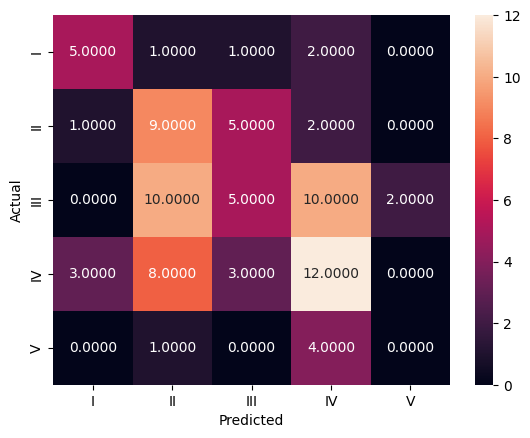



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: TFIDF-Basic-Accident                 KNN        1.000000       0.357143   0.382876  0.357143  0.343491
1  Potential Acc: TFIDF-Basic-Accident               Ridge        1.000000       0.416667   0.439342  0.416667  0.396545
2  Potential Acc: TFIDF-Basic-Accident  LogisticRegression        0.829341       0.428571   0.429549  0.428571  0.409535
3  Potential Acc: TFIDF-Basic-Accident       GradientBoost        1.000000       0.452381   0.476030  0.452381  0.424106
4  Potential Acc: TFIDF-Basic-Accident                 SVM        0.494012       0.333333   0.268507  0.333333  0.237416
5  Potential Acc: TFIDF-Basic-Accident             Bagging        0.985030       0.357143   0.354722  0.357143  0.350317
6  Potential Acc: TFIDF-Basic-Accident        R

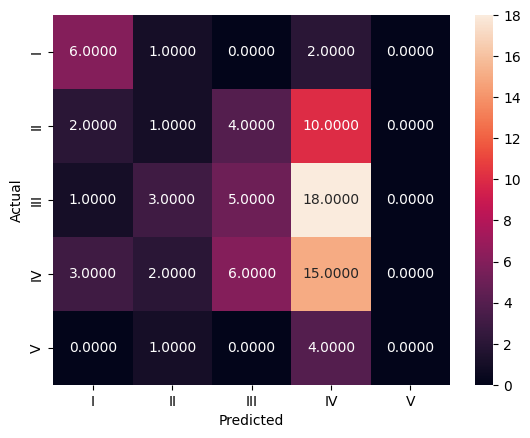



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: TFIDF-Basic-Accident                 KNN        1.000000       0.357143   0.382876  0.357143  0.343491
1  Potential Acc: TFIDF-Basic-Accident               Ridge        1.000000       0.416667   0.439342  0.416667  0.396545
2  Potential Acc: TFIDF-Basic-Accident  LogisticRegression        0.829341       0.428571   0.429549  0.428571  0.409535
3  Potential Acc: TFIDF-Basic-Accident       GradientBoost        1.000000       0.452381   0.476030  0.452381  0.424106
4  Potential Acc: TFIDF-Basic-Accident                 SVM        0.494012       0.333333   0.268507  0.333333  0.237416
5  Potential Acc: TFIDF-Basic-Accident             Bagging        0.985030       0.357143   0.354722  0.357143  0.350317
6  Potential Acc: TFIDF-Basic-Accident        R

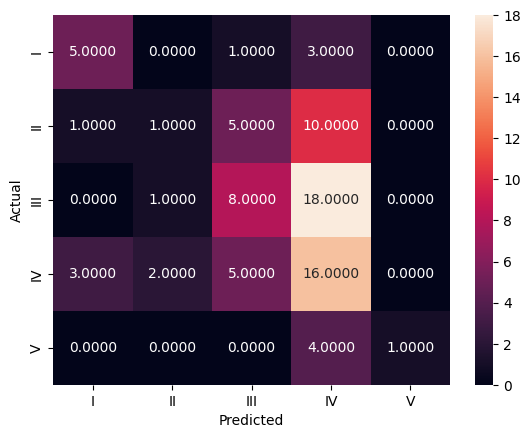



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: TFIDF-Basic-Accident                 KNN        1.000000       0.357143   0.382876  0.357143  0.343491
1  Potential Acc: TFIDF-Basic-Accident               Ridge        1.000000       0.416667   0.439342  0.416667  0.396545
2  Potential Acc: TFIDF-Basic-Accident  LogisticRegression        0.829341       0.428571   0.429549  0.428571  0.409535
3  Potential Acc: TFIDF-Basic-Accident       GradientBoost        1.000000       0.452381   0.476030  0.452381  0.424106
4  Potential Acc: TFIDF-Basic-Accident                 SVM        0.494012       0.333333   0.268507  0.333333  0.237416
5  Potential Acc: TFIDF-Basic-Accident             Bagging        0.985030       0.357143   0.354722  0.357143  0.350317
6  Potential Acc: TFIDF-Basic-Accident        R

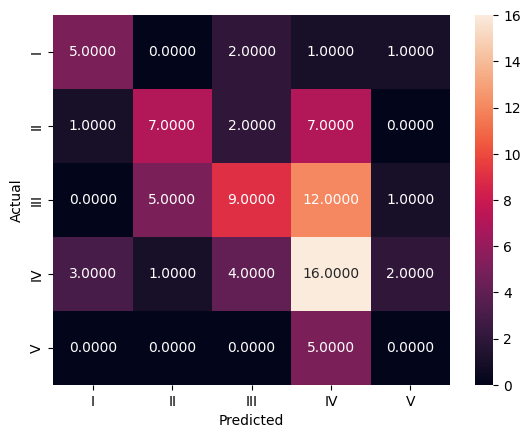



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                   Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Potential Acc: TFIDF-Basic-Accident                 KNN        1.000000       0.357143   0.382876  0.357143  0.343491
1  Potential Acc: TFIDF-Basic-Accident               Ridge        1.000000       0.416667   0.439342  0.416667  0.396545
2  Potential Acc: TFIDF-Basic-Accident  LogisticRegression        0.829341       0.428571   0.429549  0.428571  0.409535
3  Potential Acc: TFIDF-Basic-Accident       GradientBoost        1.000000       0.452381   0.476030  0.452381  0.424106
4  Potential Acc: TFIDF-Basic-Accident                 SVM        0.494012       0.333333   0.268507  0.333333  0.237416
5  Potential Acc: TFIDF-Basic-Accident             Bagging        0.985030       0.357143   0.354722  0.357143  0.350317
6  Potential Acc: TFIDF-Basic-Accident        R

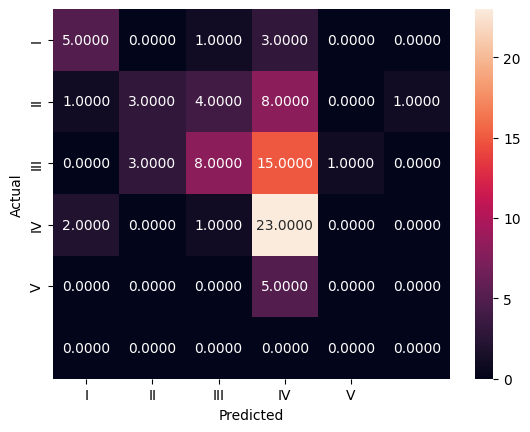



Classification - Report


<function classification_report at 0x7ce4fb98eef0>
Models Performance Summary
                    Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0   Potential Acc: TFIDF-Basic-Accident                 KNN        1.000000       0.357143   0.382876  0.357143  0.343491
1   Potential Acc: TFIDF-Basic-Accident               Ridge        1.000000       0.416667   0.439342  0.416667  0.396545
2   Potential Acc: TFIDF-Basic-Accident  LogisticRegression        0.829341       0.428571   0.429549  0.428571  0.409535
3   Potential Acc: TFIDF-Basic-Accident       GradientBoost        1.000000       0.452381   0.476030  0.452381  0.424106
4   Potential Acc: TFIDF-Basic-Accident                 SVM        0.494012       0.333333   0.268507  0.333333  0.237416
5   Potential Acc: TFIDF-Basic-Accident             Bagging        0.985030       0.357143   0.354722  0.357143  0.350317
6   Potential Acc: TFIDF-Basic-Accident 

In [ ]:
combinedResult_Pot = pd.concat([combinedResult_Pot, runAllModelDefault(X_train=X_train_tfidf_p,Y_train=y_train_tfidf_p,X_test=X_test_tfidf_p,Y_test=y_test_tfidf_p,descriptionOfData="Potential Acc: TFIDF-Basic-Accident")],ignore_index=True,sort=False)

In [ ]:
print("Combined results based on Potential accident level as target:")
combinedResult_Pot

Combined results based on Potential accident level as target:


Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0   Potential Acc: Word2Vec-Basic-Accident                 KNN        1.000000       0.333333   0.351785  0.333333  0.323133
1   Potential Acc: Word2Vec-Basic-Accident               Ridge        0.580838       0.345238   0.318958  0.345238  0.314690
2   Potential Acc: Word2Vec-Basic-Accident  LogisticRegression        0.574850       0.345238   0.331143  0.345238  0.319466
3   Potential Acc: Word2Vec-Basic-Accident       GradientBoost        1.000000       0.428571   0.454034  0.428571  0.420352
4   Potential Acc: Word2Vec-Basic-Accident                 SVM        0.479042       0.333333   0.270002  0.333333  0.238974
5   Potential Acc: Word2Vec-Basic-Accident             Bagging        0.985030       0.357143   0.355263  0.357143  0.350662
6   Potential Acc: Word2Vec-Basic-Accident        RandomForest        1.000000       0.380952   0.395105  0.380952  0.354048
7   Potential Acc: Word2Vec-Basic-Accident        DecisionTree        0.670659       0.392857   0.425240  0.392857  0.391922
8   Potential Acc: Word2Vec-Basic-Accident            AdaBoost        0.395210       0.333333   0.252778  0.333333  0.260916
9   Potential Acc: Word2Vec-Basic-Accident             XGBoost        1.000000       0.369048   0.399282  0.369048  0.355182
10  Potential Acc: Word2Vec-Basic-Accident      Gradient Boost        0.967066       0.416667   0.446897  0.416667  0.391602
11     Potential Acc: Glove-Basic-Accident                 KNN        1.000000       0.309524   0.342560  0.309524  0.299440
12     Potential Acc: Glove-Basic-Accident               Ridge        0.769461       0.392857   0.395048  0.392857  0.382516
13     Potential Acc: Glove-Basic-Accident  LogisticRegression        0.685629       0.333333   0.349567  0.333333  0.332524
14     Potential Acc: Glove-Basic-Accident       GradientBoost        1.000000       0.488095   0.532038  0.488095  0.472378
15     Potential Acc: Glove-Basic-Accident                 SVM        0.491018       0.345238   0.306831  0.345238  0.258694
16     Potential Acc: Glove-Basic-Accident             Bagging        0.982036       0.333333   0.333013  0.333333  0.321007
17     Potential Acc: Glove-Basic-Accident        RandomForest        1.000000       0.369048   0.333354  0.369048  0.318751
18     Potential Acc: Glove-Basic-Accident        DecisionTree        0.670659       0.380952   0.351380  0.380952  0.358427
19     Potential Acc: Glove-Basic-Accident            AdaBoost        0.359281       0.309524   0.178995  0.309524  0.198791
20     Potential Acc: Glove-Basic-Accident             XGBoost        1.000000       0.369048   0.377111  0.369048  0.347764
21     Potential Acc: Glove-Basic-Accident      Gradient Boost        0.970060       0.392857   0.398864  0.392857  0.369553
22     Potential Acc: TFIDF-Basic-Accident                 KNN        1.000000       0.357143   0.382876  0.357143  0.343491
23     Potential Acc: TFIDF-Basic-Accident               Ridge        1.000000       0.416667   0.439342  0.416667  0.396545
24     Potential Acc: TFIDF-Basic-Accident  LogisticRegression        0.829341       0.428571   0.429549  0.428571  0.409535
25     Potential Acc: TFIDF-Basic-Accident       GradientBoost        1.000000       0.452381   0.476030  0.452381  0.424106
26     Potential Acc: TFIDF-Basic-Accident                 SVM        0.494012       0.333333   0.268507  0.333333  0.237416
27     Potential Acc: TFIDF-Basic-Accident             Bagging        0.985030       0.357143   0.354722  0.357143  0.350317
28     Potential Acc: TFIDF-Basic-Accident        RandomForest        0.865269       0.369048   0.360937  0.369048  0.349767
29     Potential Acc: TFIDF-Basic-Accident        DecisionTree        0.562874       0.321429   0.280764  0.321429  0.277755
30     Potential Acc: TFIDF-Basic-Accident            AdaBoost        0.440120       0.369048   0.402087  0.369048  0.339074
31     Potential Acc: T

Potential accident level as target is not producing good results - test accuracy as well as F1 scores are very less for all models.
<br>
This shows that Accident level is better Target class than potential accident level

###### Hyper Parameter Tuning

In [ ]:
def runTunedModel(model,X_train,Y_train,X_test,Y_test,descriptionOfData,nameOfTheModel):
    print("="*100)
    print("Model : ", nameOfTheModel)
    print("="*100)
    print("\n\n")
    model.fit(X_train,Y_train)
    y_predict = model.predict(X_test)
    trainAccuracyScore = model.score(X_train,Y_train)
    testAccuracyScore = model.score(X_test,Y_test)
    precisionScore = precision_score(Y_test,y_predict,average='weighted')
    recallScore = recall_score(Y_test,y_predict,average='weighted')
    f1Score = f1_score(Y_test,y_predict,average='weighted')
    print("=="*20)
    print('Classification - Heatmap')
    print("=="*20)
    print("\n")
    classificationMatrix = confusion_matrix(Y_test,y_predict)
    sns.heatmap(classificationMatrix,annot=True,fmt=".4f",xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    print("\n")
    print("=="*20)
    classificationReport = classification_report(Y_test,y_predict)
    print('Classification - Report')
    print("=="*20)
    print("\n")
    print(classification_report)

    nameofModel=[]
    trainAccScore=[]
    testAccScore=[]
    precissionSc=[]
    recallSc=[]
    f1Sc=[]

    nameofModel.append(nameOfTheModel)
    trainAccScore.append(trainAccuracyScore)
    testAccScore.append(testAccuracyScore)
    precissionSc.append(precisionScore)
    recallSc.append(recallScore)
    f1Sc.append(f1Score)

    resultDF = pd.DataFrame({'Description Of Data':descriptionOfData,
                            'ModelName':nameofModel,
                            'Train Accuracy':trainAccScore,
                            'Test Accuracy':testAccScore,
                            'Precision':precissionSc,
                            'Recall':recallSc,
                            'F1':f1Sc})
    print("=="*20)
    print("Models Performance Summary")
    print("=="*20)
    print(resultDF)
    return resultDF

In [ ]:
combinedResult_tune = pd.DataFrame(columns=['Description Of Data','ModelName','Train Accuracy','Test Accuracy','Precision','Recall','F1'])

Model :  LogisticRegression RandomizedSearchCV



Classification - Heatmap




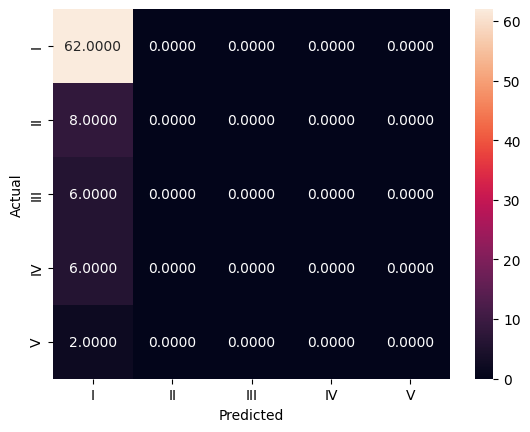



Classification - Report


<function classification_report at 0x7be80f04ef80>
Models Performance Summary
                              Description Of Data  \
0  LR Hyper param tuning: Word2Vec-Basic-Accident   

                               ModelName  Train Accuracy  Test Accuracy  \
0  LogisticRegression RandomizedSearchCV        0.739521       0.738095   

   Precision    Recall        F1  
0   0.544785  0.738095  0.626875  


In [ ]:
# LOGISTIC REGRESSION-
# SVM Results for Word2Vec
#LR Hyper Param

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Optimization algorithm
    'max_iter': [100, 200, 300]  # Number of iterations
}

# Initialize RandomizedSearchCV
random_search_lr = RandomizedSearchCV(
    LogisticRegression(),
    param_grid,
    cv=4,
    n_iter=10,  # Number of parameter settings sampled
    random_state=7
)

# Collect results into a list
results = []
results.append(runTunedModel(model=random_search_lr, X_train=X_train_w2v, Y_train=y_train_w2v, X_test=X_test_w2v, Y_test=y_test_w2v, descriptionOfData="LR Hyper param tuning: Word2Vec-Basic-Accident", nameOfTheModel="LogisticRegression RandomizedSearchCV"))

Model :  LogisticRegression RandomizedSearchCV



Classification - Heatmap




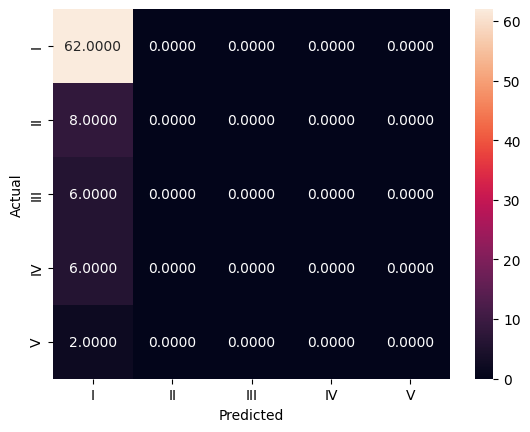



Classification - Report


<function classification_report at 0x7be80f04ef80>
Models Performance Summary
                           Description Of Data  \
0  LR Hyper param tuning: TfIdf-Basic-Accident   

                               ModelName  Train Accuracy  Test Accuracy  \
0  LogisticRegression RandomizedSearchCV        0.739521       0.738095   

   Precision    Recall        F1  
0   0.544785  0.738095  0.626875  


In [ ]:
# Logistic Regression Results for TfIdf
# Append the second result
results.append(runTunedModel(model=random_search_lr, X_train=X_train_tfidf, Y_train=y_train_tfidf, X_test=X_test_tfidf, Y_test=y_test_tfidf, descriptionOfData="LR Hyper param tuning: TfIdf-Basic-Accident", nameOfTheModel="LogisticRegression RandomizedSearchCV"))


In [ ]:
# Concatenate and Display Results
# Concatenate results into a DataFrame
combinedResult_tune = pd.concat(results, ignore_index=True)

# Display the final DataFrame
print(combinedResult_tune)


                              Description Of Data  \
0  LR Hyper param tuning: Word2Vec-Basic-Accident   
1     LR Hyper param tuning: TfIdf-Basic-Accident   

                               ModelName  Train Accuracy  Test Accuracy  \
0  LogisticRegression RandomizedSearchCV        0.739521       0.738095   
1  LogisticRegression RandomizedSearchCV        0.739521       0.738095   

   Precision    Recall        F1  
0   0.544785  0.738095  0.626875  
1   0.544785  0.738095  0.626875  


Model :  SVM GridSearchCV



Fitting 4 folds for each of 100 candidates, totalling 400 fits
Classification - Heatmap




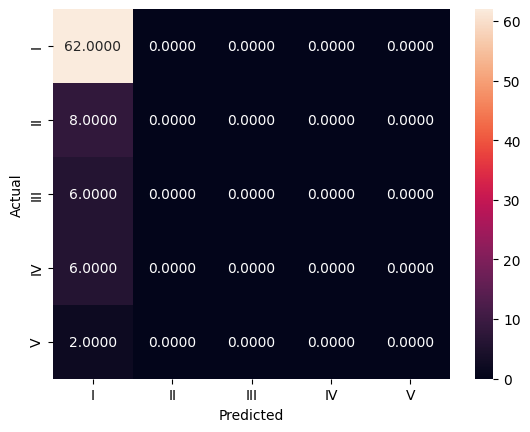



Classification - Report


<function classification_report at 0x7be80f04ef80>
Models Performance Summary
                               Description Of Data         ModelName  \
0  SVM Hyper param tuning: Word2Vec-Basic-Accident  SVM GridSearchCV   

   Train Accuracy  Test Accuracy  Precision    Recall        F1  
0        0.739521       0.738095   0.544785  0.738095  0.626875  


In [ ]:
# SVM-
# Define the parameter grid for SVM
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}

# Initialize GridSearchCV
grid = GridSearchCV(SVC(), param_grid, cv=4, verbose=True)

# Collect results into a list
results = []
results.append(runTunedModel(model=grid, X_train=X_train_w2v, Y_train=y_train_w2v, X_test=X_test_w2v, Y_test=y_test_w2v, descriptionOfData="SVM Hyper param tuning: Word2Vec-Basic-Accident", nameOfTheModel="SVM GridSearchCV"))

Model :  SVM GridSearchCV



Fitting 4 folds for each of 100 candidates, totalling 400 fits
Classification - Heatmap




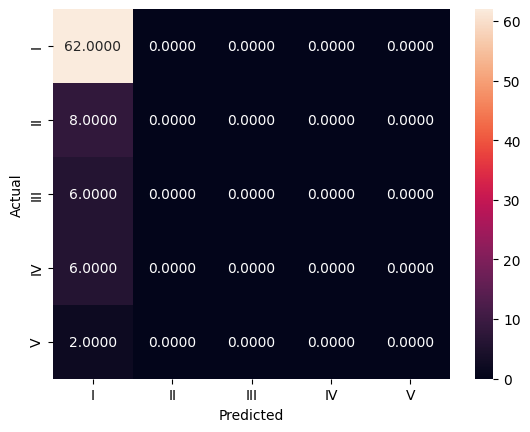



Classification - Report


<function classification_report at 0x7be80f04ef80>
Models Performance Summary
                            Description Of Data         ModelName  \
0  SVM Hyper param tuning: TfIdf-Basic-Accident  SVM GridSearchCV   

   Train Accuracy  Test Accuracy  Precision    Recall        F1  
0        0.739521       0.738095   0.544785  0.738095  0.626875  


In [ ]:
# SVM Results for TfIdf
results.append(runTunedModel(model=grid, X_train=X_train_tfidf, Y_train=y_train_tfidf, X_test=X_test_tfidf, Y_test=y_test_tfidf, descriptionOfData="SVM Hyper param tuning: TfIdf-Basic-Accident", nameOfTheModel="SVM GridSearchCV"))

In [ ]:
# Concatenate and Display Results
combinedResult_tune = pd.concat(results, ignore_index=True)

# Set display width for better readability
pd.set_option('display.width', 1000)
print(combinedResult_tune)

                               Description Of Data         ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  SVM Hyper param tuning: Word2Vec-Basic-Accident  SVM GridSearchCV        0.739521       0.738095   0.544785  0.738095  0.626875
1     SVM Hyper param tuning: TfIdf-Basic-Accident  SVM GridSearchCV        0.739521       0.738095   0.544785  0.738095  0.626875


Model :  Ridge GridSearchCV



Fitting 4 folds for each of 25 candidates, totalling 100 fits
Classification - Heatmap




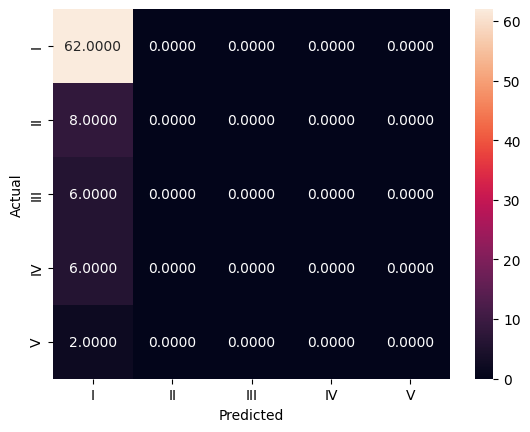



Classification - Report


<function classification_report at 0x7be80f04ef80>
Models Performance Summary
                                 Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Ridge Hyper param tuning: Word2Vec-Basic-Accident  Ridge GridSearchCV        0.739521       0.738095   0.544785  0.738095  0.626875


In [ ]:
# Ridge Classifier Results for Word2Vec-
from sklearn.linear_model import RidgeClassifier
# Define the parameter grid for Ridge Classifier
param_grid = {'alpha': [0.1, 1, 10, 100, 1000],  # Regularization strength
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']}

# Initialize GridSearchCV
grid = GridSearchCV(RidgeClassifier(), param_grid, cv=4, verbose=True)

# Collect results into a list
results = []
results.append(runTunedModel(model=grid, X_train=X_train_w2v, Y_train=y_train_w2v, X_test=X_test_w2v, Y_test=y_test_w2v, descriptionOfData="Ridge Hyper param tuning: Word2Vec-Basic-Accident", nameOfTheModel="Ridge GridSearchCV"))

Model :  Ridge GridSearchCV



Fitting 4 folds for each of 25 candidates, totalling 100 fits
Classification - Heatmap




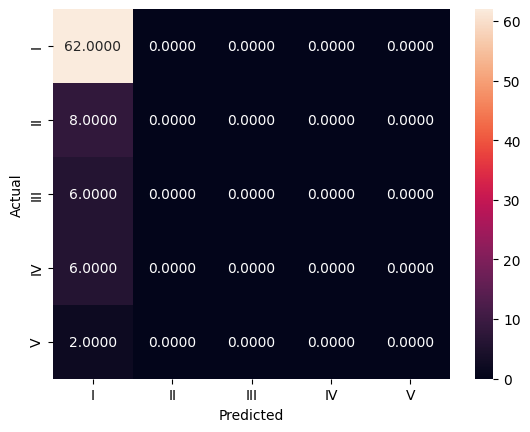



Classification - Report


<function classification_report at 0x7be80f04ef80>
Models Performance Summary
                              Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Ridge Hyper param tuning: TfIdf-Basic-Accident  Ridge GridSearchCV        0.742515       0.738095   0.544785  0.738095  0.626875


In [ ]:
#  Ridge Classifier Results for TfIdf
# Append the second result

results.append(runTunedModel(model=grid, X_train=X_train_tfidf, Y_train=y_train_tfidf, X_test=X_test_tfidf, Y_test=y_test_tfidf, descriptionOfData="Ridge Hyper param tuning: TfIdf-Basic-Accident", nameOfTheModel="Ridge GridSearchCV"))

In [ ]:
# Concatenate, Display, and Save Results

# Concatenate results into a DataFrame
combinedResult_tune = pd.concat(results, ignore_index=True)

# Set display width for better readability
pd.set_option('display.width', 1000)
print(combinedResult_tune)

# Save the DataFrame to a CSV file
combinedResult_tune.to_csv('Model Performance Report tuned.csv', index=False)

                                 Description Of Data           ModelName  Train Accuracy  Test Accuracy  Precision    Recall        F1
0  Ridge Hyper param tuning: Word2Vec-Basic-Accident  Ridge GridSearchCV        0.739521       0.738095   0.544785  0.738095  0.626875
1     Ridge Hyper param tuning: TfIdf-Basic-Accident  Ridge GridSearchCV        0.742515       0.738095   0.544785  0.738095  0.626875


## Best Model
 After performing hyper parameter tuning, we conclude that SVC on word2vec/TF IDF and Ridge classifier on TF IDF Embedding are the best models with ~74% accuracy on train and test data and  with F1 score 0.62

# Designing ANN


In [ ]:
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# define the model
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile the keras model
#opt = optimizers.Adam(lr=1e-3)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

# fit the keras model on the dataset
training_history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test), callbacks=[rlrp])

In [ ]:
# fix random seed for reproducibility
reset_random_seeds()
#param = 1e-9
param = 1e-4

# define the model
model = Sequential()

model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm()))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm())) # Multilabel

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train, y_train_dummy, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_train, y_train_dummy, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=[rlrp, metrics])

In [115]:
X_train=X_train_w2v,Y_train=y_train_w2v,X_test=X_test_w2v,Y_test=y_test_w2v,descriptionOfData="Word2Vec-Basic-Accident")]
X_train=X_train_tfidf,Y_train=y_train_tfidf,X_test=X_test_tfidf,Y_test=y_test_tfidf,descriptionOfData="TfIdf-Basic-Accident")]
X_train=X_train_w2v_up,Y_train=y_train_w2v_up,X_test=X_test_w2v_pca,Y_test=y_test_w2v,descriptionOfData="Word2Vec-PCA&Upsampled-Accident")]
X_train=X_train_w2v_smote,Y_train=y_train_w2v_smote,X_test=X_test_w2v_pca,Y_test=y_test_w2v,descriptionOfData="Word2Vec-PCA&SMOTE-Accident")]
X_train=X_train_tfidf_up,Y_train=y_train_tfidf_up,X_test=X_test_tfidf_pca,Y_test=y_test_tfidf,descriptionOfData="TFIDF-PCA&Upsampled-Accident")]
X_train=X_train_tfidf_smote,Y_train=y_train_tfidf_smote,X_test=X_test_tfidf_pca,Y_test=y_test_tfidf,descriptionOfData="TFIDF-PCA&SMOTE-Accident")]

SyntaxError: unmatched ')' (<ipython-input-115-ded69e6ce93e>, line 1)

In [116]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def train_model(X_train, y_train, X_test, y_test, descriptionOfData, seed=7):
    # Set random seeds for reproducibility
    np.random.seed(seed)
    tf.random.set_seed(seed)

    # Define the model
    model = Sequential()
    model.add(Dense(50, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='linear'))

    # Compile the model
    opt = SGD(learning_rate=0.001, momentum=0.9)  # Updated to use learning_rate
    model.compile(loss='mse', optimizer=opt, metrics=['mae'])  # Changed to 'mae' (Mean Absolute Error) for regression

    # Define callbacks
    early_stopping = EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

    # Fit the model
    training_history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=8,
        verbose=1,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, reduce_lr]
    )

    # Print or log the description of the data
    print(f"Training completed for dataset: {descriptionOfData}")

    return model, training_history

# Example usage with different datasets
model_w2v, history_w2v = train_model(
    X_train=X_train_w2v, y_train=y_train_w2v,
    X_test=X_test_w2v, y_test=y_test_w2v,
    descriptionOfData="Word2Vec-Basic-Accident"
)

model_tfidf, history_tfidf = train_model(
    X_train=X_train_tfidf, y_train=y_train_tfidf,
    X_test=X_test_tfidf, y_test=y_test_tfidf,
    descriptionOfData="TfIdf-Basic-Accident"
)

model_w2v_up, history_w2v_up = train_model(
    X_train=X_train_w2v_up, y_train=y_train_w2v_up,
    X_test=X_test_w2v_pca, y_test=y_test_w2v,
    descriptionOfData="Word2Vec-PCA&Upsampled-Accident"
)

model_w2v_smote, history_w2v_smote = train_model(
    X_train=X_train_w2v_smote, y_train=y_train_w2v_smote,
    X_test=X_test_w2v_pca, y_test=y_test_w2v,
    descriptionOfData="Word2Vec-PCA&SMOTE-Accident"
)

model_tfidf_up, history_tfidf_up = train_model(
    X_train=X_train_tfidf_up, y_train=y_train_tfidf_up,
    X_test=X_test_tfidf_pca, y_test=y_test_tfidf,
    descriptionOfData="TFIDF-PCA&Upsampled-Accident"
)

model_tfidf_smote, history_tfidf_smote = train_model(
    X_train=X_train_tfidf_smote, y_train=y_train_tfidf_smote,
    X_test=X_test_tfidf_pca, y_test=y_test_tfidf,
    descriptionOfData="TFIDF-PCA&SMOTE-Accident"
)


Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 1.5145 - mae: 0.8661 - val_loss: 1.2436 - val_mae: 0.9330 - learning_rate: 0.0010
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2984 - mae: 0.8934 - val_loss: 1.0904 - val_mae: 0.7268 - learning_rate: 0.0010
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2299 - mae: 0.8435 - val_loss: 1.0812 - val_mae: 0.7107 - learning_rate: 0.0010
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2098 - mae: 0.8254 - val_loss: 1.0995 - val_mae: 0.7065 - learning_rate: 0.0010
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2028 - mae: 0.8198 - val_loss: 1.0874 - val_mae: 0.7297 - learning_rate: 0.0010
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1661 - mae: 0.8228 - val_loss: 1.0686 - val_mae: 0.7417 - learning_rate: 0.0010
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1543 - mae: 0.8232 - val_loss: 1.0756 - val_mae: 0.7173 - learning_rate: 0.0010
Epoch 8/100


KeyboardInterrupt: 

In [117]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

# Define RMSE as a custom metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def train_model(X_train, y_train, X_test, y_test, descriptionOfData, seed=7):
    # Set random seeds for reproducibility
    np.random.seed(seed)
    tf.random.set_seed(seed)

    # Define the model
    model = Sequential()
    model.add(Dense(50, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='linear'))

    # Compile the model with multiple metrics
    opt = SGD(learning_rate=0.001, momentum=0.9)  # Updated to use learning_rate
    model.compile(
        loss='mse',
        optimizer=opt,
        metrics=['mae', rmse]  # Added MAE and custom RMSE metric
    )

    # Define callbacks
    early_stopping = EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

    # Fit the model
    training_history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=8,
        verbose=1,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, reduce_lr]
    )

    # Print or log the description of the data
    print(f"Training completed for dataset: {descriptionOfData}")

    # Plot training & validation metrics
    plt.figure(figsize=(12, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(training_history.history['loss'], label='Train Loss')
    plt.plot(training_history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot metrics
    plt.subplot(1, 2, 2)
    plt.plot(training_history.history['mae'], label='Train MAE')
    plt.plot(training_history.history['val_mae'], label='Val MAE')
    plt.plot(training_history.history['rmse'], label='Train RMSE')
    plt.plot(training_history.history['val_rmse'], label='Val RMSE')
    plt.title('Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Metric Value')
    plt.legend()

    plt.suptitle(f"Training History: {descriptionOfData}")
    plt.show()

    return model, training_history

# Example usage with different datasets
model_w2v, history_w2v = train_model(
    X_train=X_train_w2v, y_train=y_train_w2v,
    X_test=X_test_w2v, y_test=y_test_w2v,
    descriptionOfData="Word2Vec-Basic-Accident"
)

model_tfidf, history_tfidf = train_model(
    X_train=X_train_tfidf, y_train=y_train_tfidf,
    X_test=X_test_tfidf, y_test=y_test_tfidf,
    descriptionOfData="TfIdf-Basic-Accident"
)

model_w2v_up, history_w2v_up = train_model(
    X_train=X_train_w2v_up, y_train=y_train_w2v_up,
    X_test=X_test_w2v_pca, y_test=y_test_w2v,
    descriptionOfData="Word2Vec-PCA&Upsampled-Accident"
)

model_w2v_smote, history_w2v_smote = train_model(
    X_train=X_train_w2v_smote, y_train=y_train_w2v_smote,
    X_test=X_test_w2v_pca, y_test=y_test_w2v,
    descriptionOfData="Word2Vec-PCA&SMOTE-Accident"
)

model_tfidf_up, history_tfidf_up = train_model(
    X_train=X_train_tfidf_up, y_train=y_train_tfidf_up,
    X_test=X_test_tfidf_pca, y_test=y_test_tfidf,
    descriptionOfData="TFIDF-PCA&Upsampled-Accident"
)

model_tfidf_smote, history_tfidf_smote = train_model(
    X_train=X_train_tfidf_smote, y_train=y_train_tfidf_smote,
    X_test=X_test_tfidf_pca, y_test=y_test_tfidf,
    descriptionOfData="TFIDF-PCA&SMOTE-Accident"
)


Epoch 1/100


TypeError: Input 'y' of 'Sub' Op has type int64 that does not match type float32 of argument 'x'.

In [118]:
''' Classification Metrics
Accuracy
Confusion Matrix (not a metric but fundamental to others)
Precision and Recall
F1-score
AU-ROC '''

''' Regrression Metrics
Mean Absolute Error (MAE)
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
R-squared (R2) '''


' Regrression Metrics\nMean Absolute Error (MAE)\nMean Squared Error (MSE)\nRoot Mean Squared Error (RMSE)\nR-squared (R2) '

In [119]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, r2_score
import math

def train_model(X_train, y_train, X_test, y_test, descriptionOfData, seed=7):
    # Set random seeds for reproducibility
    np.random.seed(seed)
    tf.random.set_seed(seed)

    # Define the model
    model = Sequential()
    model.add(Dense(50, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='linear'))

    # Compile the model
    opt = SGD(learning_rate=0.001, momentum=0.9)  # Updated to use learning_rate
    model.compile(loss='mse', optimizer=opt, metrics=['mae'])  # Changed to 'mae' (Mean Absolute Error) for regression

    # Define callbacks
    early_stopping = EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

    # Fit the model
    training_history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=8,
        verbose=1,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, reduce_lr]
    )

    # Evaluate the model
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print or log the description of the data and metrics
    print(f"Training completed for dataset: {descriptionOfData}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")

    return model, training_history

# Example usage with different datasets
model_w2v, history_w2v = train_model(
    X_train=X_train_w2v, y_train=y_train_w2v,
    X_test=X_test_w2v, y_test=y_test_w2v,
    descriptionOfData="Word2Vec-Basic-Accident"
)

model_tfidf, history_tfidf = train_model(
    X_train=X_train_tfidf, y_train=y_train_tfidf,
    X_test=X_test_tfidf, y_test=y_test_tfidf,
    descriptionOfData="TfIdf-Basic-Accident"
)

model_w2v_up, history_w2v_up = train_model(
    X_train=X_train_w2v_up, y_train=y_train_w2v_up,
    X_test=X_test_w2v_pca, y_test=y_test_w2v,
    descriptionOfData="Word2Vec-PCA&Upsampled-Accident"
)

model_w2v_smote, history_w2v_smote = train_model(
    X_train=X_train_w2v_smote, y_train=y_train_w2v_smote,
    X_test=X_test_w2v_pca, y_test=y_test_w2v,
    descriptionOfData="Word2Vec-PCA&SMOTE-Accident"
)

model_tfidf_up, history_tfidf_up = train_model(
    X_train=X_train_tfidf_up, y_train=y_train_tfidf_up,
    X_test=X_test_tfidf_pca, y_test=y_test_tfidf,
    descriptionOfData="TFIDF-PCA&Upsampled-Accident"
)

model_tfidf_smote, history_tfidf_smote = train_model(
    X_train=X_train_tfidf_smote, y_train=y_train_tfidf_smote,
    X_test=X_test_tfidf_pca, y_test=y_test_tfidf,
    descriptionOfData="TFIDF-PCA&SMOTE-Accident"
)


Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2.4353 - mae: 1.1426 - val_loss: 1.1212 - val_mae: 0.6965 - learning_rate: 0.0010
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2877 - mae: 0.8122 - val_loss: 1.0808 - val_mae: 0.7173 - learning_rate: 0.0010
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2461 - mae: 0.8465 - val_loss: 1.1352 - val_mae: 0.6958 - learning_rate: 0.0010
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2559 - mae: 0.7999 - val_loss: 1.1198 - val_mae: 0.7045 - learning_rate: 0.0010
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2380 - mae: 0.8098 - val_loss: 1.1146 - val_mae: 0.7061 - learning_rate: 0.0010
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2364 - mae: 0.7912 - val_loss: 1.0944 - val_mae: 0.7092 - learning_rate: 0.0010
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2136 - mae: 0.7957 - val_loss: 1.1107 - val_mae: 0.7121 - learning_rate: 0.0010
Epoch 8/100


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Training completed for dataset: Word2Vec-PCA&Upsampled-Accident
Mean Squared Error: 1.5459
Root Mean Squared Error: 1.2433
R-squared: -0.3992
Epoch 1/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.4741 - mae: 1.2846 - val_loss: 2.3682 - val_mae: 1.3875 - learning_rate: 0.0010
Epoch 2/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3657 - mae: 0.9409 - val_loss: 2.5329 - val_mae: 1.4129 - learning_rate: 0.0010
Epoch 3/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0663 - mae: 0.8168 - val_loss: 2.1727 - val_mae: 1.2818 - learning_rate: 0.0010
Epoch 4/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8719 - mae: 0.7269 - val_loss: 2.0782 - val_mae: 1.2402 - learning_rate: 0.0010
Epoch 5/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7495 - mae: 0.6765 - val_loss: 2.0253 - val_mae: 1.2076 - learning_rate: 0.0010
Epoch 6/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6517 - mae: 0.6265 - val_loss: 1.9165 - va

In [125]:
#model.summary()
model_w2v.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 50)                  │           7,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 150)                 │          15,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 40)                  │           6,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,864 (265.10 KB)

 Trainable params: 33,931 (132.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,933 (132.55 KB)

In [ ]:
# evaluate the keras model
model_w2v.summary()
_, accuracy = model.evaluate(X_test, y_test, batch_size=8, verbose=0)
print('Test accuracy: %.2f' % (accuracy*100))
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot  (epochs, training_history.history['loss'], label = 'train')
plt.plot  (epochs, training_history.history['val_loss'], label = 'val')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5894 - mae: 0.8878
Epoch 1: val_loss improved from inf to 1.12182, saving model to best_model_weights.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1.5822 - mae: 0.8852 - val_loss: 1.1218 - val_mae: 0.7269 - learning_rate: 0.0010
Epoch 2/100
30/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3329 - mae: 0.8750  
Epoch 2: val_loss did not improve from 1.12182
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2564 - mae: 0.8507 - val_loss: 1.1397 - val_mae: 0.7085 - learning_rate: 0.0010
Epoch 3/100
34/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2689 - mae: 0.8245 
Epoch 3: val_loss did not improve from 1.12182
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2218 - mae: 0.8127 - val_loss: 1.1418 - val_mae: 0.6961 - learning_rate: 0.0010
Epoch 4/100
34/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2450 - mae: 0.8122 
Epoch 4: val_loss did not improve from 1.12182
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1981 - ma

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                     │ (None, 50)                  │           7,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 150)                 │          15,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 40)                  │           6,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,864 (265.10 KB)

 Trainable params: 33,931 (132.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,933 (132.55 KB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

Training completed for dataset: Word2Vec-Basic-Accident
Mean Squared Error: 1.1052
Root Mean Squared Error: 1.0513
R-squared: -0.0003
Test Accuracy: 73.93%


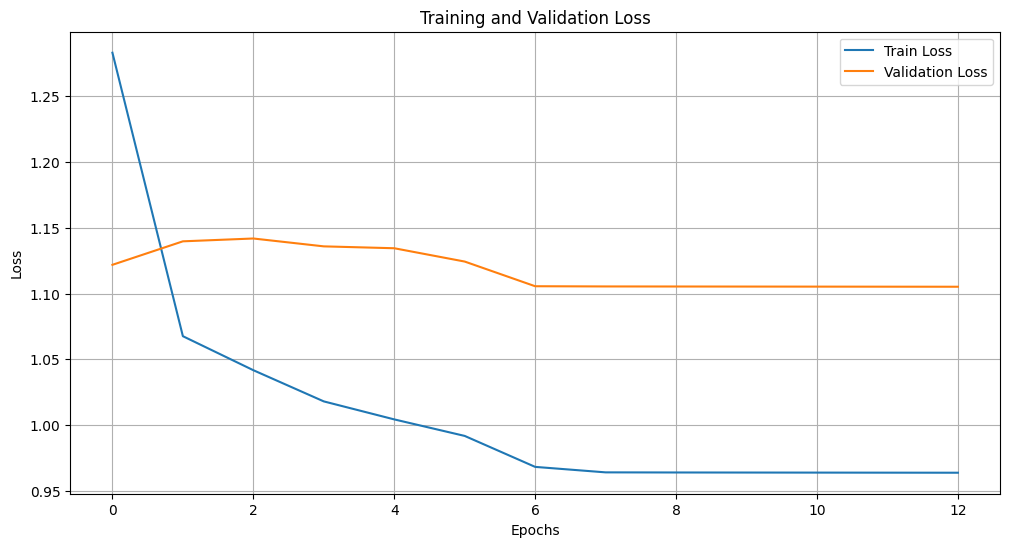

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4147 - mae: 0.8067
Epoch 1: val_loss improved from inf to 1.14446, saving model to best_model_weights.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1.4092 - mae: 0.8051 - val_loss: 1.1445 - val_mae: 0.7458 - learning_rate: 0.0010
Epoch 2/100
29/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3851 - mae: 0.8929 
Epoch 2: val_loss did not improve from 1.14446
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2903 - mae: 0.8624 - val_loss: 1.1464 - val_mae: 0.7032 - learning_rate: 0.0010
Epoch 3/100
28/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3633 - mae: 0.8389 
Epoch 3: val_loss did not improve from 1.14446
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2650 - mae: 0.8234 - val_loss: 1.1674 - val_mae: 0.6935 - learning_rate: 0.0010
Epoch 4/100
23/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4145 - mae: 0.8198 
Epoch 4: val_loss did not improve from 1.14446
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2812 - mae

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                     │ (None, 50)                  │         141,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 150)                 │          15,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 40)                  │           6,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 336,564 (1.28 MB)

 Trainable params: 168,281 (657.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 168,283 (657.36 KB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

Training completed for dataset: TfIdf-Basic-Accident
Mean Squared Error: 1.1412
Root Mean Squared Error: 1.0683
R-squared: -0.0329
Test Accuracy: 75.95%


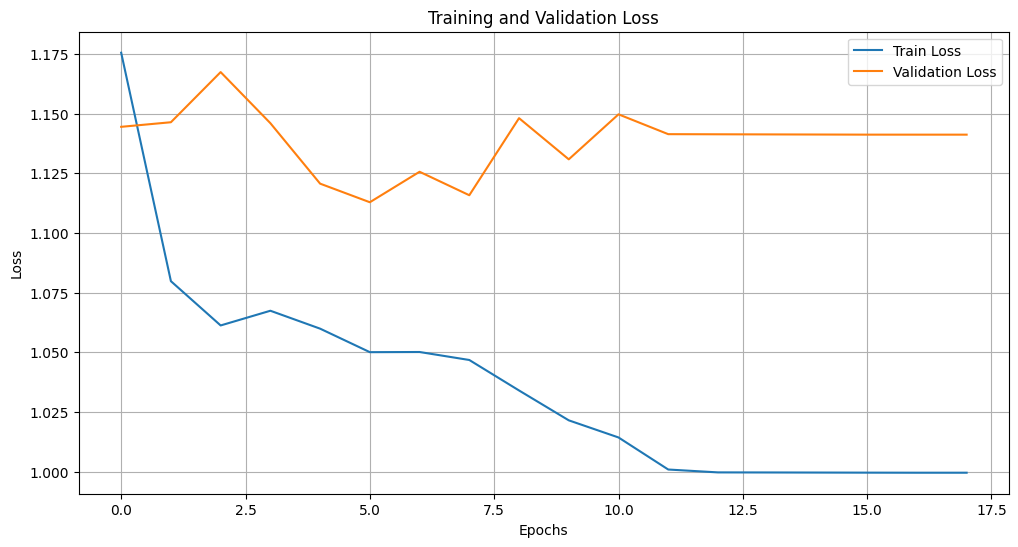

Epoch 1/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5188 - mae: 1.2819
Epoch 1: val_loss improved from inf to 1.27524, saving model to best_model_weights.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.5150 - mae: 1.2809 - val_loss: 1.2752 - val_mae: 0.9918 - learning_rate: 0.0010
Epoch 2/100
149/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1879 - mae: 0.8937
Epoch 2: val_loss improved from 1.27524 to 1.26020, saving model to best_model_weights.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1858 - mae: 0.8918 - val_loss: 1.2602 - val_mae: 0.9332 - learning_rate: 0.0010
Epoch 3/100
149/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9276 - mae: 0.7685
Epoch 3: val_loss did not improve from 1.26020
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9268 - mae: 0.7674 - val_loss: 1.3288 - val_mae: 0.9226 - learning_rate: 0.0010
Epoch 4/100
153/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7350 - mae: 0.6654
Epoch 4: val_loss did not improve from 1.26020
155

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                     │ (None, 50)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 150)                 │          15,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 40)                  │           6,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,564 (209.24 KB)

 Trainable params: 26,781 (104.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,783 (104.62 KB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

Training completed for dataset: Word2Vec-PCA&Upsampled-Accident
Mean Squared Error: 2.3769
Root Mean Squared Error: 1.5417
R-squared: -1.1513
Test Accuracy: 121.12%


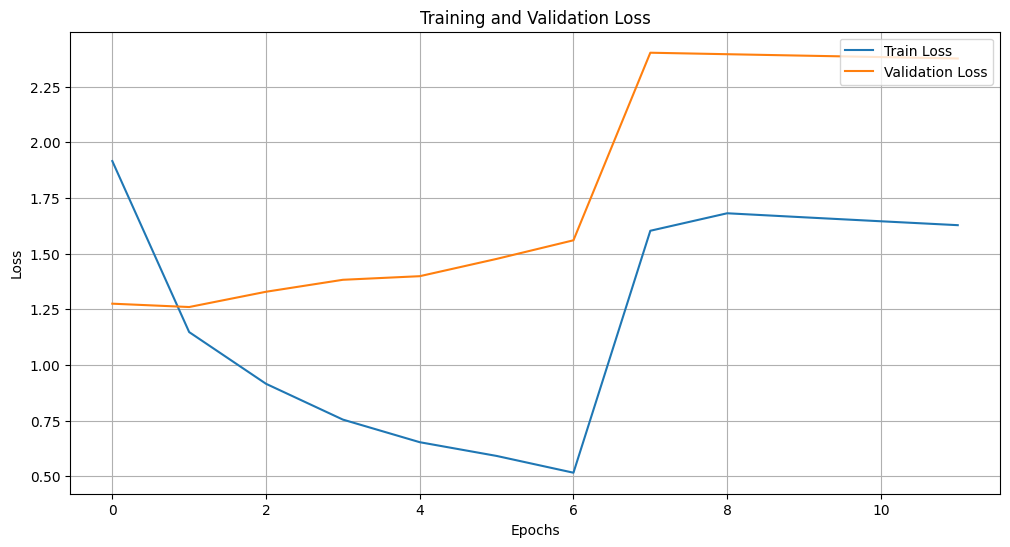

Epoch 1/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3838 - mae: 1.2472
Epoch 1: val_loss improved from inf to 1.72389, saving model to best_model_weights.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.3810 - mae: 1.2464 - val_loss: 1.7239 - val_mae: 1.1080 - learning_rate: 0.0010
Epoch 2/100
143/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4612 - mae: 0.9849
Epoch 2: val_loss did not improve from 1.72389
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4495 - mae: 0.9805 - val_loss: 2.1087 - val_mae: 1.2244 - learning_rate: 0.0010
Epoch 3/100
130/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0995 - mae: 0.8419
Epoch 3: val_loss did not improve from 1.72389
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0927 - mae: 0.8385 - val_loss: 2.1295 - val_mae: 1.2308 - learning_rate: 0.0010
Epoch 4/100
152/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8870 - mae: 0.7451
Epoch 4: val_loss did not improve from 1.72389
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_85 (Dense)                     │ (None, 50)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 150)                 │          15,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 40)                  │           6,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,564 (209.24 KB)

 Trainable params: 26,781 (104.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,783 (104.62 KB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

Training completed for dataset: Word2Vec-PCA&SMOTE-Accident
Mean Squared Error: 1.6505
Root Mean Squared Error: 1.2847
R-squared: -0.4939
Test Accuracy: 107.52%


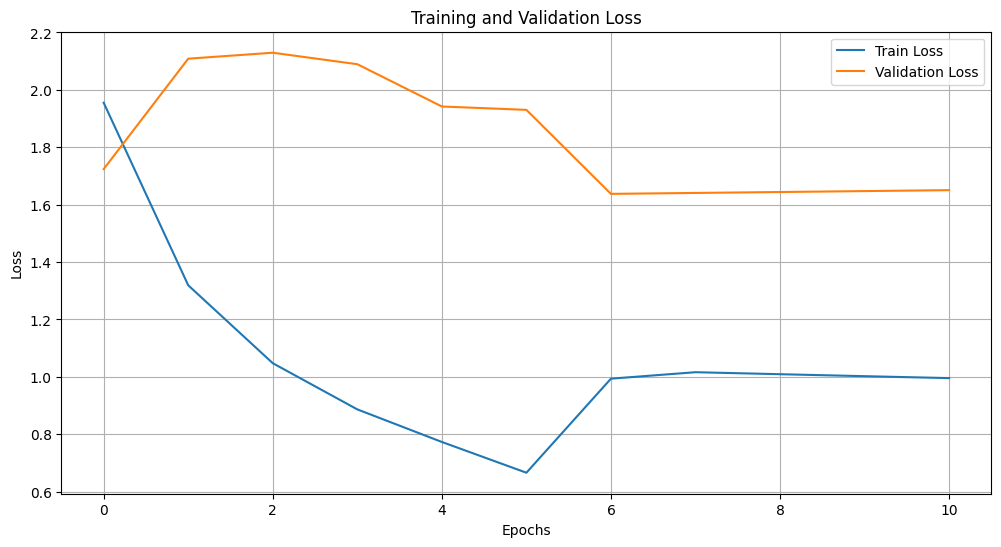

Epoch 1/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3454 - mae: 1.2395
Epoch 1: val_loss improved from inf to 1.49203, saving model to best_model_weights.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.3406 - mae: 1.2381 - val_loss: 1.4920 - val_mae: 1.0754 - learning_rate: 0.0010
Epoch 2/100
151/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8946 - mae: 0.7458
Epoch 2: val_loss did not improve from 1.49203
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8927 - mae: 0.7444 - val_loss: 1.5539 - val_mae: 1.0539 - learning_rate: 0.0010
Epoch 3/100
153/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6445 - mae: 0.6115
Epoch 3: val_loss did not improve from 1.49203
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6443 - mae: 0.6111 - val_loss: 1.5820 - val_mae: 1.0583 - learning_rate: 0.0010
Epoch 4/100
147/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5014 - mae: 0.5195
Epoch 4: val_loss improved from 1.49203 to 1.48974, saving model to best_model_weights.keras
155

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                     │ (None, 50)                  │           1,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 150)                 │          15,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 40)                  │           6,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,564 (217.05 KB)

 Trainable params: 27,781 (108.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,783 (108.53 KB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

Training completed for dataset: TFIDF-PCA&Upsampled-Accident
Mean Squared Error: 1.3885
Root Mean Squared Error: 1.1783
R-squared: -0.2567
Test Accuracy: 84.00%


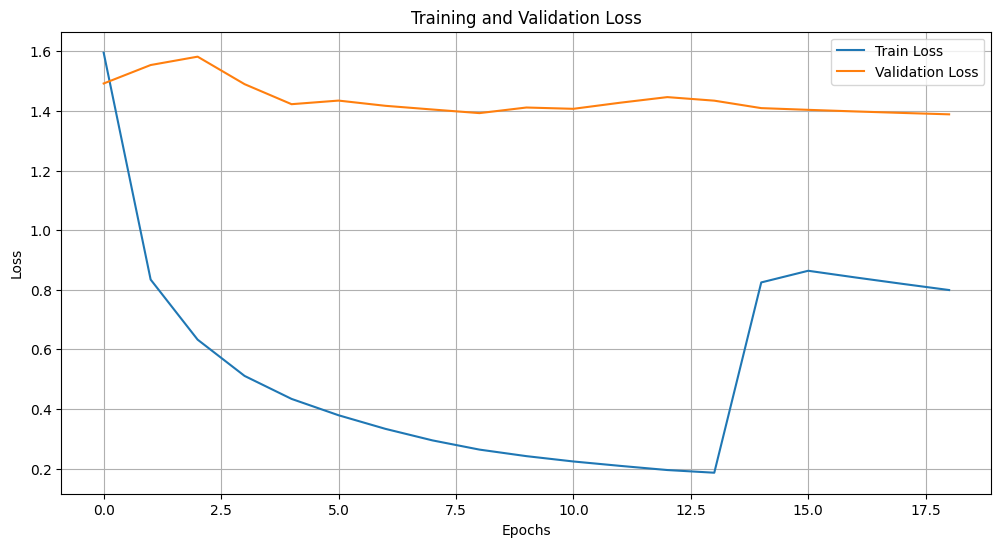

Epoch 1/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2872 - mae: 1.2367
Epoch 1: val_loss improved from inf to 1.89047, saving model to best_model_weights.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.2841 - mae: 1.2358 - val_loss: 1.8905 - val_mae: 1.1838 - learning_rate: 0.0010
Epoch 2/100
149/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0196 - mae: 0.8072
Epoch 2: val_loss improved from 1.89047 to 1.78834, saving model to best_model_weights.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0161 - mae: 0.8054 - val_loss: 1.7883 - val_mae: 1.1558 - learning_rate: 0.0010
Epoch 3/100
144/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6996 - mae: 0.6448
Epoch 3: val_loss improved from 1.78834 to 1.66364, saving model to best_model_weights.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6990 - mae: 0.6442 - val_loss: 1.6636 - val_mae: 1.0777 - learning_rate: 0.0010
Epoch 4/100
143/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5592 - mae: 0.5615
Epoc

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_95 (Dense)                     │ (None, 50)                  │           1,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 150)                 │          15,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 40)                  │           6,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,564 (217.05 KB)

 Trainable params: 27,781 (108.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,783 (108.53 KB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

Training completed for dataset: TFIDF-PCA&SMOTE-Accident
Mean Squared Error: 1.3290
Root Mean Squared Error: 1.1528
R-squared: -0.2028
Test Accuracy: 83.51%


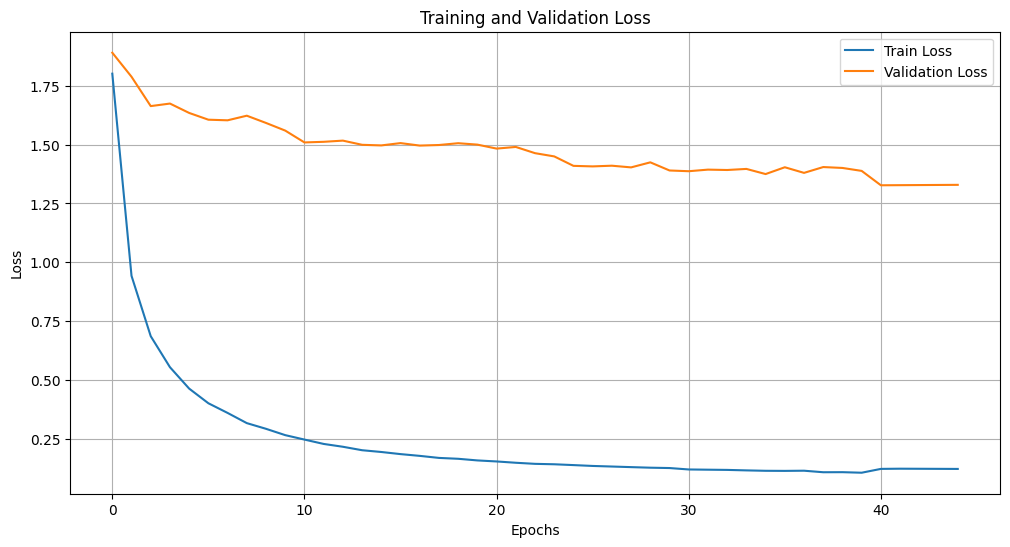

In [128]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt

def train_model(X_train, y_train, X_test, y_test, descriptionOfData, seed=7):
    # Set random seeds for reproducibility
    np.random.seed(seed)
    tf.random.set_seed(seed)

    # Define the model
    model = Sequential()
    model.add(Dense(50, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='linear'))

    # Compile the model
    opt = SGD(learning_rate=0.001, momentum=0.9)  # Updated to use learning_rate
    model.compile(loss='mse', optimizer=opt, metrics=['mae'])  # Changed to 'mae' (Mean Absolute Error) for regression

    # Define callbacks
    early_stopping = EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)
    checkpoint = ModelCheckpoint(
        'best_model_weights.keras',  # File path where the model weights will be saved
        monitor='val_loss',  # Metric to monitor
        save_best_only=True,  # Save only the model with the best performance
        mode='min',  # 'min' because we're monitoring validation loss
        verbose=1
    )

    # Fit the model
    training_history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=8,
        verbose=1,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, reduce_lr, checkpoint]
    )

    # Print the model summary
    print("Model Summary:")
    model.summary()

    # Evaluate the model
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    _, accuracy = model.evaluate(X_test, y_test, batch_size=8, verbose=0)

    print(f"\nTraining completed for dataset: {descriptionOfData}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print(f"Test Accuracy: {accuracy*100:.2f}%")

    # Plot loss learning curves
    epochs = range(len(training_history.history['loss']))  # Get number of epochs

    plt.figure(figsize=(12, 6))
    plt.plot(epochs, training_history.history['loss'], label='Train Loss')
    plt.plot(epochs, training_history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.grid(True)
    plt.show()

    return model, training_history

model_w2v, history_w2v = train_model(
    X_train=X_train_w2v, y_train=y_train_w2v,
    X_test=X_test_w2v, y_test=y_test_w2v,
    descriptionOfData="Word2Vec-Basic-Accident"
)

model_tfidf, history_tfidf = train_model(
    X_train=X_train_tfidf, y_train=y_train_tfidf,
    X_test=X_test_tfidf, y_test=y_test_tfidf,
    descriptionOfData="TfIdf-Basic-Accident"
)

model_w2v_up, history_w2v_up = train_model(
    X_train=X_train_w2v_up, y_train=y_train_w2v_up,
    X_test=X_test_w2v_pca, y_test=y_test_w2v,
    descriptionOfData="Word2Vec-PCA&Upsampled-Accident"
)

model_w2v_smote, history_w2v_smote = train_model(
    X_train=X_train_w2v_smote, y_train=y_train_w2v_smote,
    X_test=X_test_w2v_pca, y_test=y_test_w2v,
    descriptionOfData="Word2Vec-PCA&SMOTE-Accident"
)

model_tfidf_up, history_tfidf_up = train_model(
    X_train=X_train_tfidf_up, y_train=y_train_tfidf_up,
    X_test=X_test_tfidf_pca, y_test=y_test_tfidf,
    descriptionOfData="TFIDF-PCA&Upsampled-Accident"
)

model_tfidf_smote, history_tfidf_smote = train_model(
    X_train=X_train_tfidf_smote, y_train=y_train_tfidf_smote,
    X_test=X_test_tfidf_pca, y_test=y_test_tfidf,
    descriptionOfData="TFIDF-PCA&SMOTE-Accident"
)


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt

def train_model(X_train, y_train, X_test, y_test, descriptionOfData, seed=7):
    # Set random seeds for reproducibility
    np.random.seed(seed)
    tf.random.set_seed(seed)

    # Define the model
    model = Sequential()
    model.add(Dense(50, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='linear'))

    # Compile the model
    opt = SGD(learning_rate=0.001, momentum=0.9)  # Updated to use learning_rate
    model.compile(loss='mse', optimizer=opt, metrics=['mae'])  # Changed to 'mae' (Mean Absolute Error) for regression

    # Define callbacks
    early_stopping = EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)
    checkpoint = ModelCheckpoint(
        'best_model_weights.keras',  # File path where the model weights will be saved
        monitor='val_loss',  # Metric to monitor
        save_best_only=True,  # Save only the model with the best performance
        mode='min',  # 'min' because we're monitoring validation loss
        verbose=1
    )

    # Fit the model
    training_history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=8,
        verbose=1,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, reduce_lr, checkpoint]
    )

    # Print the model summary
    print("Model Summary:")
    model.summary()

    # Evaluate the model
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    _, accuracy = model.evaluate(X_test, y_test, batch_size=8, verbose=0)

    print(f"\nTraining completed for dataset: {descriptionOfData}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print(f"Train Accuracy: {train_accuracy*100:.2f}%")
    print(f"Test Accuracy: {accuracy*100:.2f}%")

    # Plot loss learning curves
    epochs = range(len(training_history.history['loss']))  # Get number of epochs

    plt.figure(figsize=(12, 6))
    plt.plot(epochs, training_history.history['loss'], label='Train Loss')
    plt.plot(epochs, training_history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.grid(True)
    plt.show()

    return model, training_history

model_w2v, history_w2v = train_model(
    X_train=X_train_w2v, y_train=y_train_w2v,
    X_test=X_test_w2v, y_test=y_test_w2v,
    descriptionOfData="Word2Vec-Basic-Accident"
)

model_tfidf, history_tfidf = train_model(
    X_train=X_train_tfidf, y_train=y_train_tfidf,
    X_test=X_test_tfidf, y_test=y_test_tfidf,
    descriptionOfData="TfIdf-Basic-Accident"
)

model_w2v_up, history_w2v_up = train_model(
    X_train=X_train_w2v_up, y_train=y_train_w2v_up,
    X_test=X_test_w2v_pca, y_test=y_test_w2v,
    descriptionOfData="Word2Vec-PCA&Upsampled-Accident"
)

model_w2v_smote, history_w2v_smote = train_model(
    X_train=X_train_w2v_smote, y_train=y_train_w2v_smote,
    X_test=X_test_w2v_pca, y_test=y_test_w2v,
    descriptionOfData="Word2Vec-PCA&SMOTE-Accident"
)

model_tfidf_up, history_tfidf_up = train_model(
    X_train=X_train_tfidf_up, y_train=y_train_tfidf_up,
    X_test=X_test_tfidf_pca, y_test=y_test_tfidf,
    descriptionOfData="TFIDF-PCA&Upsampled-Accident"
)

model_tfidf_smote, history_tfidf_smote = train_model(
    X_train=X_train_tfidf_smote, y_train=y_train_tfidf_smote,
    X_test=X_test_tfidf_pca, y_test=y_test_tfidf,
    descriptionOfData="TFIDF-PCA&SMOTE-Accident"
)


NameError: name 'X_train_w2v' is not defined

# Thankyou